<a href="https://colab.research.google.com/github/Sundaypaul/PROJECTS/blob/main/MLP_with_capped_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**CAPSTONE PROJECT TO BUILD A MODEL TO PREDICT HOUSES SALE PRICES**

THE AIM OF THE PROJECT IS TO BUILD A MODEL THAT WILL BE ABLE TO PREDICT THE PRICES OF HOUSES FROM GIVEN VARIABLES.

 Prepared by Dean De Cock, the dataset consist of both train set and test set sourced from Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)



**IMPORTING NECESSARY MODULES**

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


**MOUNTING DRIVE**

In [ ]:
#Dataset were downloaded and stored in Google Drive. Hence the need to mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**LOAD DATASET**

In [ ]:
#loading the dataset: train test and the test set
file_train = '/content/drive/MyDrive/Dataset/train set'
train_set = pd.read_csv(file_train)

file_test = '/content/drive/MyDrive/Dataset/test set'
test_set = pd.read_csv(file_test)

In [ ]:
#to check out the first three rows of the dataset so as to have a general overview of the dataset
print('train_set')
train_set.head(3)

print("")

print('test_set')
test_set.head(3)

train_set

test_set


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [ ]:
test_set.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [ ]:
train_set.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

**CHECKING OUT THE COLUMNS**

In [ ]:
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**CHECKING OUT FOR MISSING VALUES**

In [ ]:
#to know the number of missing values across each column on the train set
train_set.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#to know the number of missing values across each column on the train set
test_set.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
#checking out the columns with missing values on the train_set
null_columns = train_set.columns[train_set.isnull().any()]

# Display only the columns with null values
train_set_with_nulls = train_set[null_columns]

In [ ]:
train_set_with_nulls

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0   NaN    BrkFace       196.0       Gd       TA           No   
1            80.0   NaN        NaN         0.0       Gd       TA           Gd   
2            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3            60.0   NaN        NaN         0.0       TA       Gd           No   
4            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
...           ...   ...        ...         ...      ...      ...          ...   
1455         62.0   NaN        NaN         0.0       Gd       TA           No   
1456         85.0   NaN      Stone       119.0       Gd       TA           No   
1457         66.0   NaN        NaN         0.0       TA       Gd           No   
1458         68.0   NaN        NaN         0.0       TA       TA           Mn   
1459         75.0   NaN        NaN         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1             ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2             GLQ          Unf      SBrkr          TA     Attchd       2001.0   
3             ALQ          Unf      SBrkr          Gd     Detchd       1998.0   
4             GLQ          Unf      SBrkr          TA     Attchd       2000.0   
...           ...          ...        ...         ...        ...          ...   
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
0             RFn         TA         TA    NaN    NaN         NaN  
1             RFn         TA         TA    NaN    NaN         NaN  
2             RFn         TA         TA    NaN    NaN         NaN  
3             Unf         TA         TA    NaN    NaN         NaN  
4             RFn         TA         TA    NaN    NaN         NaN  
...           ...        ...        ...    ...    ...         ...  
1455          RFn         TA         TA    NaN    NaN         NaN  
1456          Unf         TA         TA    NaN  MnPrv         NaN  
1457          RFn         TA         TA    NaN  GdPrv        Shed  
1458          Unf         TA         TA    NaN    NaN         NaN  
1459          Fin         TA         TA    NaN    NaN         NaN  

[1460 rows x 19 columns]

In [ ]:
#checking out the columns with missing values on the test_set
null_columns2 = test_set.columns[test_set.isnull().any()]

# Display only the columns with null values
test_set_with_nulls = test_set[null_columns2]

In [ ]:
test_set_with_nulls

MSZoning  LotFrontage Alley Utilities Exterior1st Exterior2nd MasVnrType  \
0          RH         80.0   NaN    AllPub     VinylSd     VinylSd        NaN   
1          RL         81.0   NaN    AllPub     Wd Sdng     Wd Sdng    BrkFace   
2          RL         74.0   NaN    AllPub     VinylSd     VinylSd        NaN   
3          RL         78.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
4          RL         43.0   NaN    AllPub     HdBoard     HdBoard        NaN   
...       ...          ...   ...       ...         ...         ...        ...   
1454       RM         21.0   NaN    AllPub     CemntBd     CmentBd        NaN   
1455       RM         21.0   NaN    AllPub     CemntBd     CmentBd        NaN   
1456       RL        160.0   NaN    AllPub     VinylSd     VinylSd        NaN   
1457       RL         62.0   NaN    AllPub     HdBoard     Wd Shng        NaN   
1458       RL         74.0   NaN    AllPub     HdBoard     HdBoard    BrkFace   

      MasVnrArea BsmtQual BsmtCond  ... GarageYrBlt GarageFinish  GarageCars  \
0            0.0       TA       TA  ...      1961.0          Unf         1.0   
1          108.0       TA       TA  ...      1958.0          Unf         1.0   
2            0.0       Gd       TA  ...      1997.0          Fin         2.0   
3           20.0       TA       TA  ...      1998.0          Fin         2.0   
4            0.0       Gd       TA  ...      1992.0          RFn         2.0   
...          ...      ...      ...  ...         ...          ...         ...   
1454         0.0       TA       TA  ...         NaN          NaN         0.0   
1455         0.0       TA       TA  ...      1970.0          Unf         1.0   
1456         0.0       TA       TA  ...      1960.0          Unf         2.0   
1457         0.0       Gd       TA  ...         NaN          NaN         0.0   
1458        94.0       Gd       TA  ...      1993.0          Fin         3.0   

     GarageArea  GarageQual  GarageCond  PoolQC  Fence  MiscFeature SaleType  
0         730.0          TA          TA     NaN  MnPrv          NaN       WD  
1         312.0          TA          TA     NaN    NaN         Gar2       WD  
2         482.0          TA          TA     NaN  MnPrv          NaN       WD  
3         470.0          TA          TA     NaN    NaN          NaN       WD  
4         506.0          TA          TA     NaN    NaN          NaN       WD  
...         ...         ...         ...     ...    ...          ...      ...  
1454        0.0         NaN         NaN     NaN    NaN          NaN       WD  
1455      286.0          TA          TA     NaN    NaN          NaN       WD  
1456      576.0          TA          TA     NaN    NaN          NaN       WD  
1457        0.0         NaN         NaN     NaN  MnPrv         Shed       WD  
1458      650.0          TA          TA     NaN    NaN          NaN       WD  

[1459 rows x 33 columns]

In [ ]:
train_set_with_nulls.isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
test_set_with_nulls.isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
train_set_with_nulls.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [ ]:
test_set_with_nulls.dtypes

MSZoning         object
LotFrontage     float64
Alley            object
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
dtype: object

# **HANDLING THE MISSING VALUES**

#Having seen the the columns and the missing values, i handled them one after another

In [ ]:
train_set['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [ ]:
test_set['Electrical'].describe()

count      1459
unique        4
top       SBrkr
freq       1337
Name: Electrical, dtype: object

Here is the description of the column;
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

fill the missing value with the modal value, SBrkr

In [ ]:
train_set['Electrical'].fillna('SBrKr', inplace=True)
test_set['Electrical'].fillna('SBrKr', inplace=True)

In [ ]:
test_set['Electrical'].value_counts()

Electrical
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: count, dtype: int64

#checking out the possiible stat value to use for filling the missing value on column LotFrontage

In [ ]:
train_set['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
test_set['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

WILL FILL THIS UP WITH THE MEDIAN

In [ ]:
train_set['LotFrontage'].fillna(69, inplace = True)
test_set['LotFrontage'].fillna(67, inplace = True)

##checking out the possiible stat value to use for filling the missing value on column Alley

In [ ]:
train_set['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [ ]:
test_set['Alley'].describe()

count      107
unique       2
top       Grvl
freq        70
Name: Alley, dtype: object

#Alley: Type of alley access to property

       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access

      Hence, the np.nan will be replaced with NAA to mean No alley access

In [ ]:
train_set['Alley'].replace(np.NaN, 'NAA', inplace=True)
test_set['Alley'].replace(np.NaN, 'NAA', inplace=True)


In [ ]:
##checking out the possiible stat value to use for filling the missing value on column Alley

In [ ]:
train_set['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [ ]:
train_set['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [ ]:
test_set['Fence'].describe()

count       290
unique        4
top       MnPrv
freq        172
Name: Fence, dtype: object

In [ ]:
test_set['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [ ]:
train_set['Fence'].replace(np.NaN, 'NF', inplace=True)
test_set['Fence'].replace(np.NaN, 'NF', inplace=True)


In [ ]:
test_set['Fence'].value_counts()

Fence
NF       1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: count, dtype: int64

In [ ]:
train_set['Fence'].value_counts()

Fence
NF       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [ ]:
train_set['MasVnrType'].describe()

count         588
unique          3
top       BrkFace
freq          445
Name: MasVnrType, dtype: object

In [ ]:
test_set['MasVnrType'].describe()

count         565
unique          3
top       BrkFace
freq          434
Name: MasVnrType, dtype: object

In [ ]:
test_set['MasVnrType'].value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [ ]:
train_set['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [ ]:
train_set['MasVnrType'].replace(np.NaN, 'None', inplace=True)
test_set['MasVnrType'].replace(np.NaN, 'None', inplace=True)


In [ ]:
train_set['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

MasVnrArea

In [ ]:
train_set['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
test_set['MasVnrArea'].describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [ ]:
#fill with the modal variable
train_set['MasVnrArea'].fillna(166, inplace = True)
test_set['MasVnrArea'].fillna(164, inplace = True)

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [ ]:
train_set['BsmtQual'].describe()


count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [ ]:

test_set['BsmtQual'].describe()


count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [ ]:
train_set['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [ ]:
test_set['BsmtQual'].value_counts()

BsmtQual
TA    634
Gd    591
Ex    137
Fa     53
Name: count, dtype: int64

In [ ]:
#replace the missing values with NB(No basement)
train_set['BsmtQual'].replace(np.NaN, 'NB', inplace=True)
test_set['BsmtQual'].replace(np.NaN, 'NB', inplace=True)

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [ ]:
print('BsmtCond_train_set')
print(train_set['BsmtCond'].describe())

print('\n')

print('BsmtCond_test_set')
print(test_set['BsmtCond'].describe())


BsmtCond_train_set
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object


BsmtCond_test_set
count     1414
unique       4
top         TA
freq      1295
Name: BsmtCond, dtype: object


In [ ]:
train_set['BsmtCond'].replace(np.NaN, 'NoBasem', inplace=True)
test_set['BsmtCond'].replace(np.NaN, 'NoBasem', inplace=True)


BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


In [ ]:
print('BsmtExposure_train_set')
print(train_set['BsmtExposure'].describe())

print('\n')

print('BsmtExposure_test_set')
print(test_set['BsmtExposure'].describe())


BsmtExposure_train_set
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object


BsmtExposure_test_set
count     1415
unique       4
top         No
freq       951
Name: BsmtExposure, dtype: object


In [ ]:
#NoBEx means no basement exposure
train_set['BsmtExposure'].replace(np.NaN, 'NoBEx', inplace=True)
test_set['BsmtExposure'].replace(np.NaN, 'NoBEx', inplace=True)


BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
print('BsmtFinType1_train_set')
print(train_set['BsmtFinType1'].describe())

print('\n')

print('BsmtFinType1_test_set')
print(test_set['BsmtFinType1'].describe())


BsmtFinType1_train_set
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


BsmtFinType1_test_set
count     1417
unique       6
top        GLQ
freq       431
Name: BsmtFinType1, dtype: object


In [ ]:
#NoBasem means no basement exposure
train_set['BsmtFinType1'].replace(np.NaN, 'NoBasem', inplace=True)
test_set['BsmtFinType1'].replace(np.NaN, 'NoBasem', inplace=True)


BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
#NoBasem means no basement exposure
train_set['BsmtFinType2'].replace(np.NaN, 'NoBasem', inplace=True)
test_set['BsmtFinType2'].replace(np.NaN, 'NoBasem', inplace=True)



BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

BsmtFinSF1, BsmtFinSF2, TotalBsmtSF are all float with 1 missing variable, i will be filling them with them modal value

In [ ]:
columns_to_fill = ['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']

for column in columns_to_fill:
    test_set[column].fillna(test_set[column].mode()[0], inplace=True)


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

       GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage



From this description, missing data on garage related column would be filled with NoGarage and None for Fireplcqul, PoolQc and miscfeatures

In [ ]:
columns_to_replace = ['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']

for column in columns_to_replace:
    test_set[column].replace(np.nan, None, inplace=True)


In [ ]:
print('BsmtExposure_train_set')
print(train_set['BsmtExposure'].describe())

print('\n')

print('BsmtExposure_test_set')
print(test_set['BsmtExposure'].describe())


BsmtExposure_train_set
count     1460
unique       5
top         No
freq       953
Name: BsmtExposure, dtype: object


BsmtExposure_test_set
count     1459
unique       5
top         No
freq       951
Name: BsmtExposure, dtype: object


In [ ]:
#NoBEx means no basement exposure
train_set['BsmtExposure'].replace(np.NaN, 'NoBEx', inplace=True)
test_set['BsmtExposure'].replace(np.NaN, 'NoBEx', inplace=True)


In [ ]:
columns_replace = ['FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish',
'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature']
for column in columns_replace:
                   test_set[column].replace(np.nan, 'None', inplace = True)

In [ ]:
columns_replace = ['FireplaceQu', 'GarageType','GarageFinish',
'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature']
for column in columns_replace:
                   train_set[column].replace(np.nan, 'None', inplace = True)

In [ ]:
columns_replace = ['GarageYrBlt']
for column in columns_replace:
                   train_set[column].replace(np.nan, 0.0, inplace = True)





MSZoning	4


Utilities	2
Exterior1st	1
Exterior2nd	1
BsmtFullBath	2
BsmtHalfBath	2
KitchenQual	1
Functional	2

SaleType	1

For these columns, seeing they are two and one missing value in the columns, I will be filling it up with the modal vairables

In [ ]:
columns_replace = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']
for column in columns_replace:
    test_set[column].fillna(test_set[column].mode()[0], inplace=True)

In [ ]:
columns_replace = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']
for column in columns_replace:
    train_set[column].fillna(test_set[column].mode()[0], inplace=True)

**CHECKING OUT AGAIN THE COLUMNS WITH NULLS TO CONFIRM IF THE MISSING VALUES HAVE BEEN APPROPRIATELY HANDLED**

In [ ]:
train_set.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
test_set.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [ ]:
print('train_set_describe')
print(train_set.describe())

print('\n')

print('test_set_describe')
print(test_set.describe())

train_set_describe
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   104.026712   443.639726  ...   
std       1.112799    30.202904     20.645407   180.6277

In [ ]:

print('train_set')
print(train_set.info())

print('\n')

print('test_set')
print(test_set.info())

train_set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18

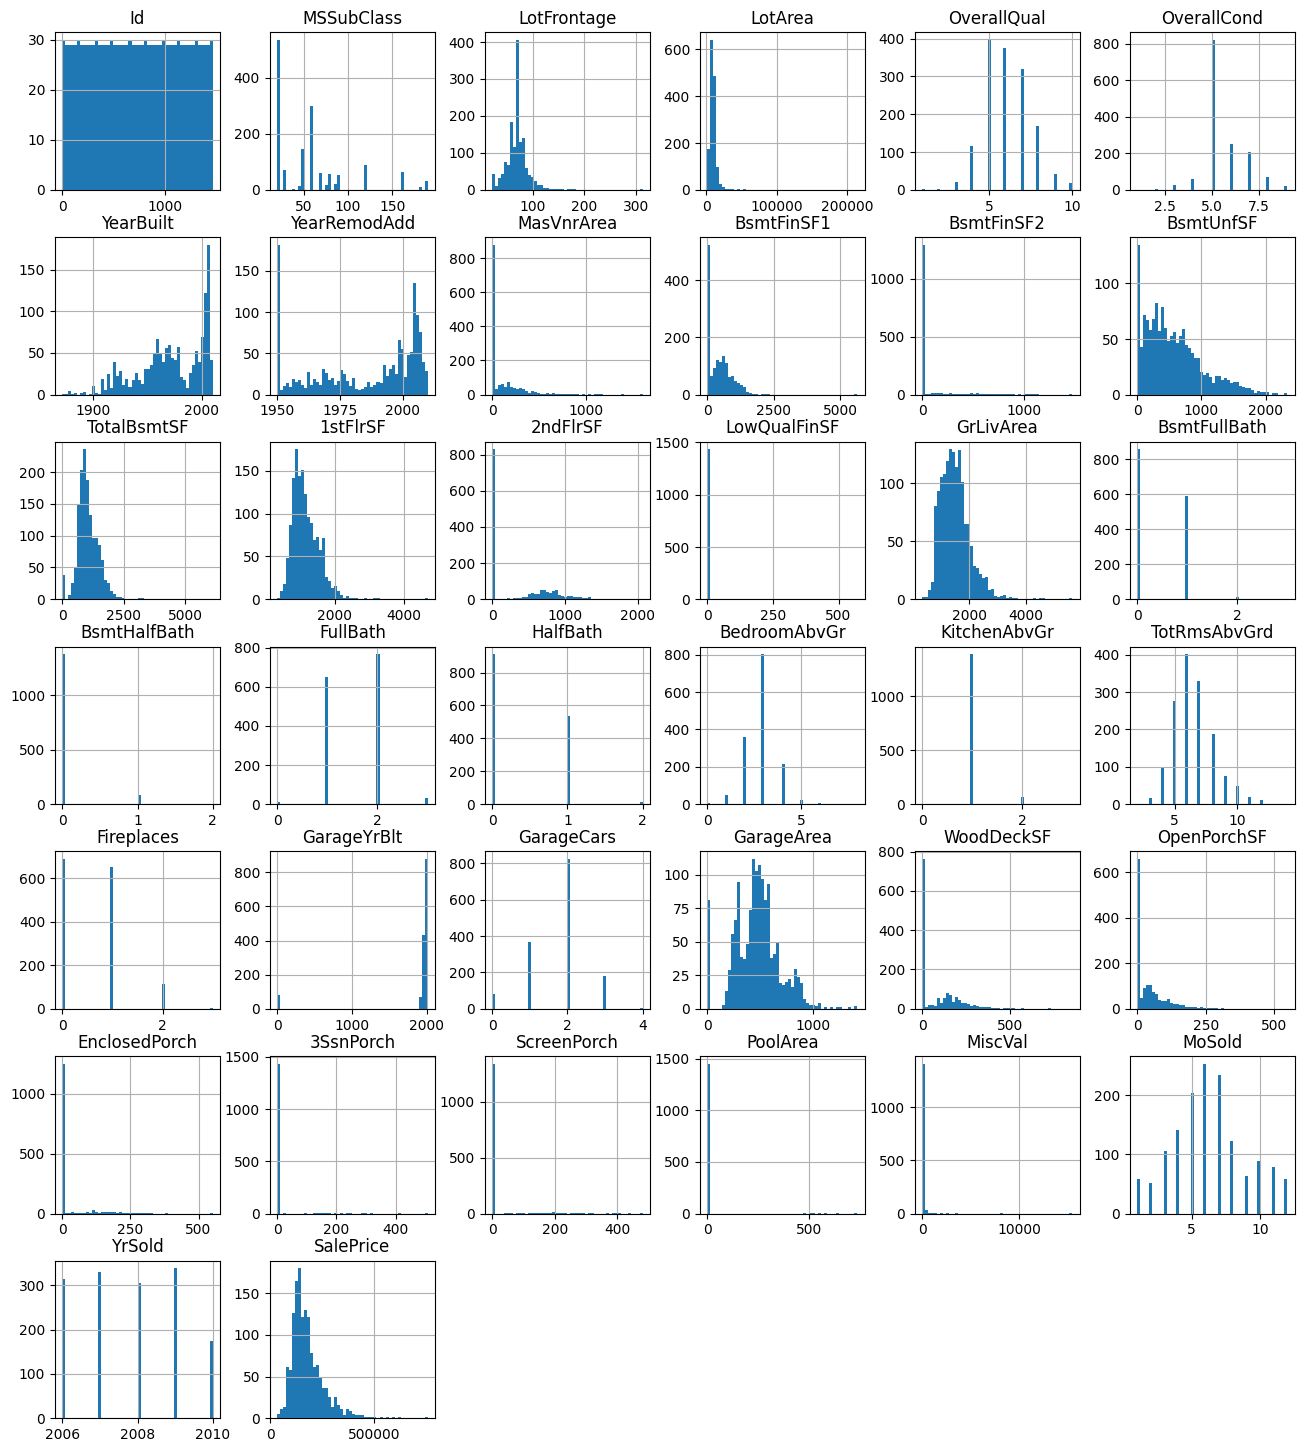

In [ ]:
#Visualization of the numeric category in the train set
train_set.hist(bins=50, figsize=(16,18))
plt.show()

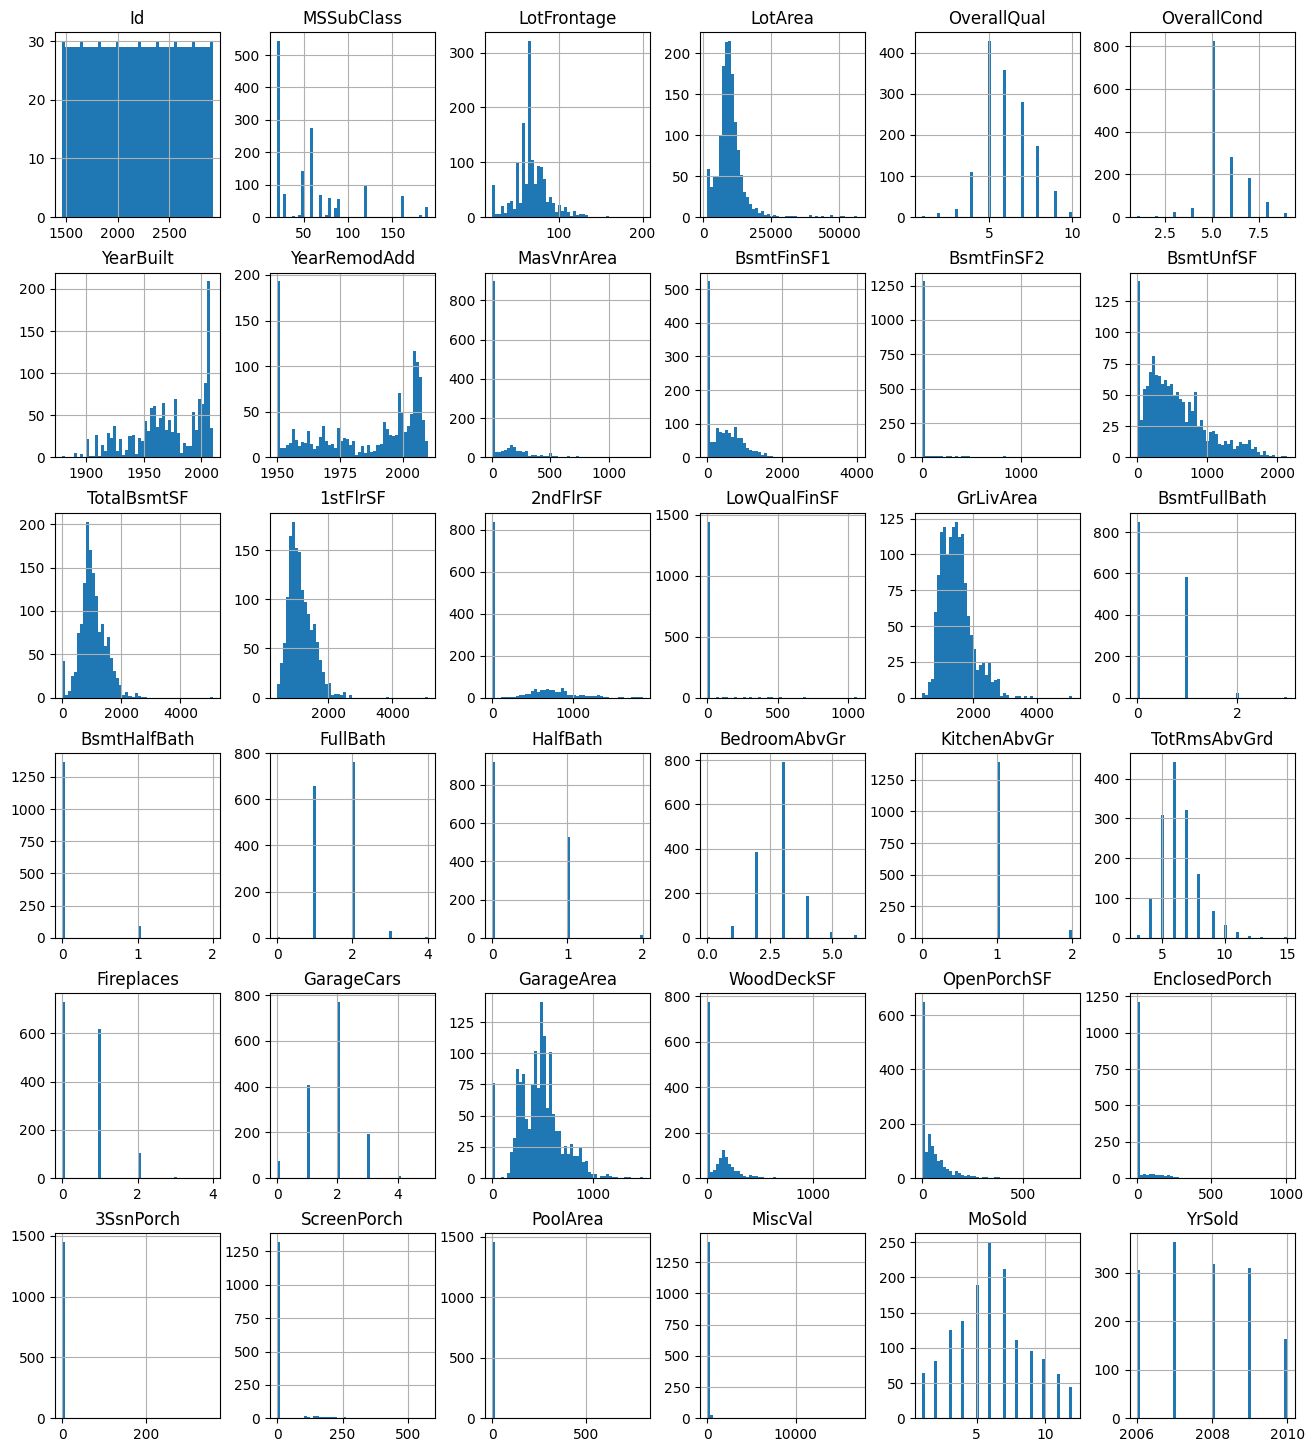

In [ ]:
#General visualization of the numeric series on test set
test_set.hist(bins=50, figsize=(16,18))
plt.show()

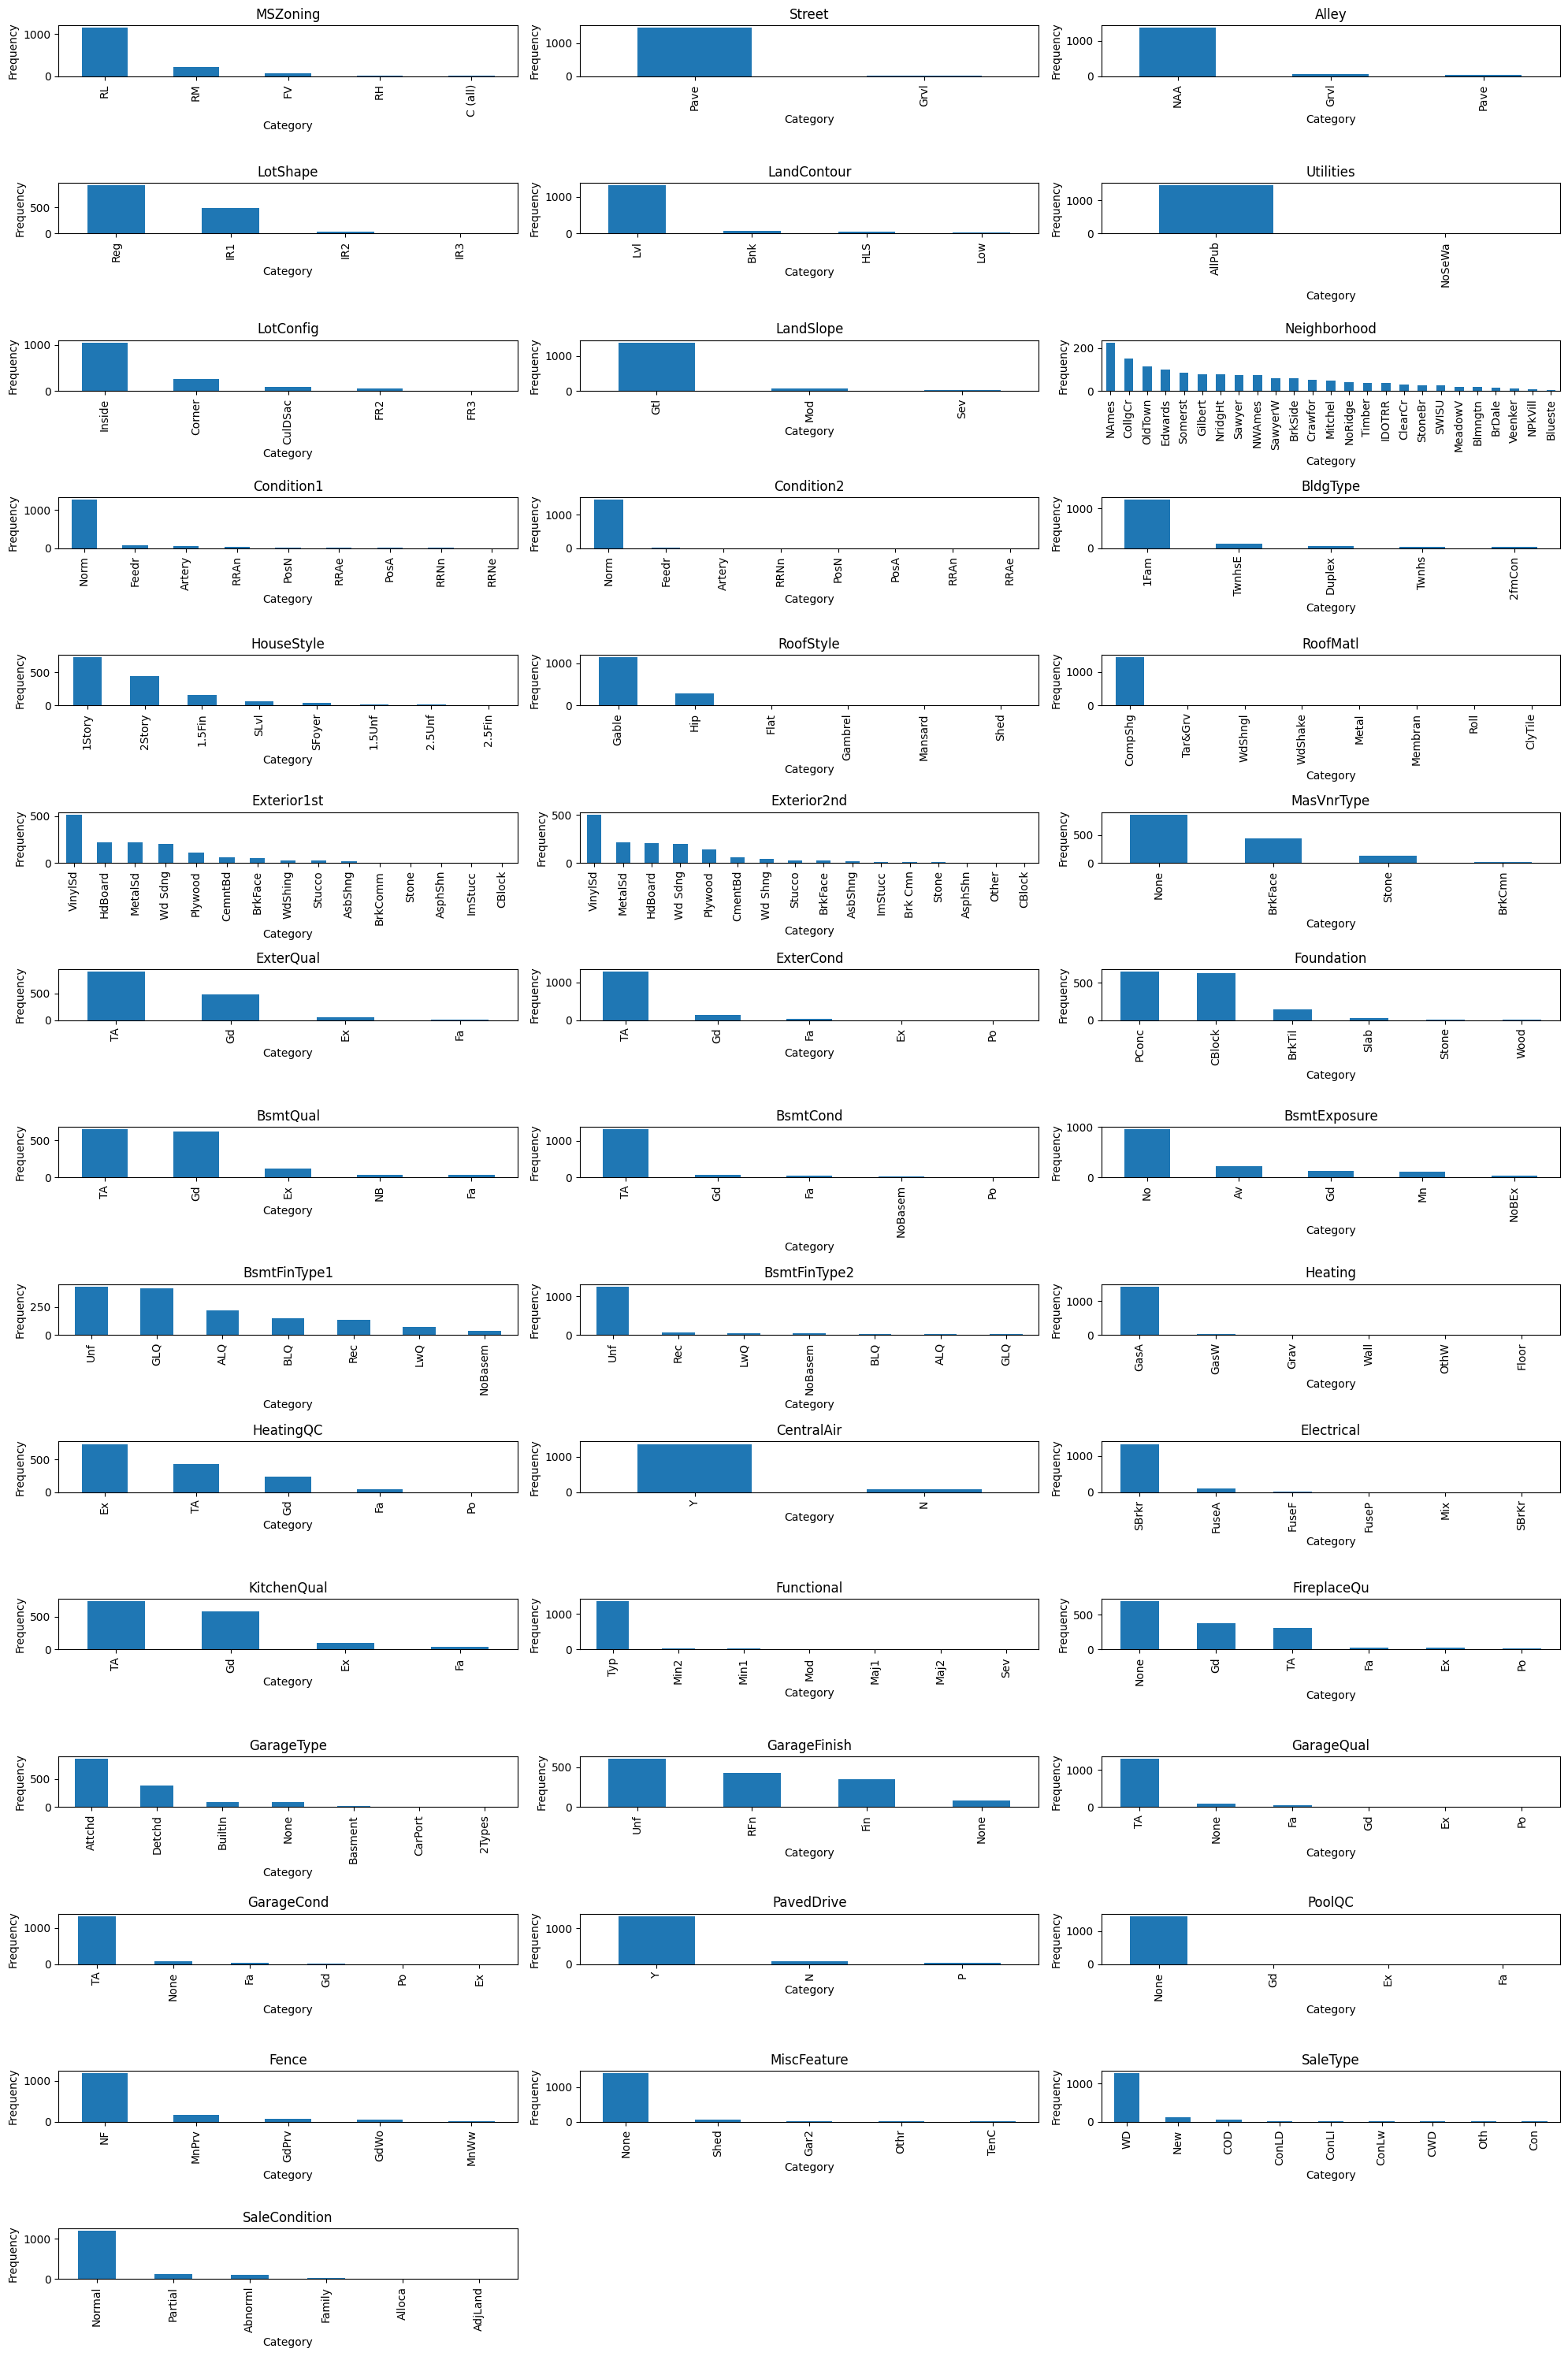

In [ ]:
#Visualize the object series in the train set
categorical_columns = train_set.select_dtypes(include=['object']).columns

# Set up the plotting area
plt.figure(figsize=(20, 30))

# Loop through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)  # 3 columns per row
    train_set[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Category')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

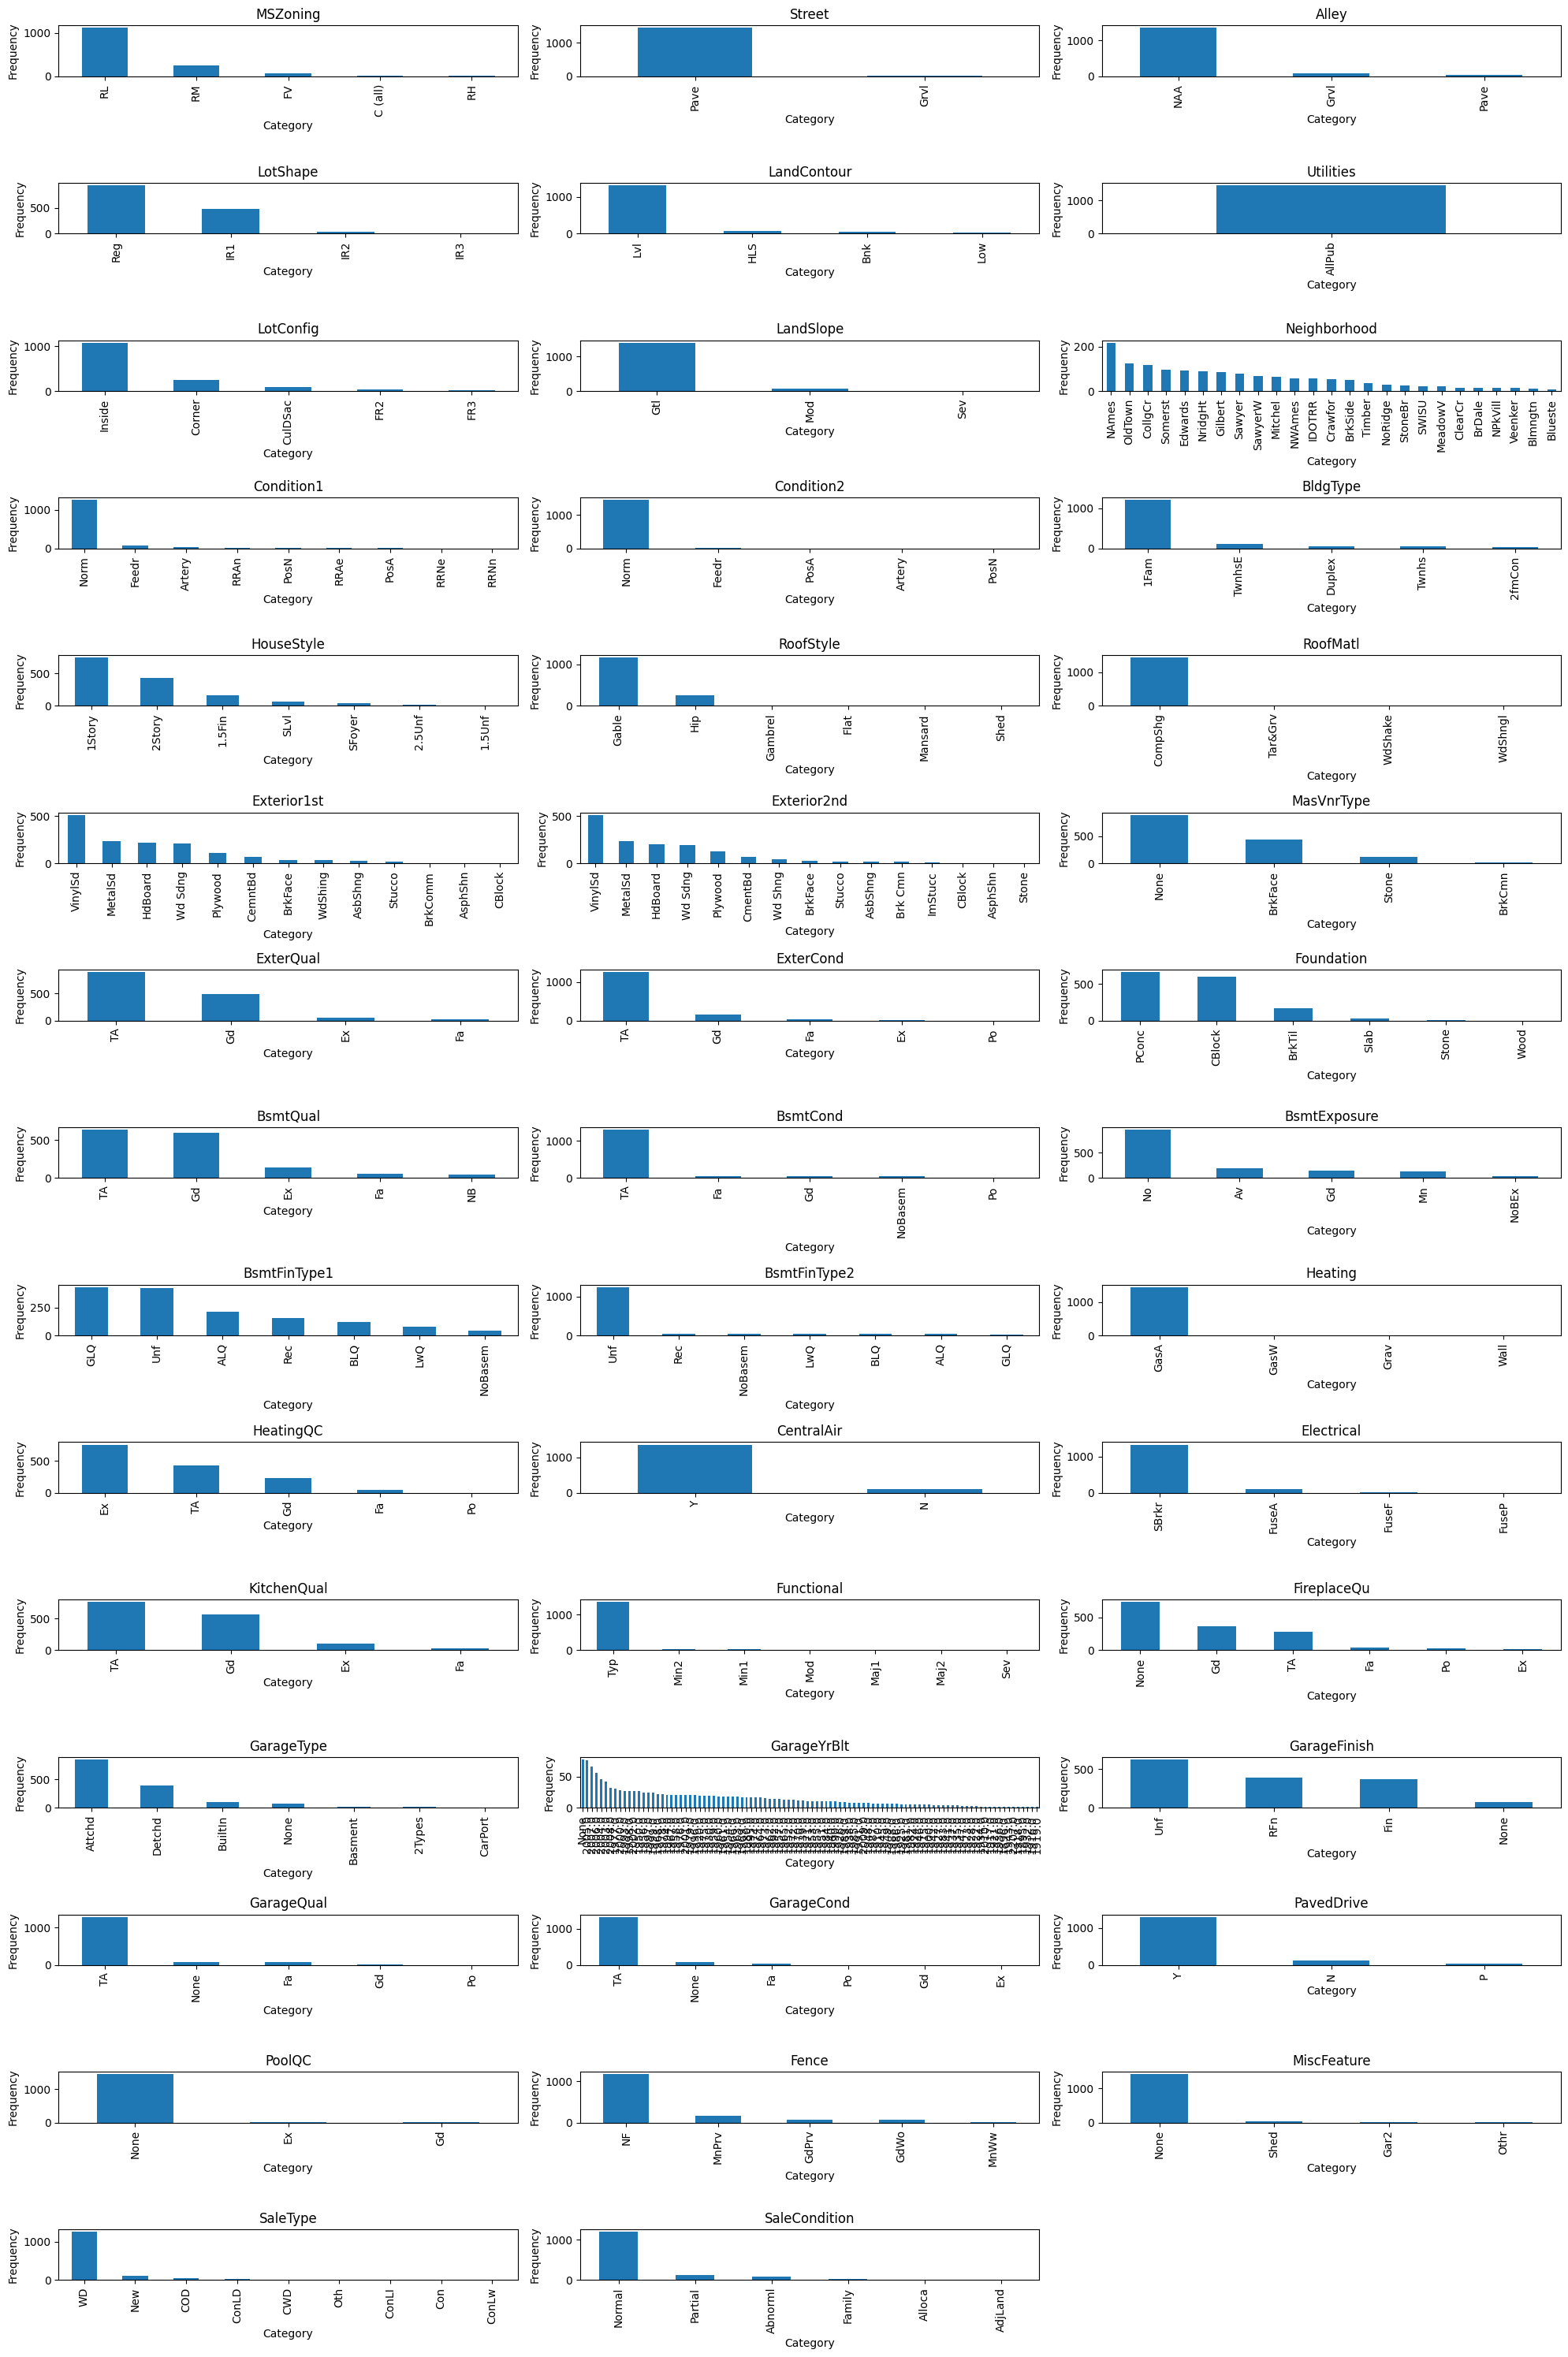

In [ ]:
#Visualize the object series in the test set and Loop through each categorical column and create a bar plot
categorical_columns = test_set.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 30))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    test_set[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Category')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

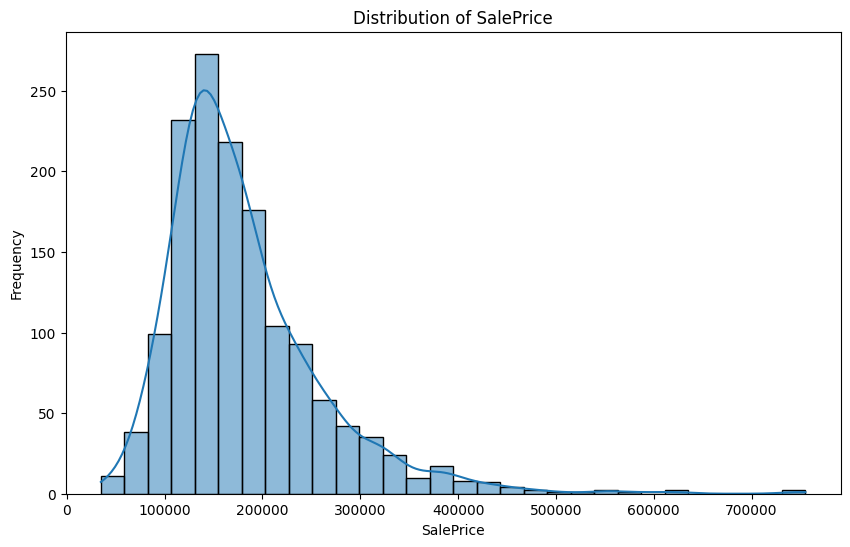

In [ ]:
# Vivid visualization of SalePrice being the target column
plt.figure(figsize=(10, 6))
sns.histplot(train_set['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

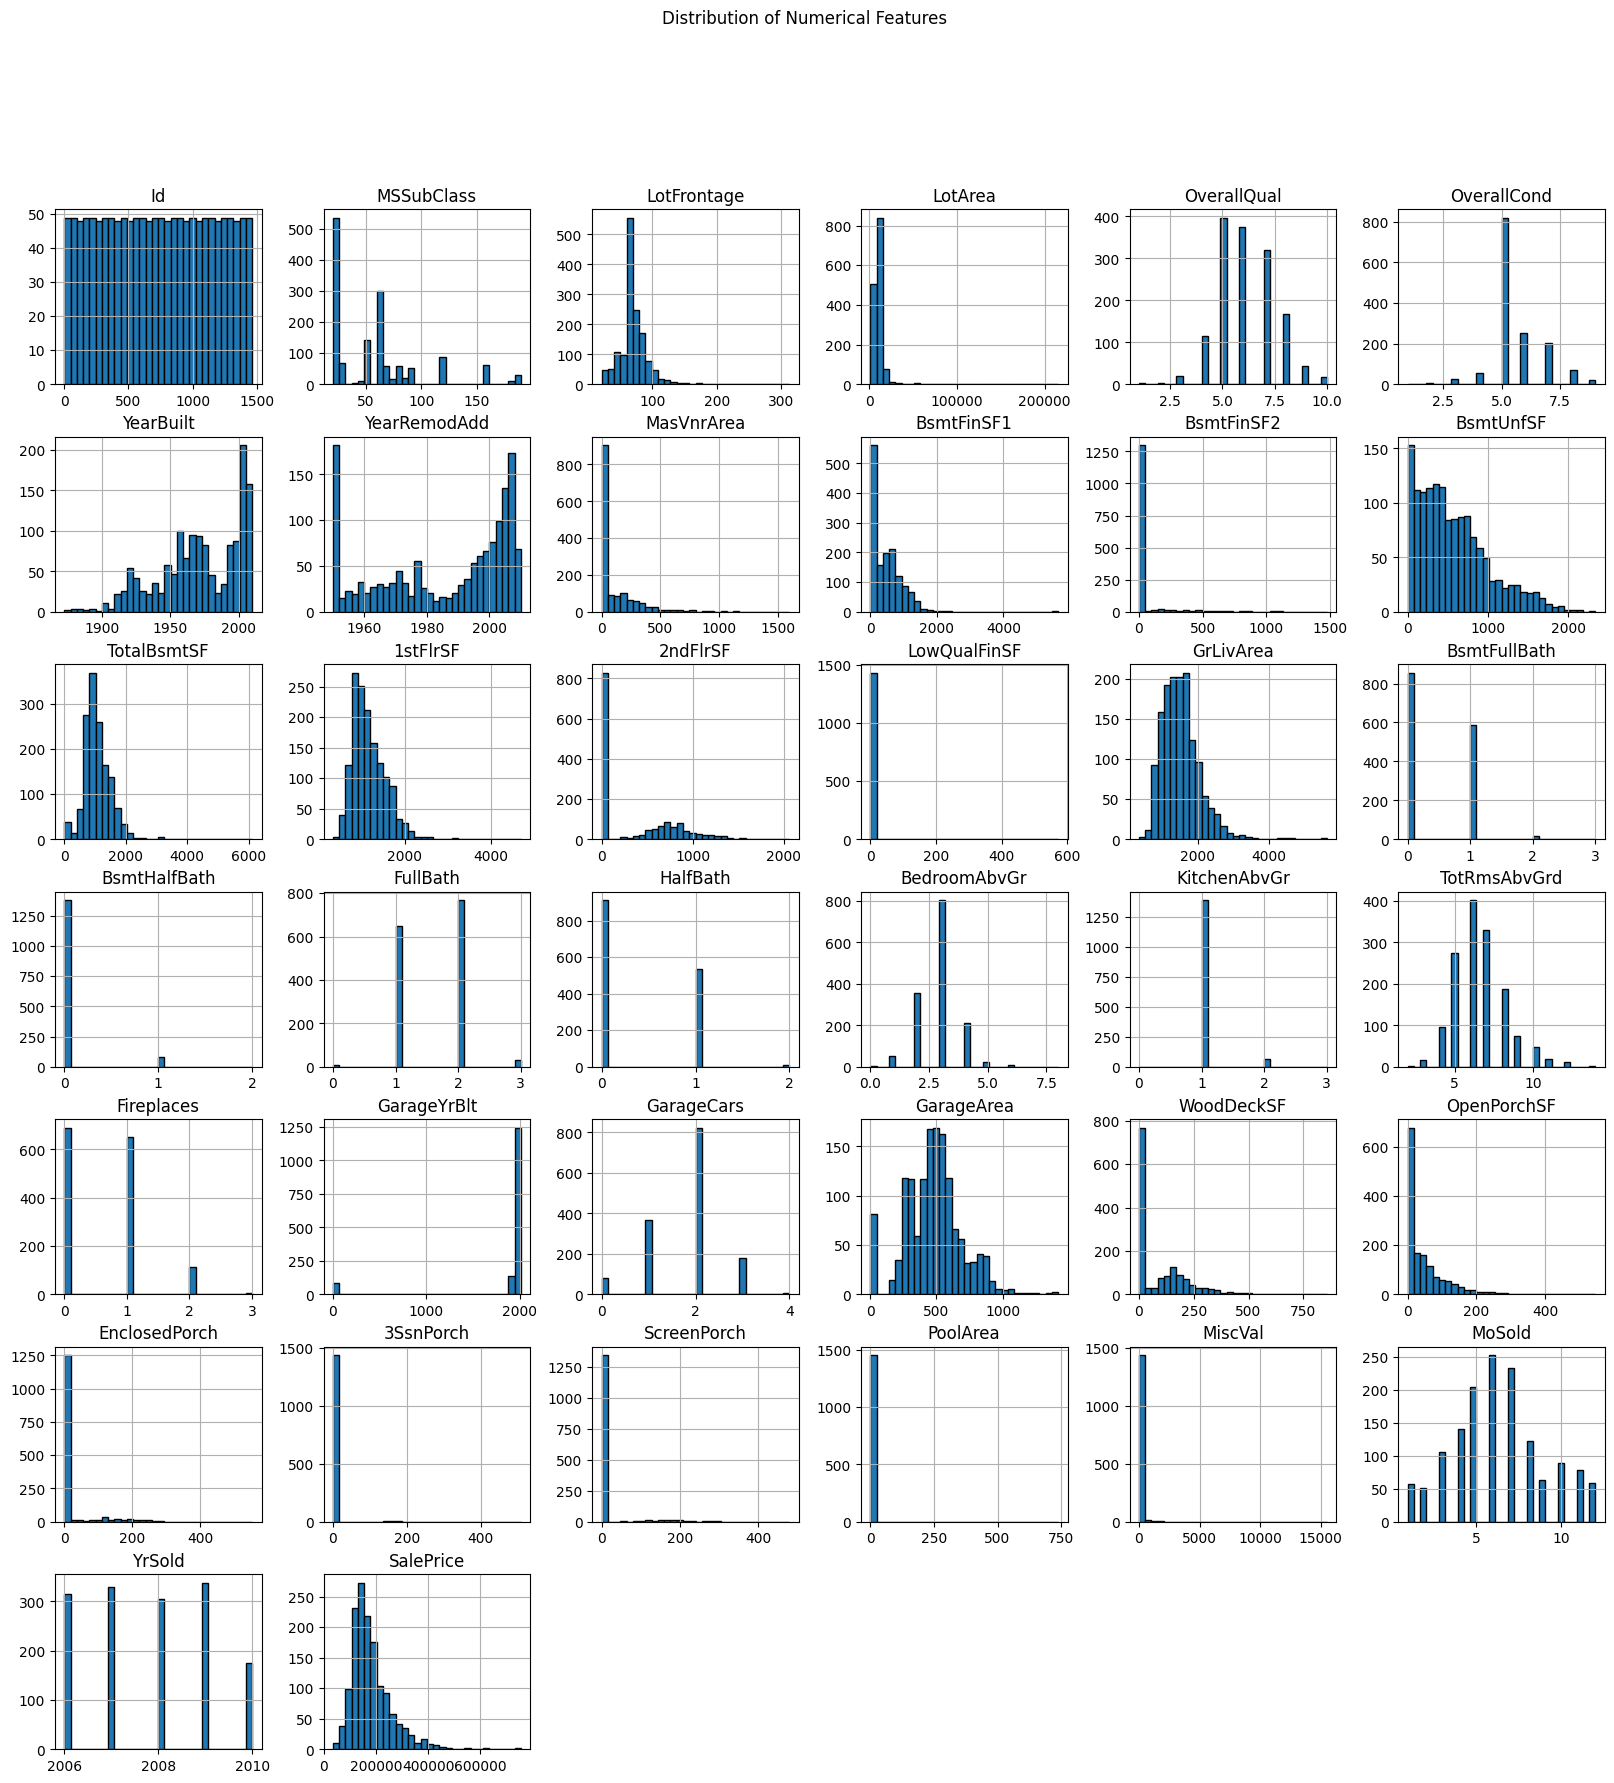

In [ ]:
# Histograms for numerical features
train_set.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

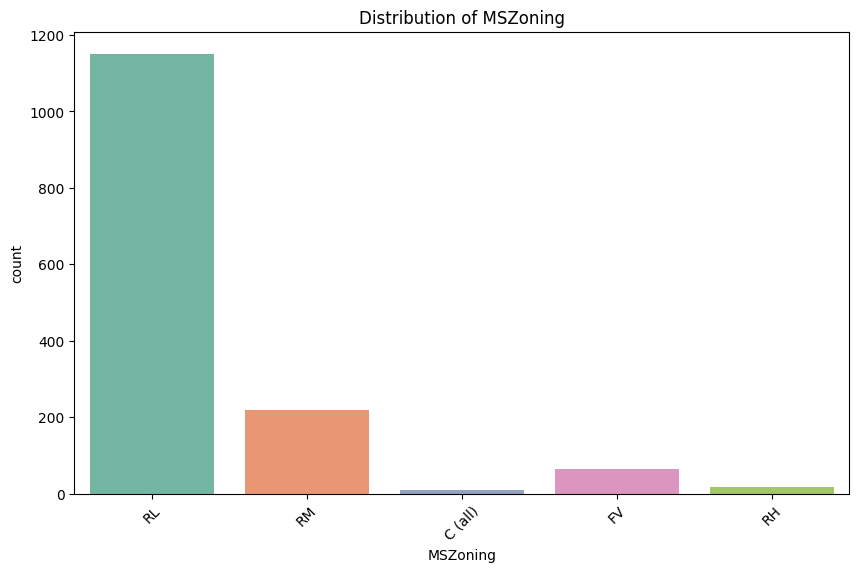

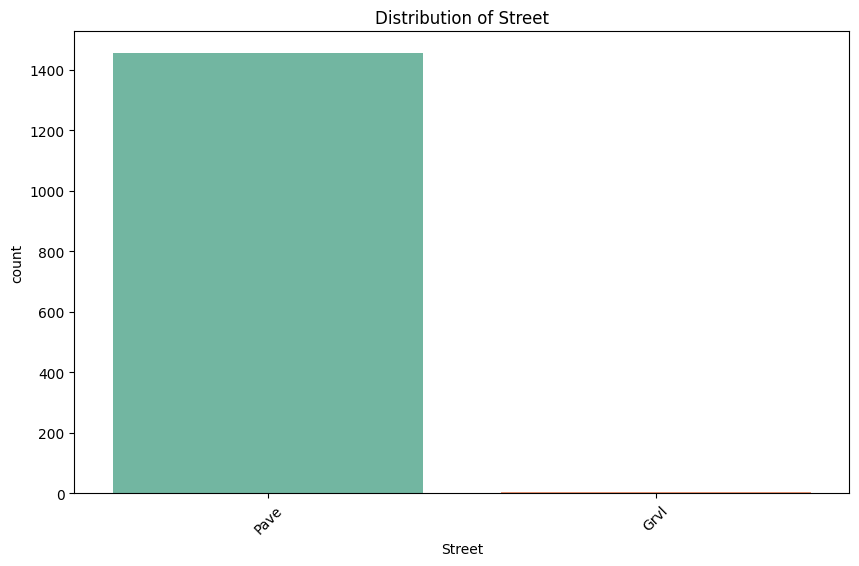

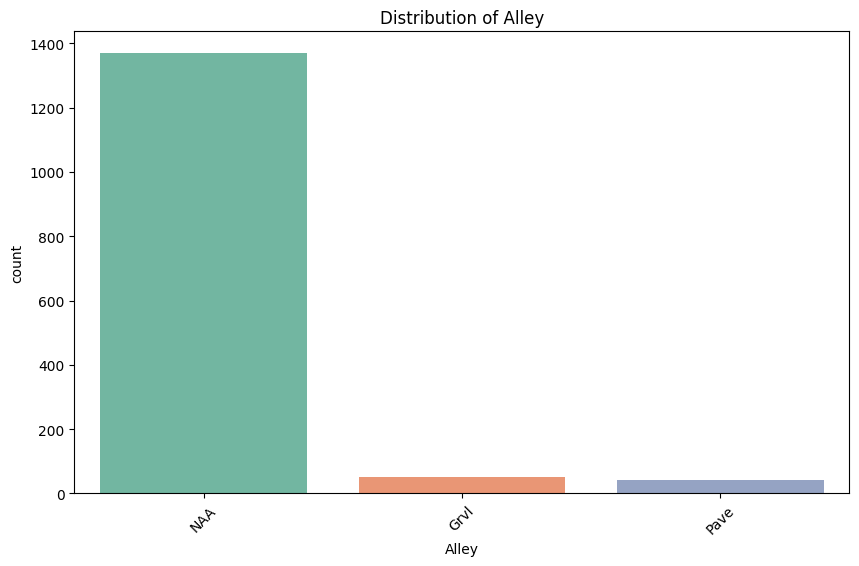

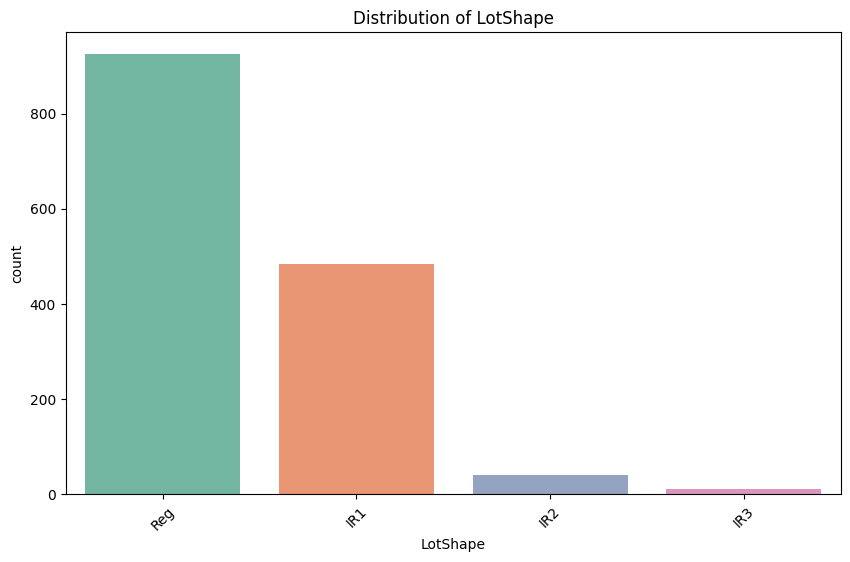

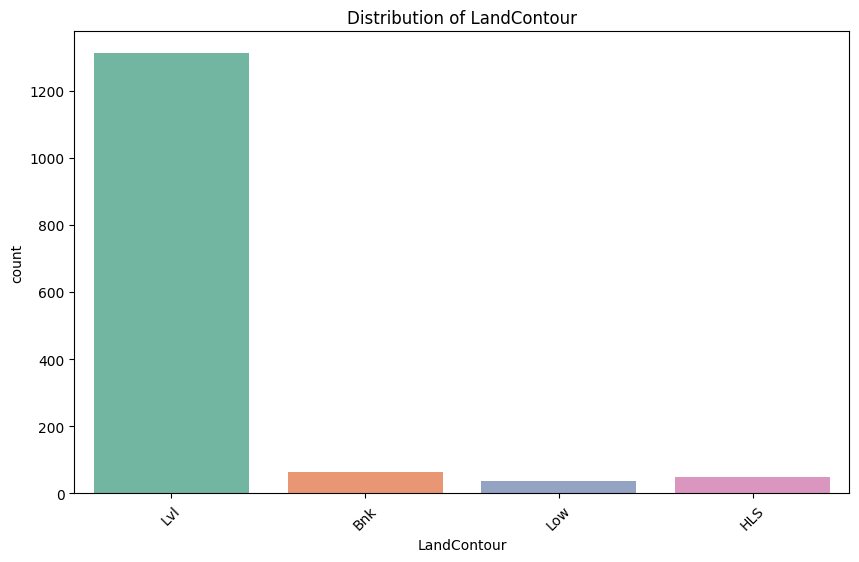

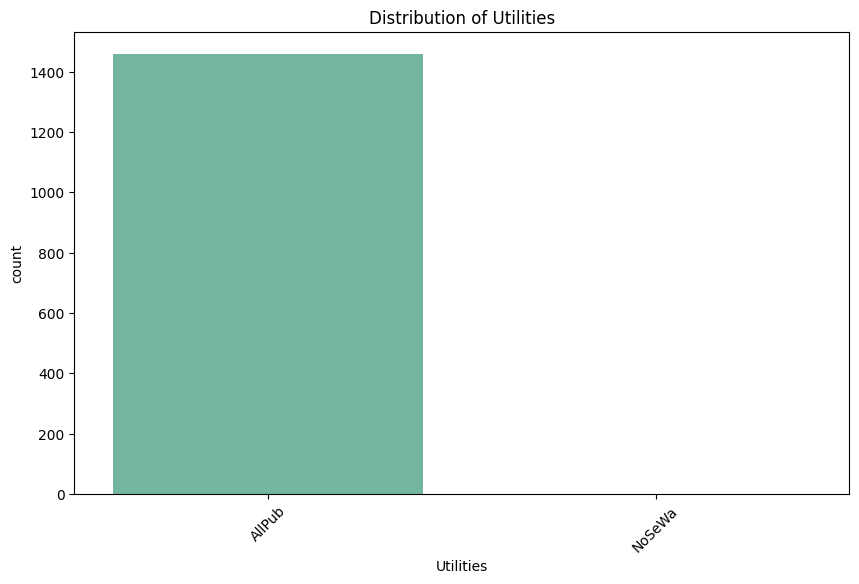

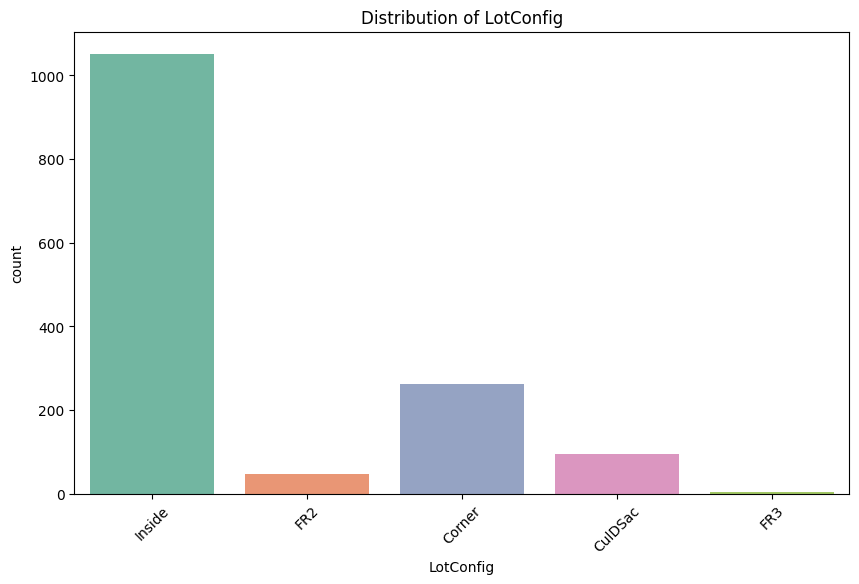

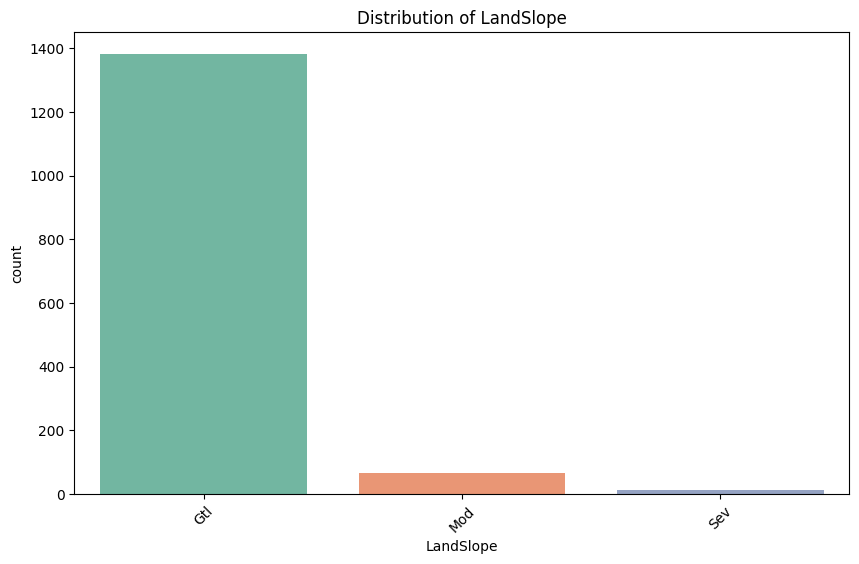

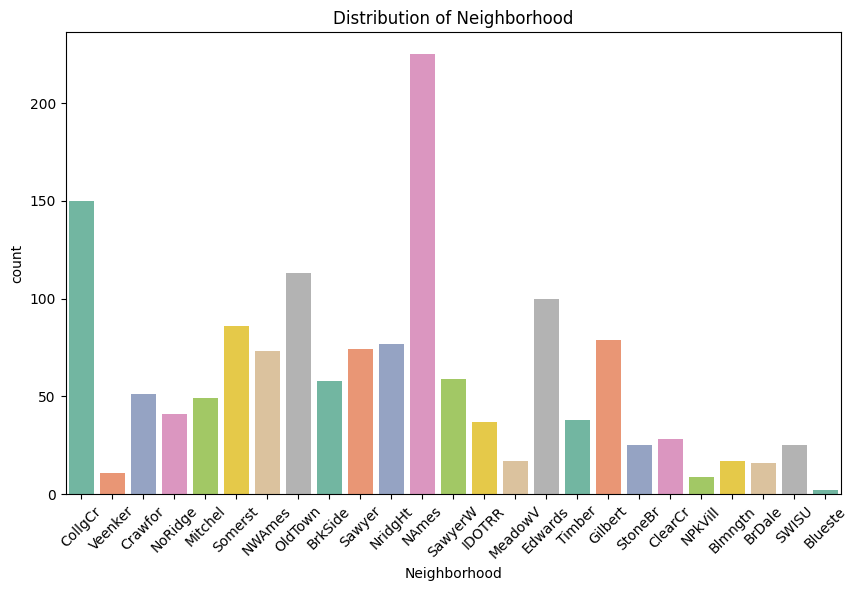

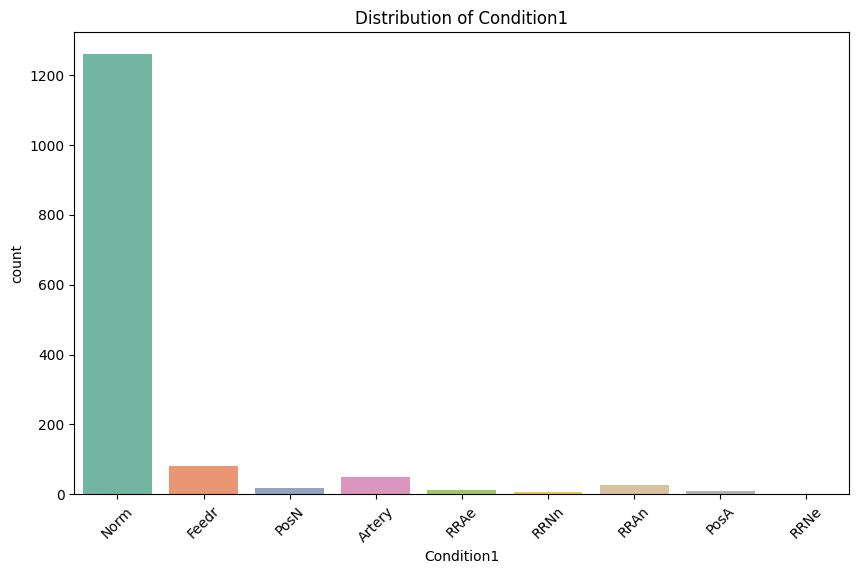

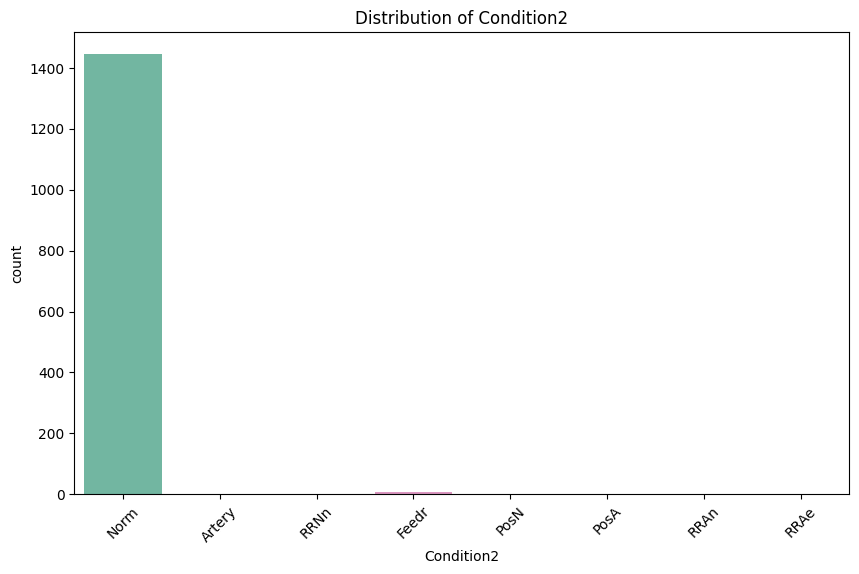

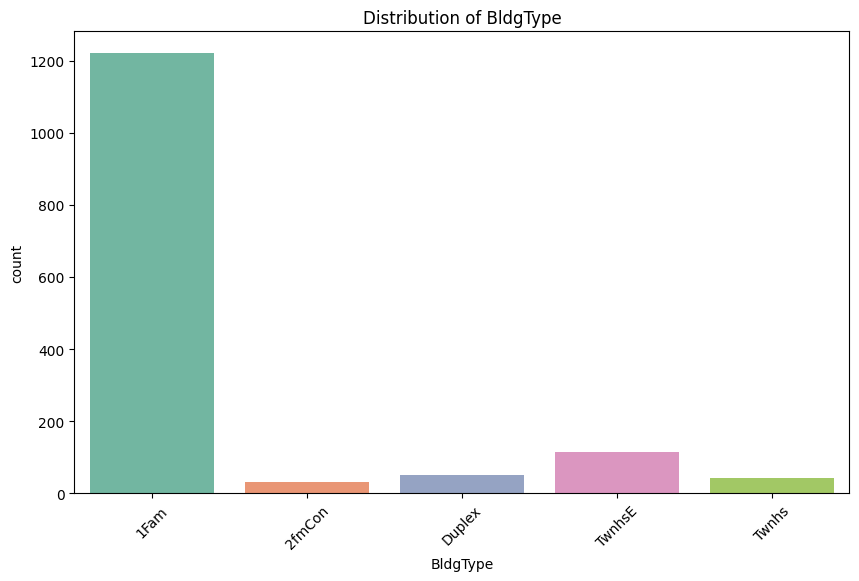

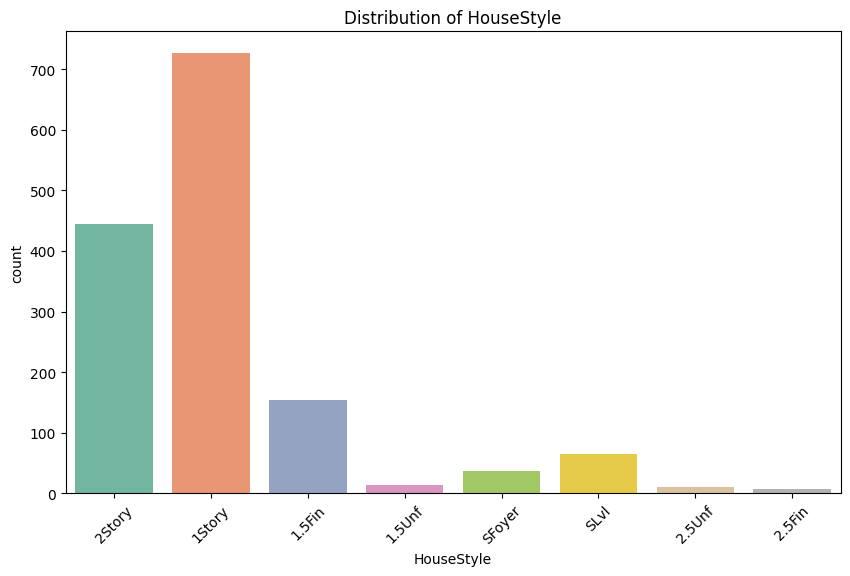

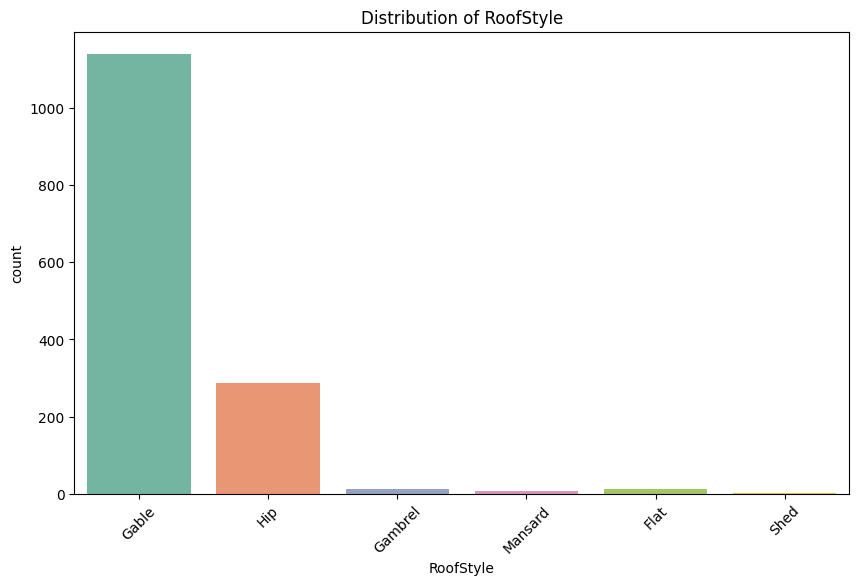

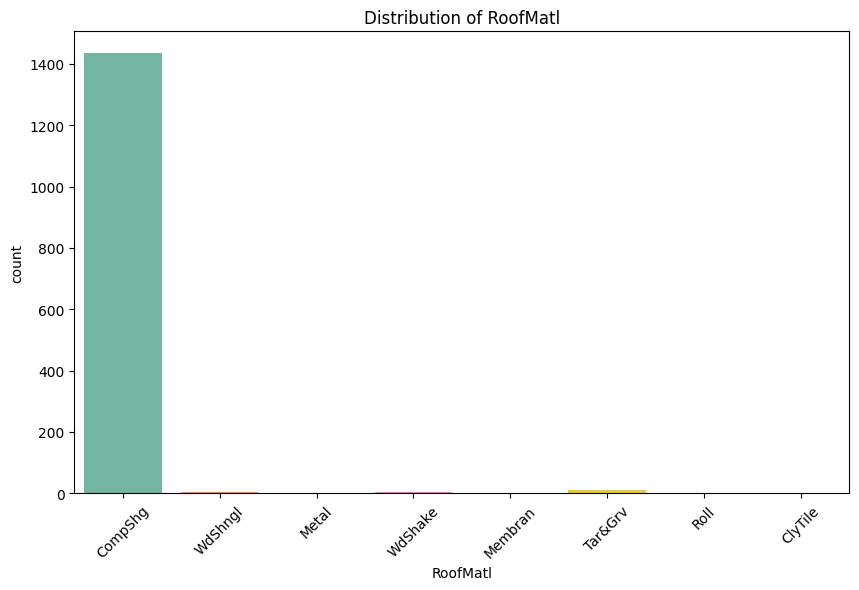

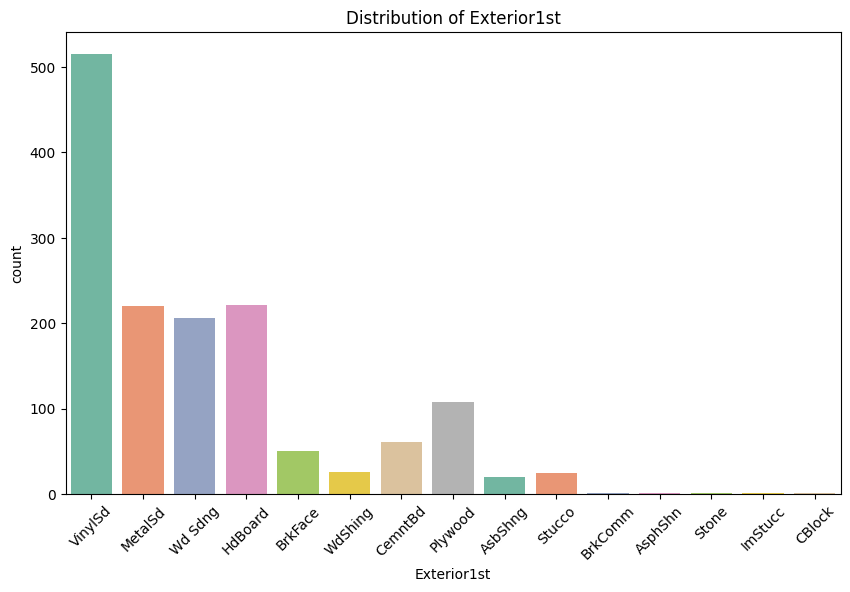

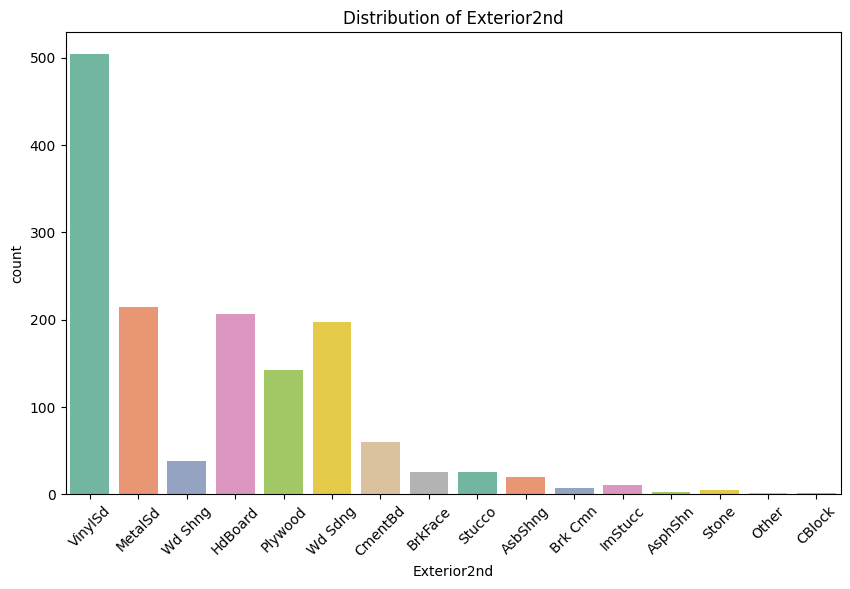

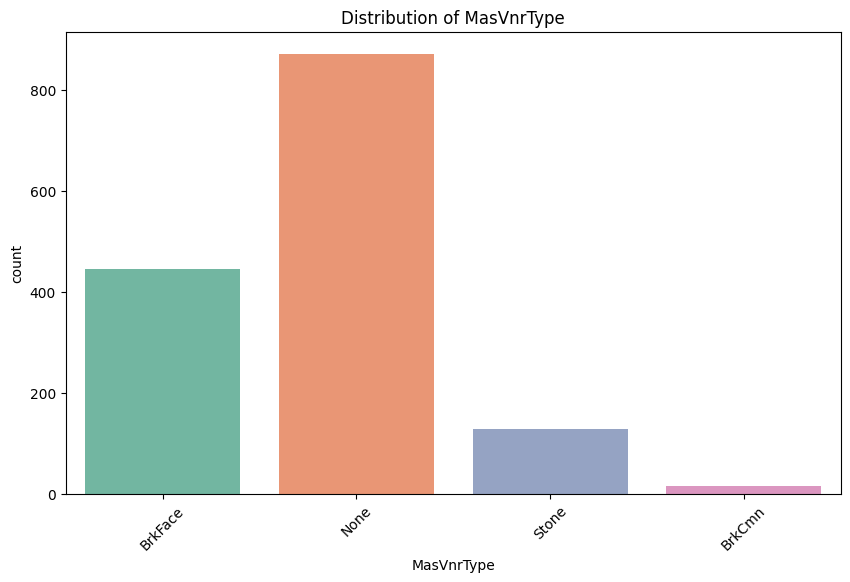

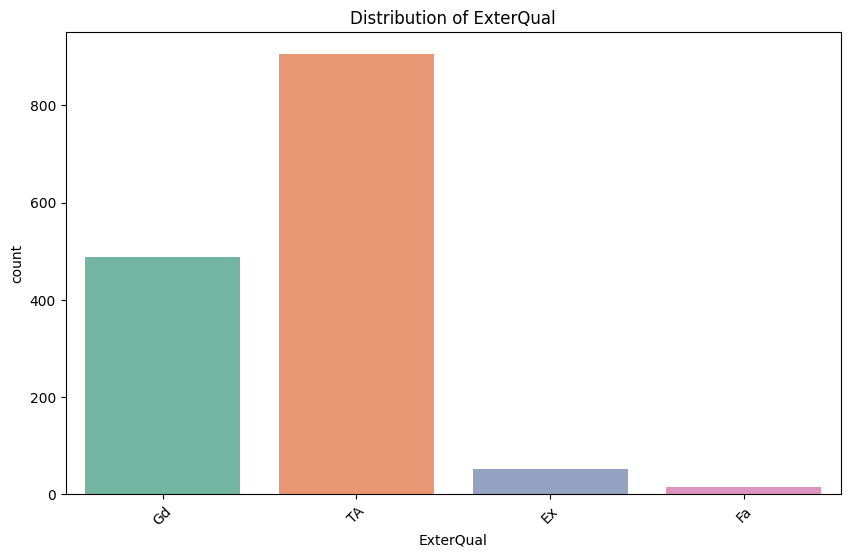

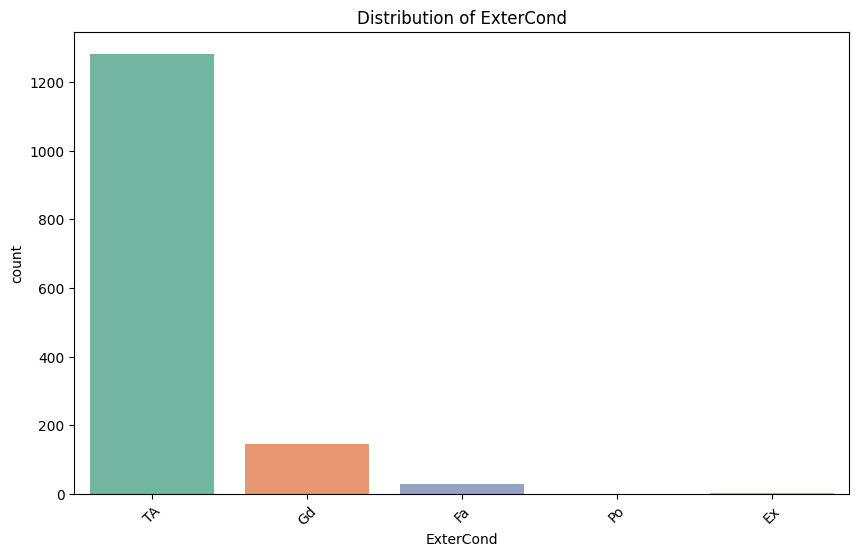

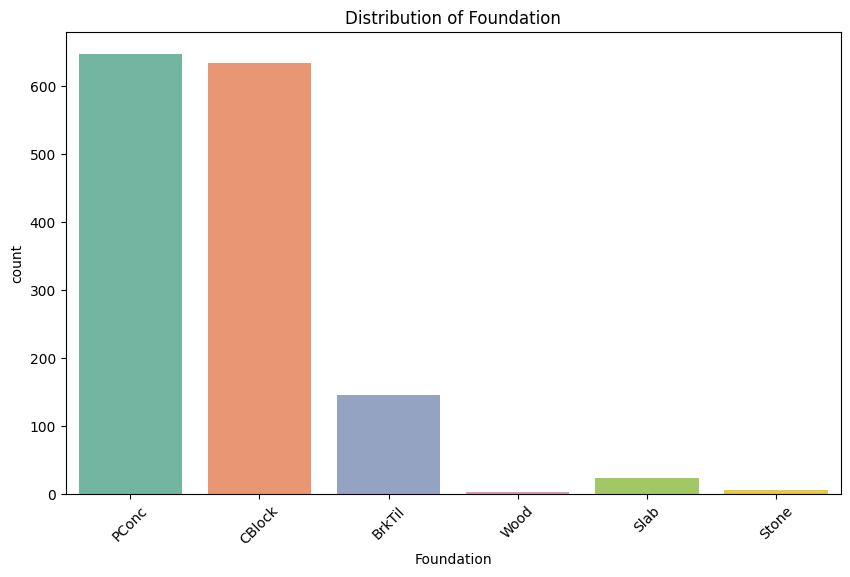

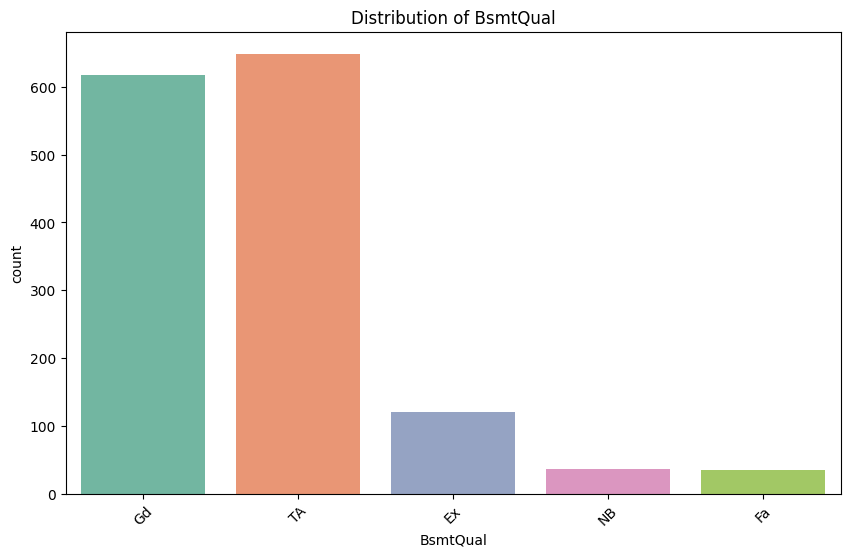

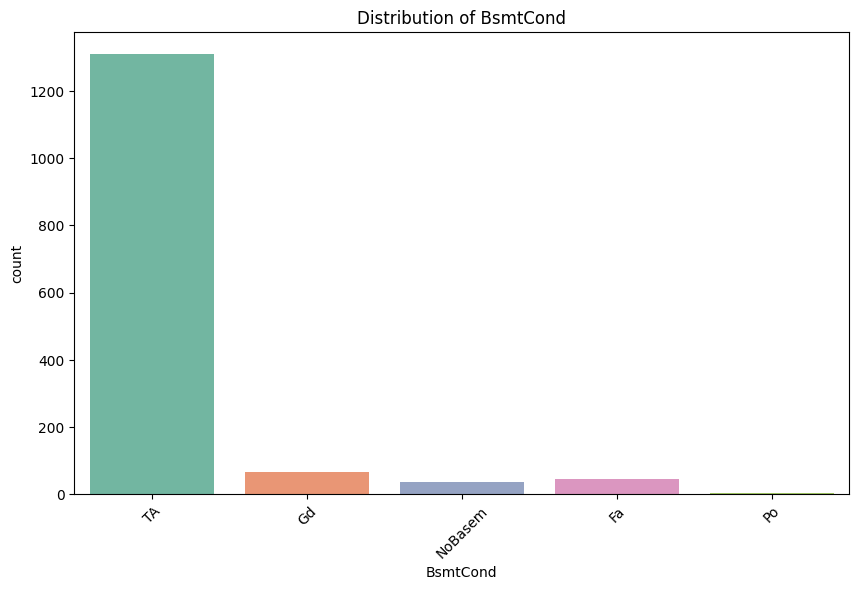

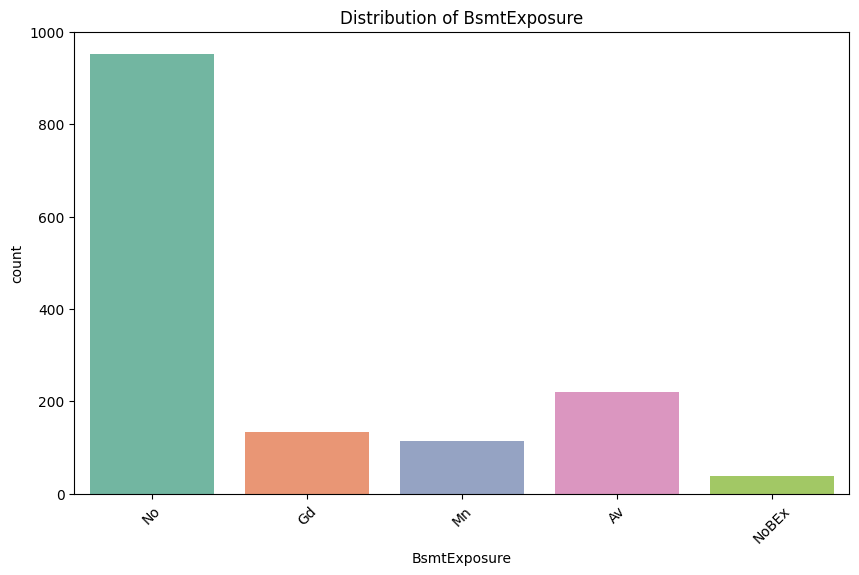

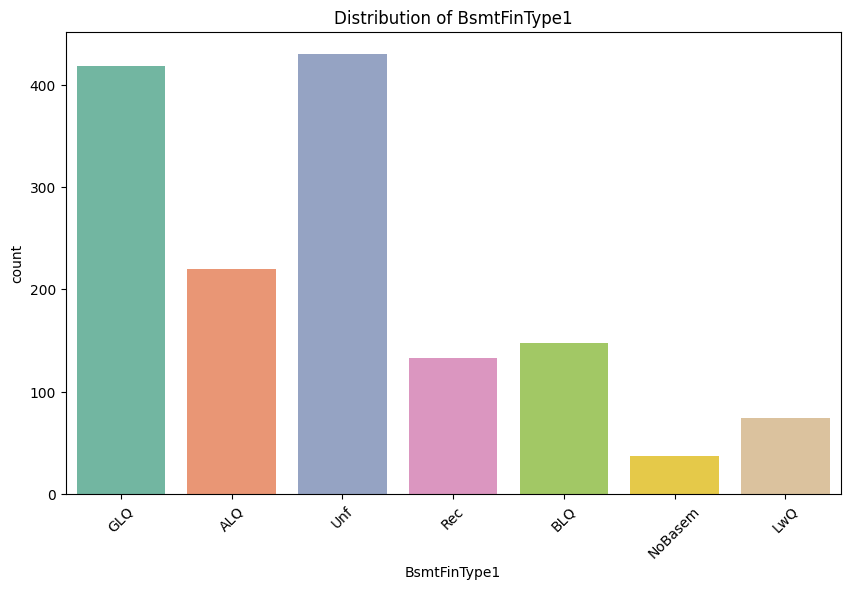

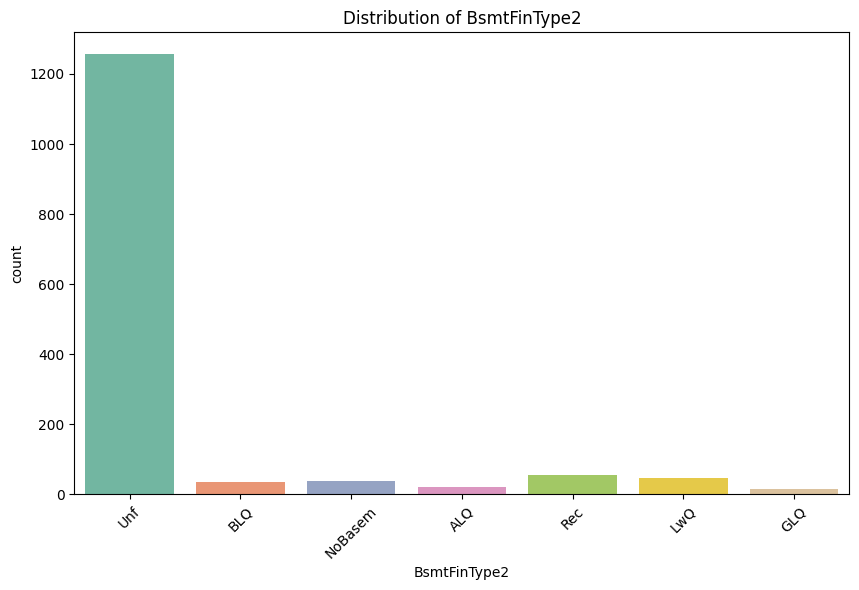

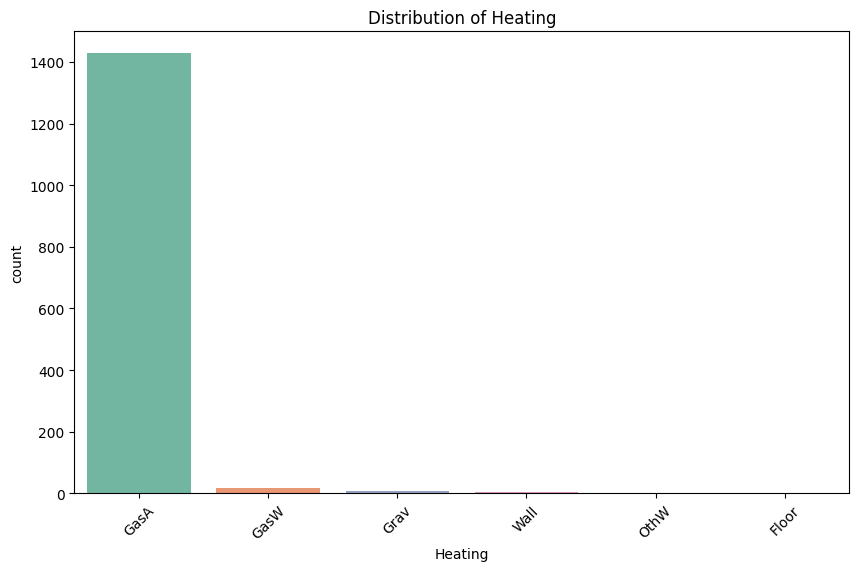

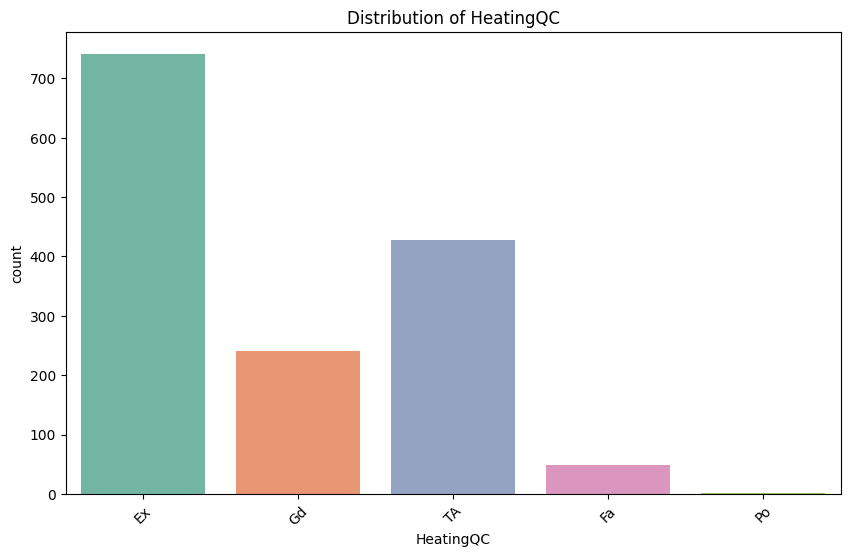

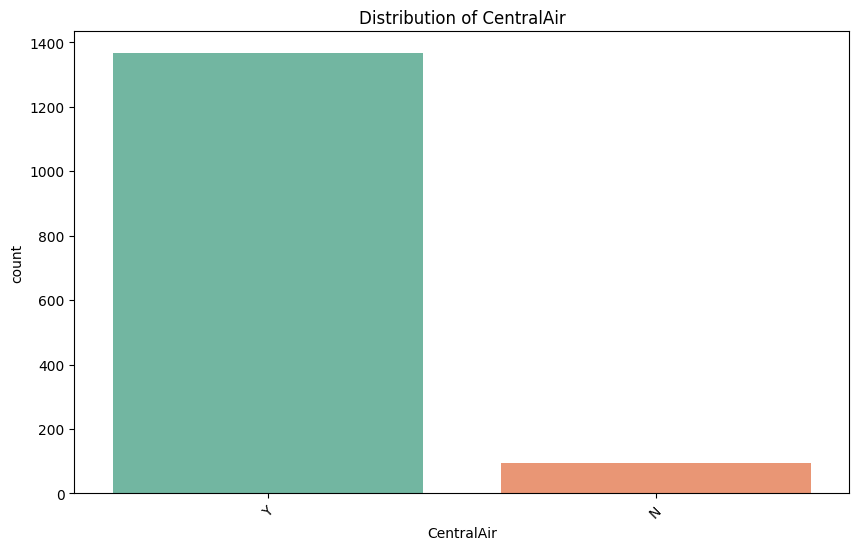

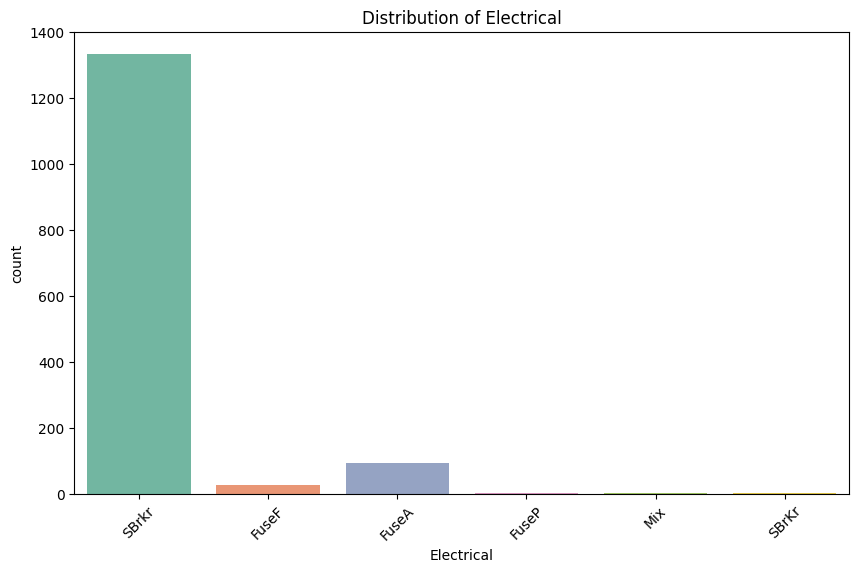

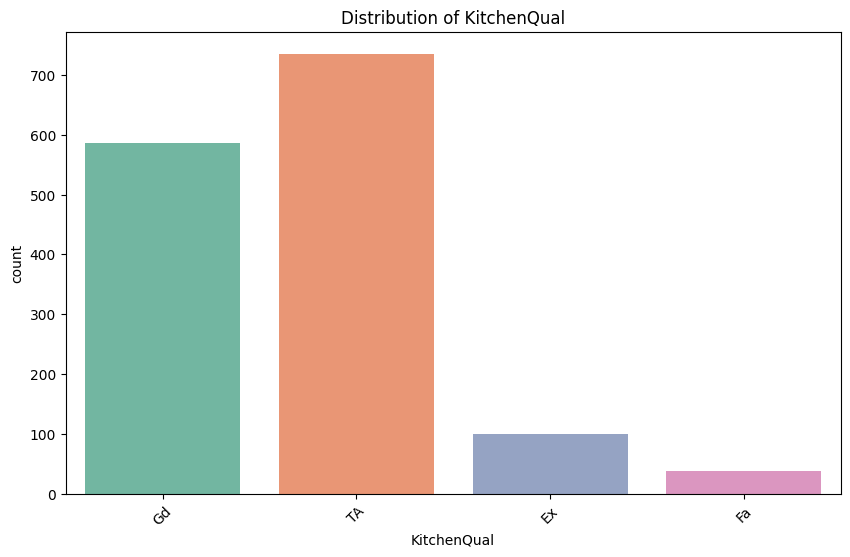

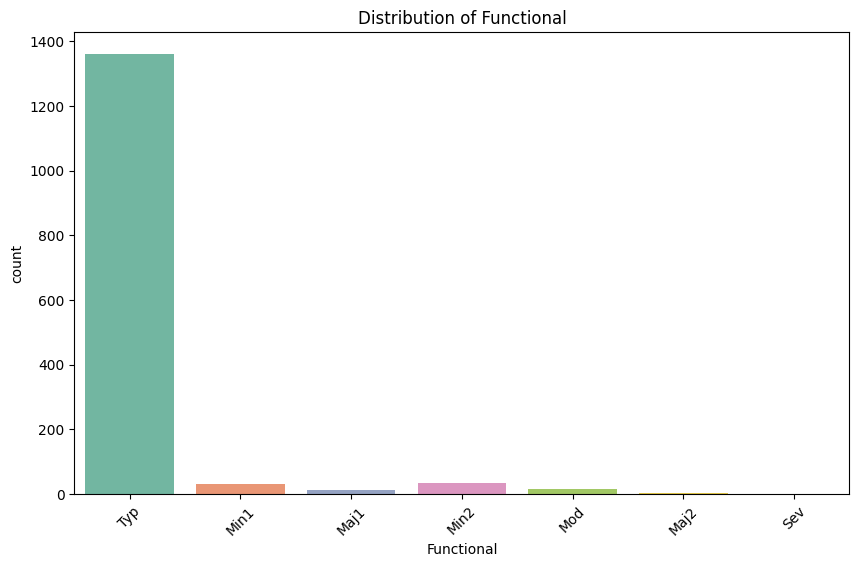

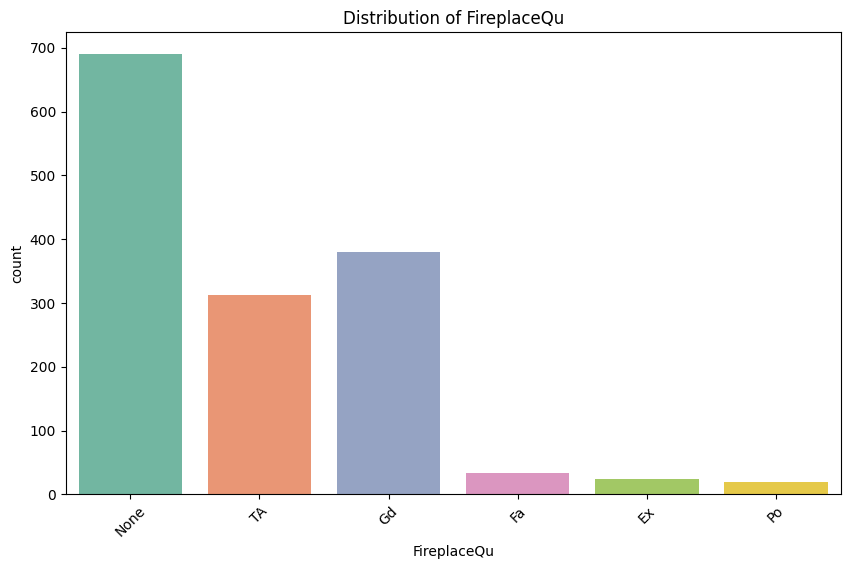

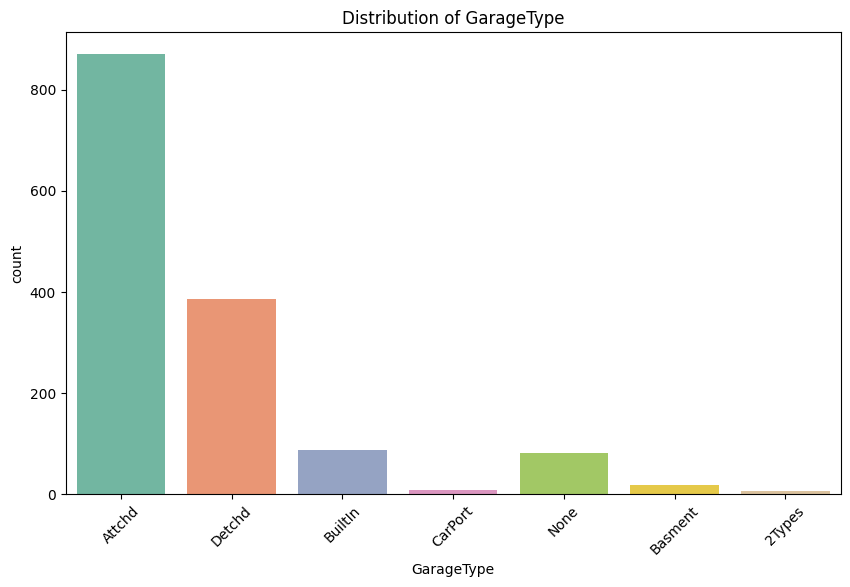

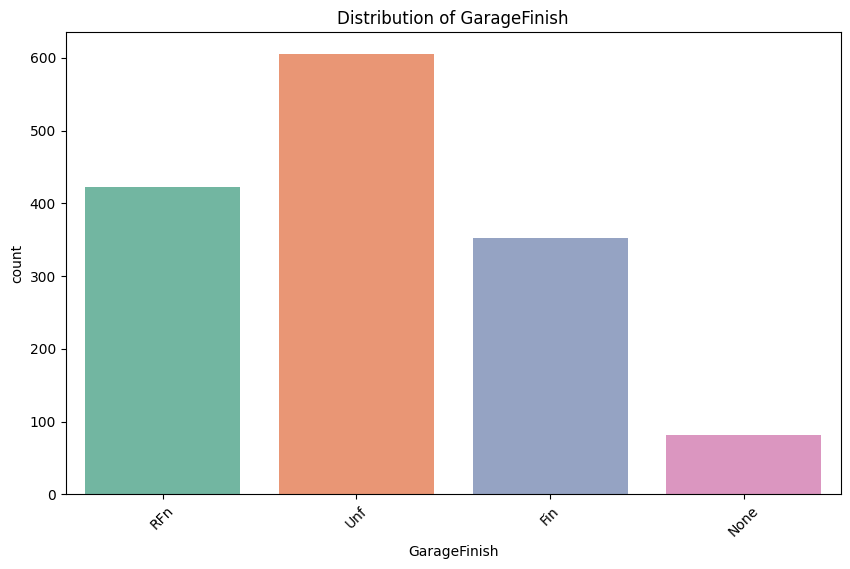

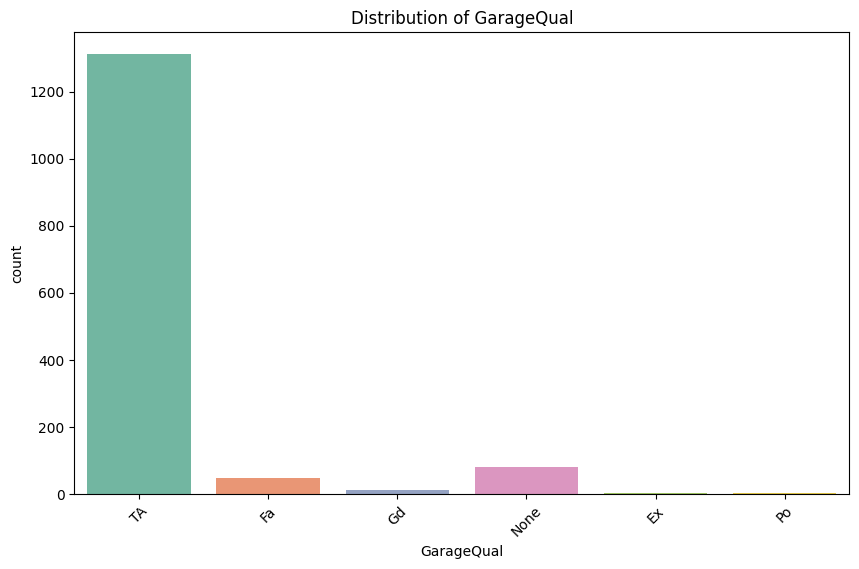

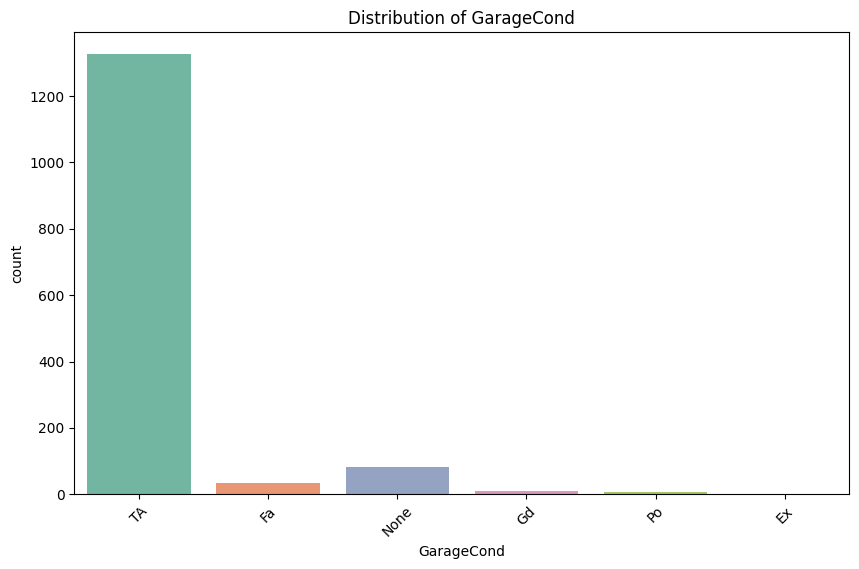

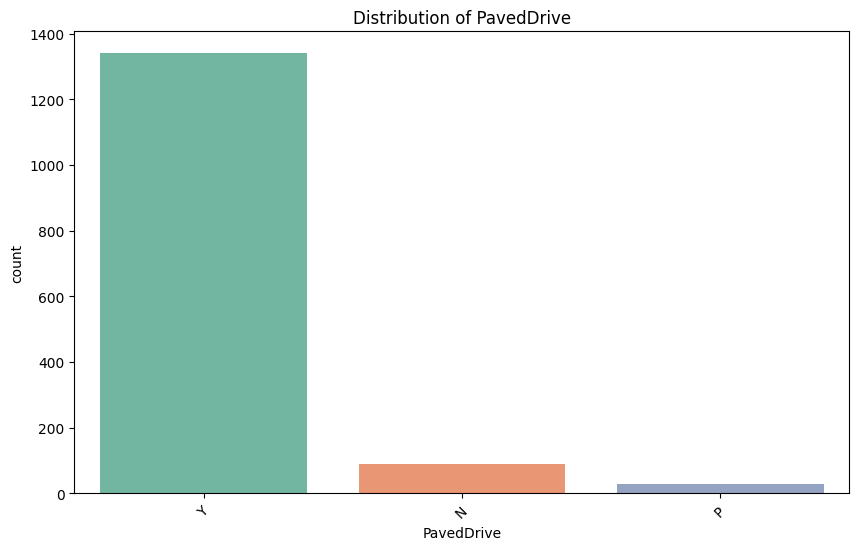

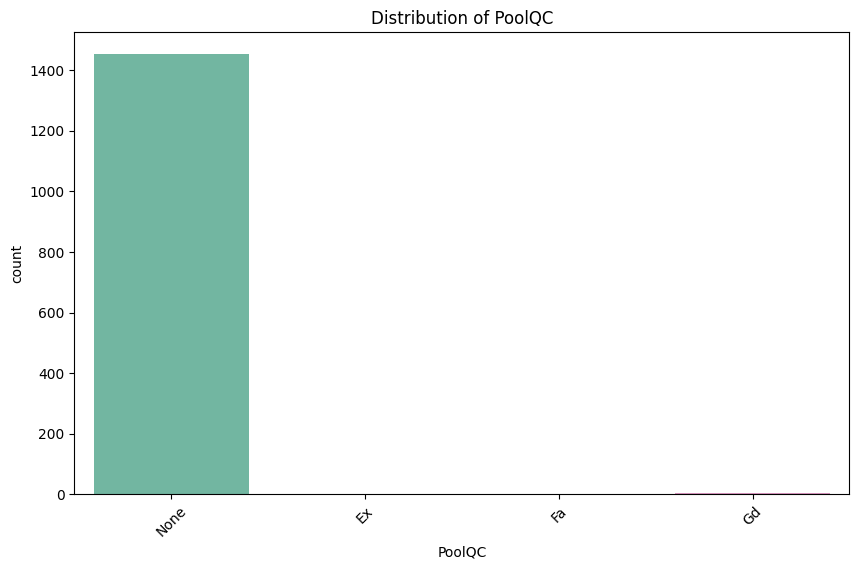

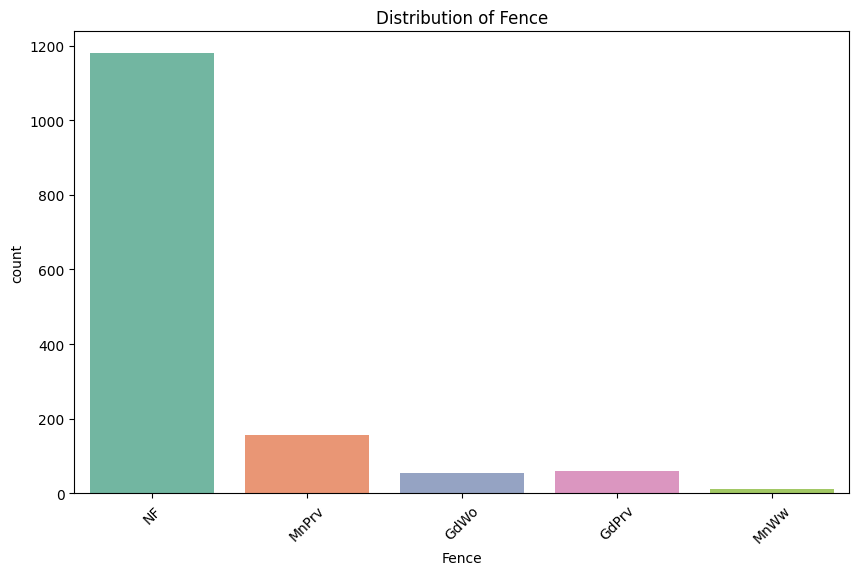

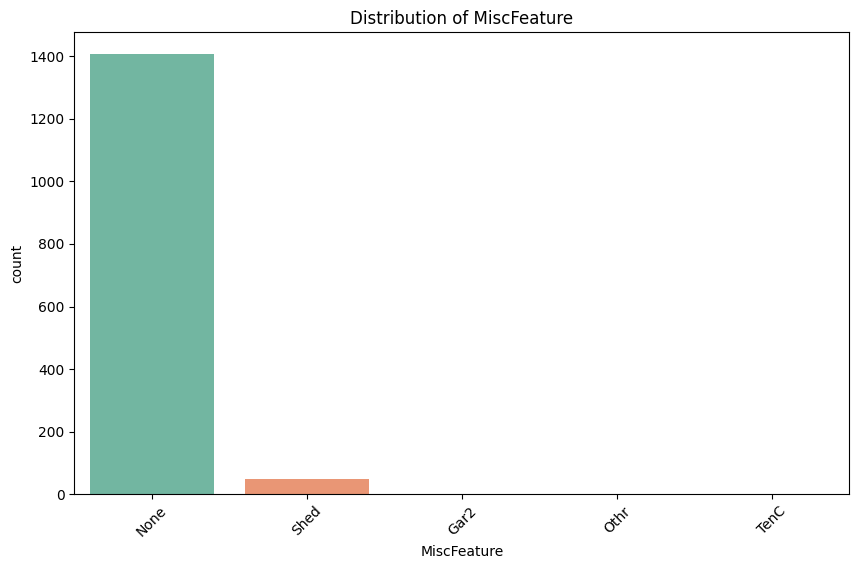

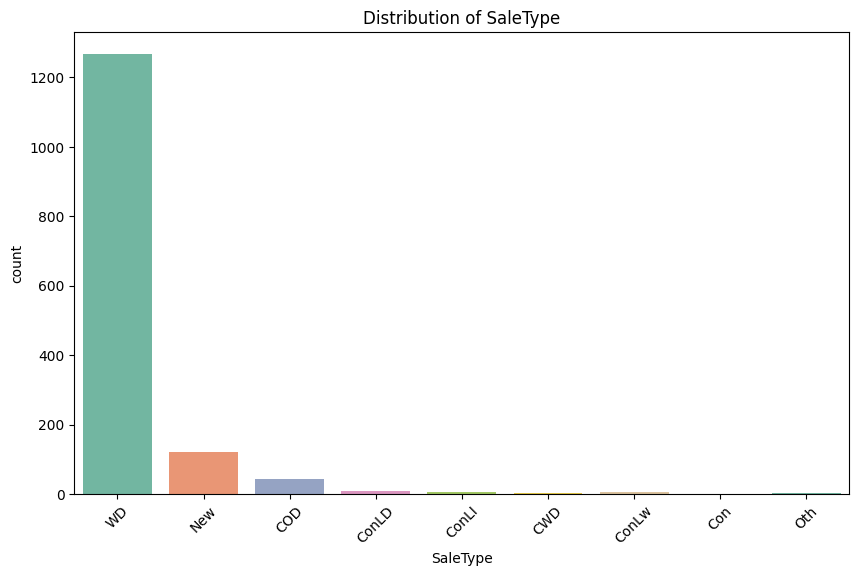

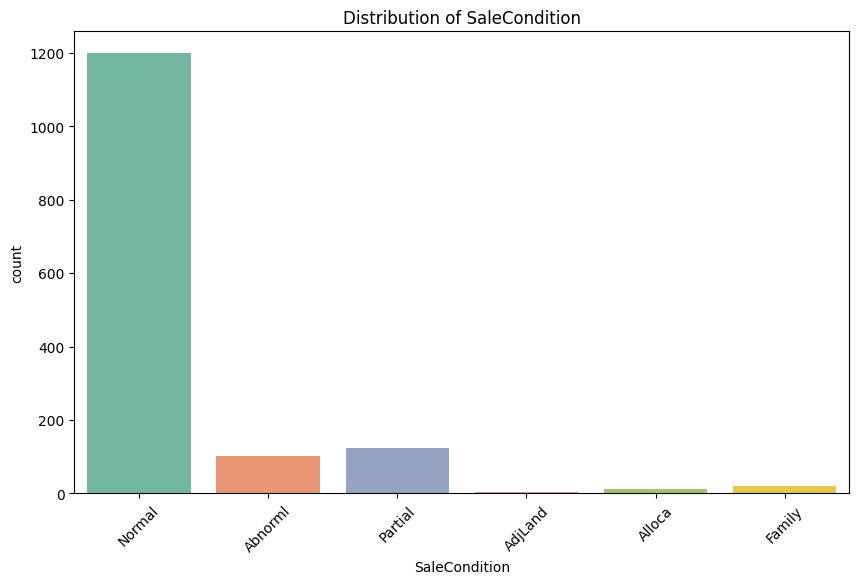

In [ ]:
# Count plots for categorical features with hue assigned to x
# Count plots for categorical features
categorical_columns = train_set.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_set, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


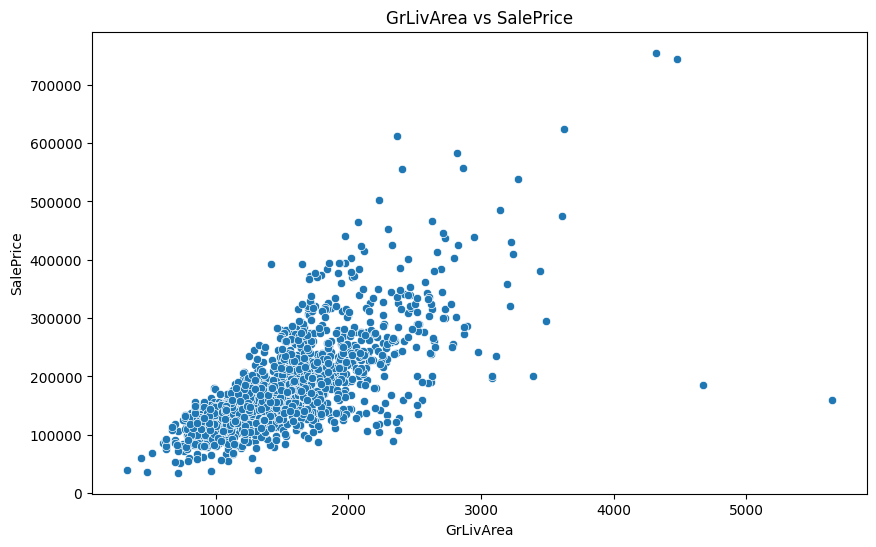

In [ ]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_set['GrLivArea'], y=train_set['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

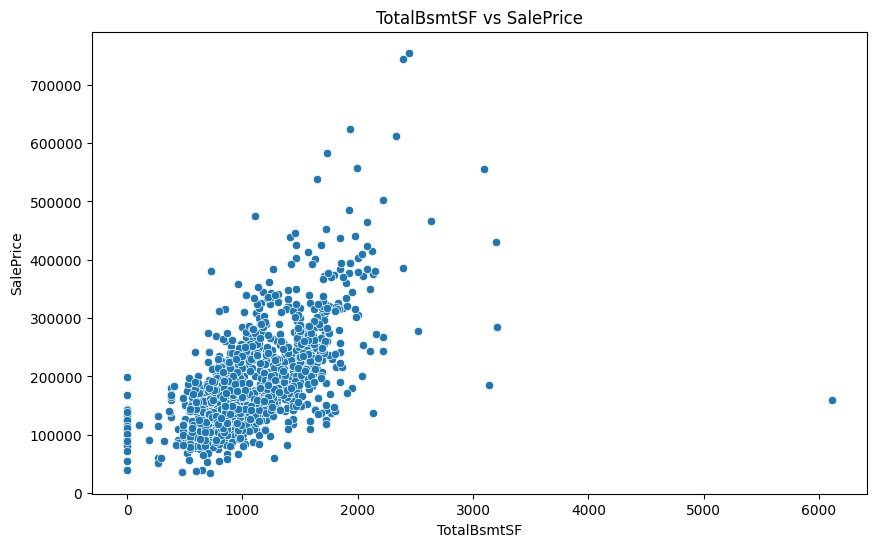

In [ ]:
 #Scatter plot for TotalBsmtSF vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_set['TotalBsmtSF'], y=train_set['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

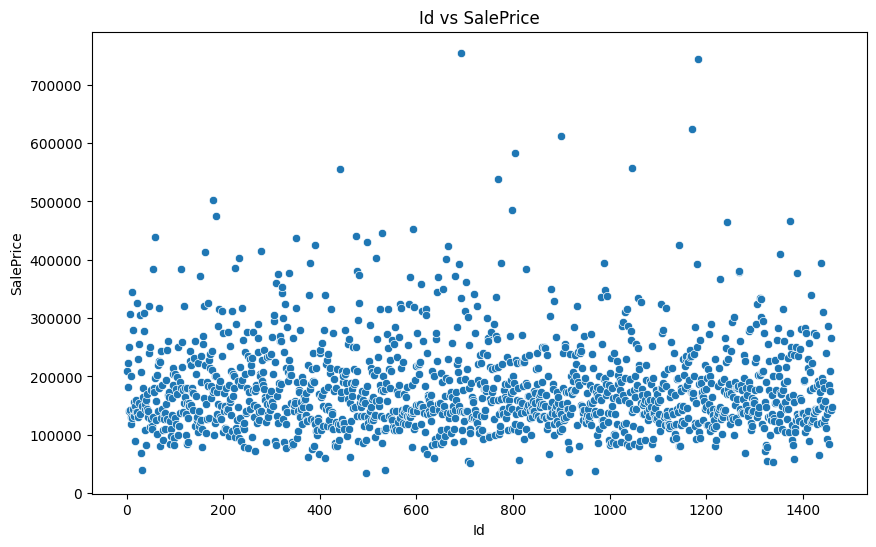

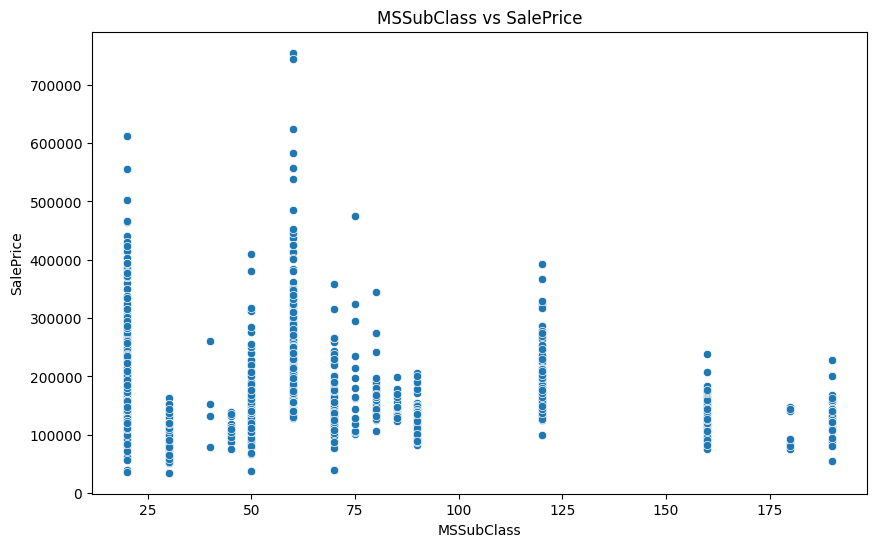

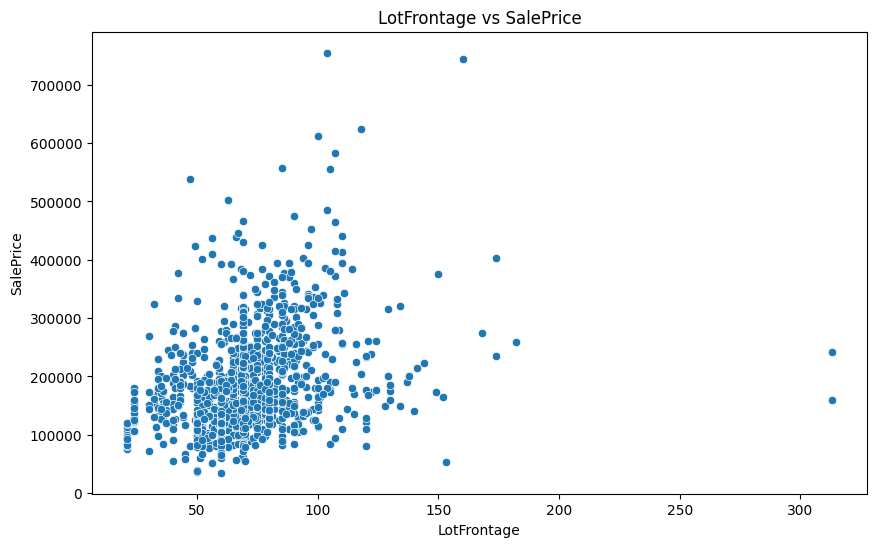

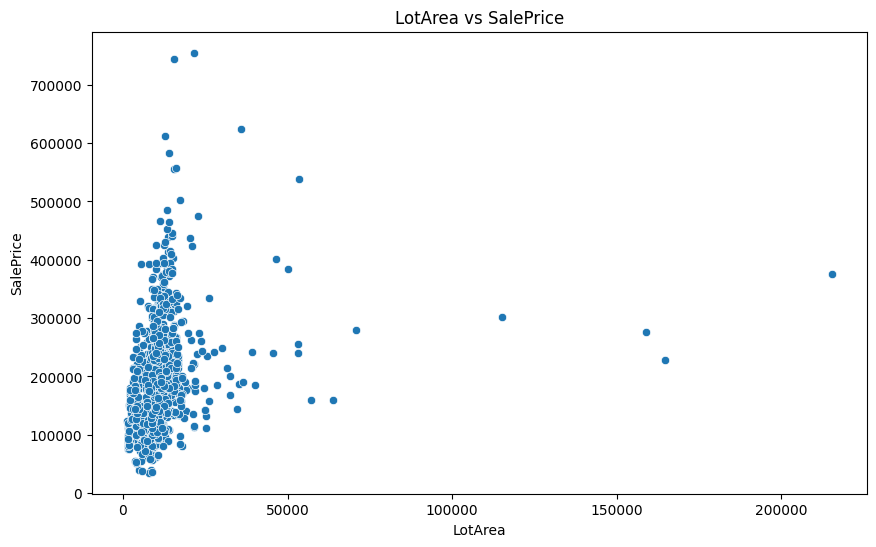

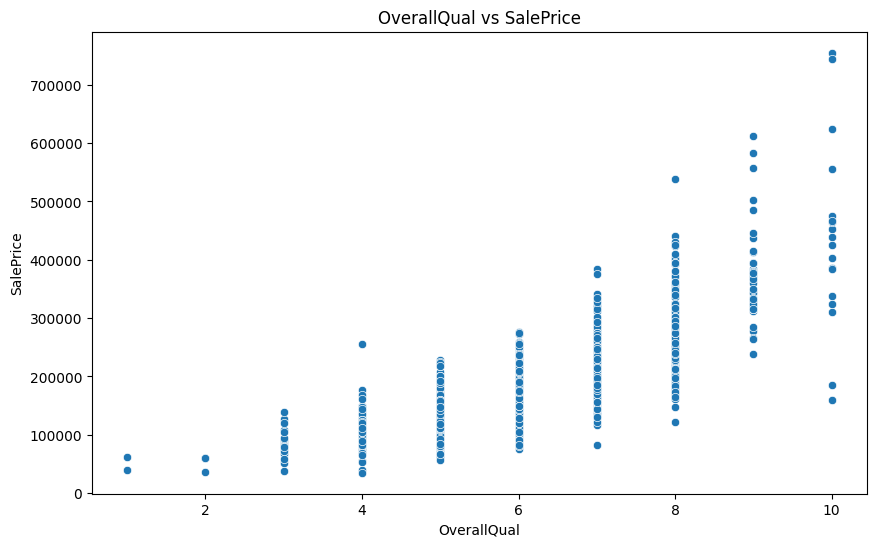

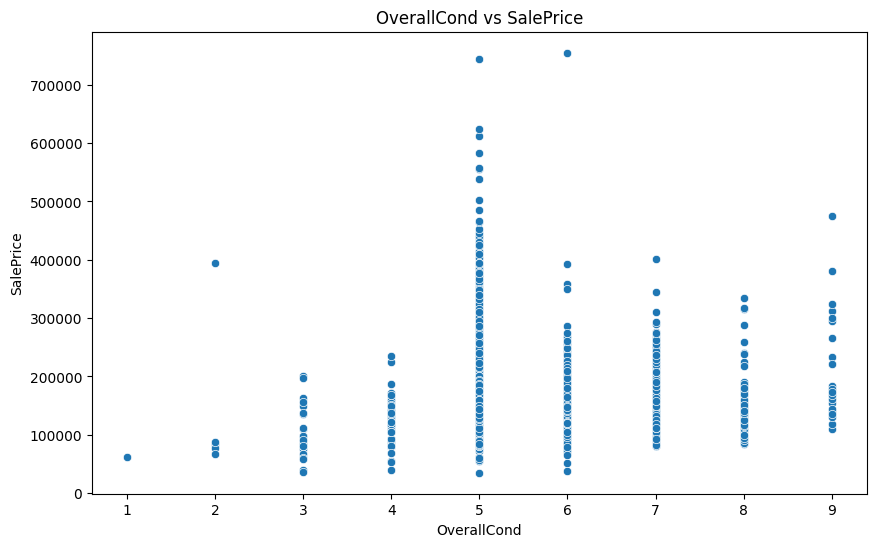

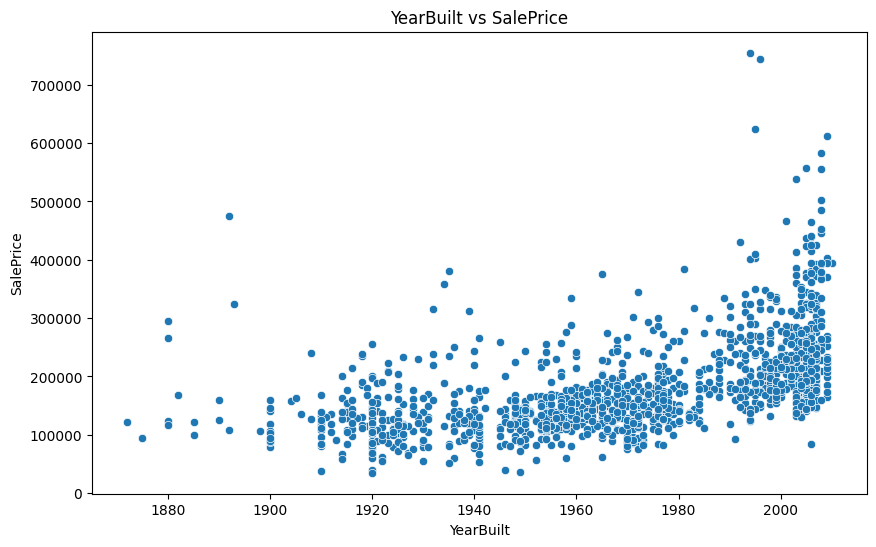

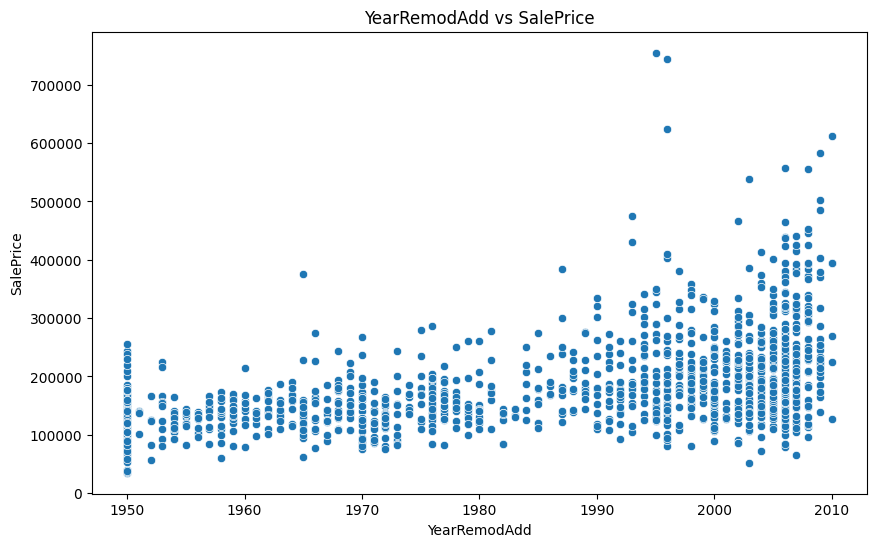

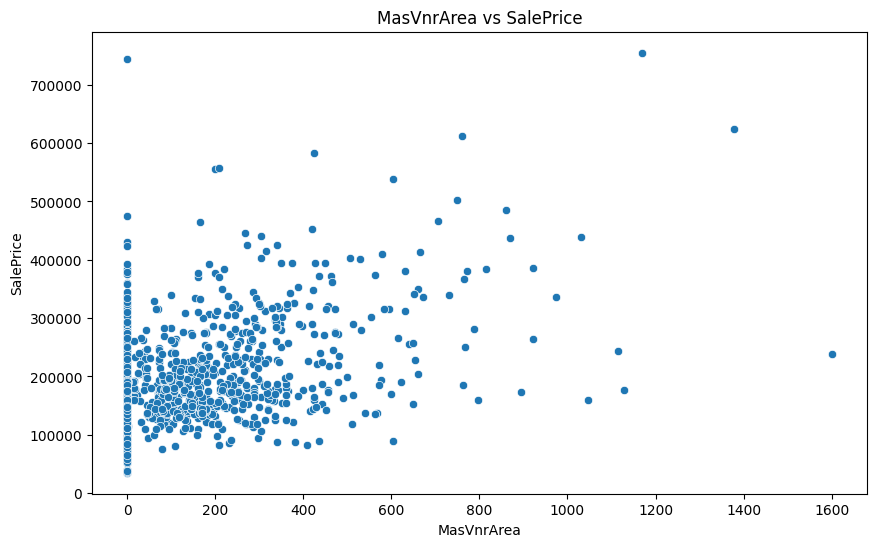

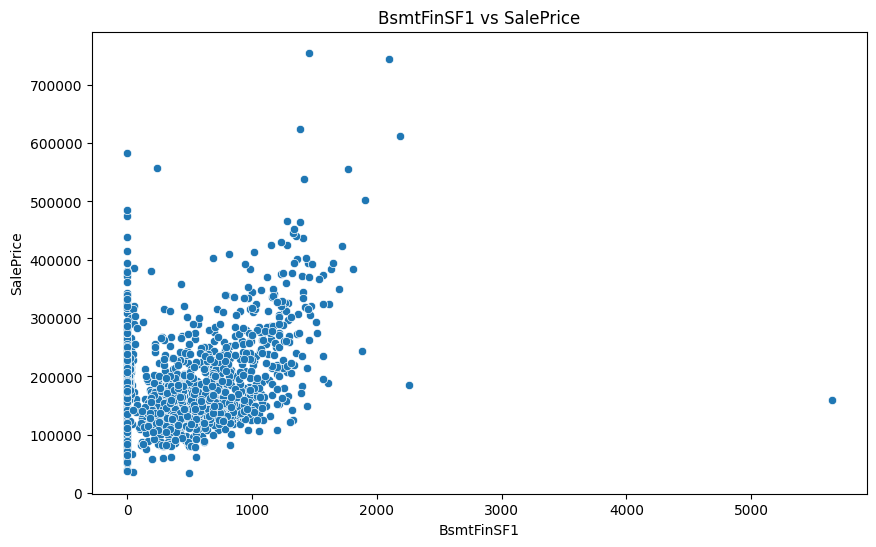

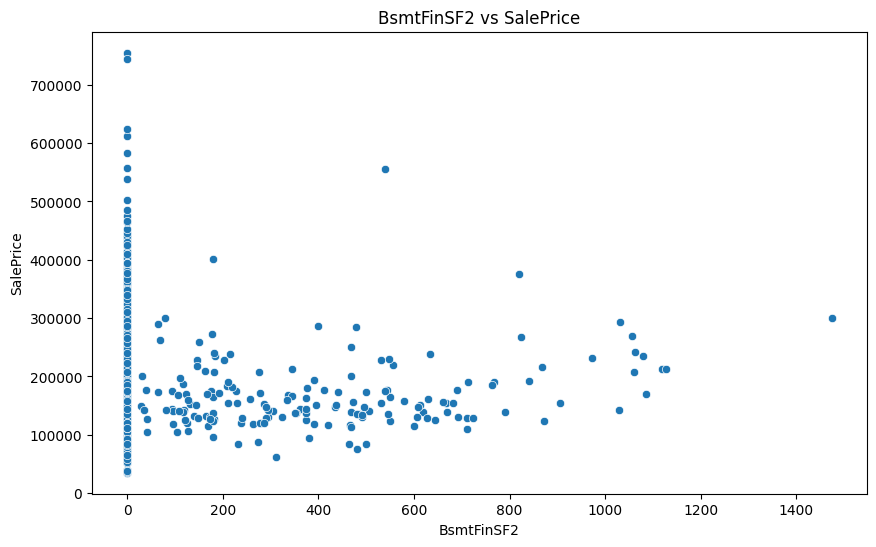

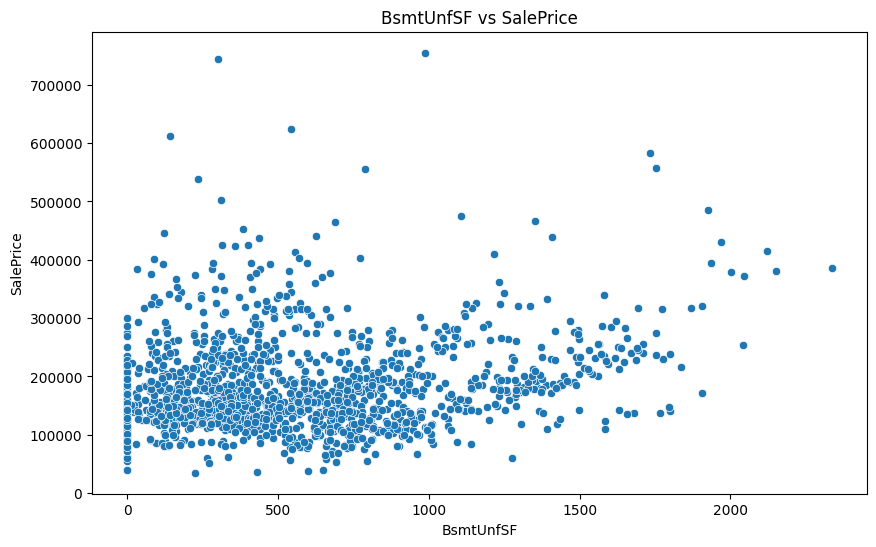

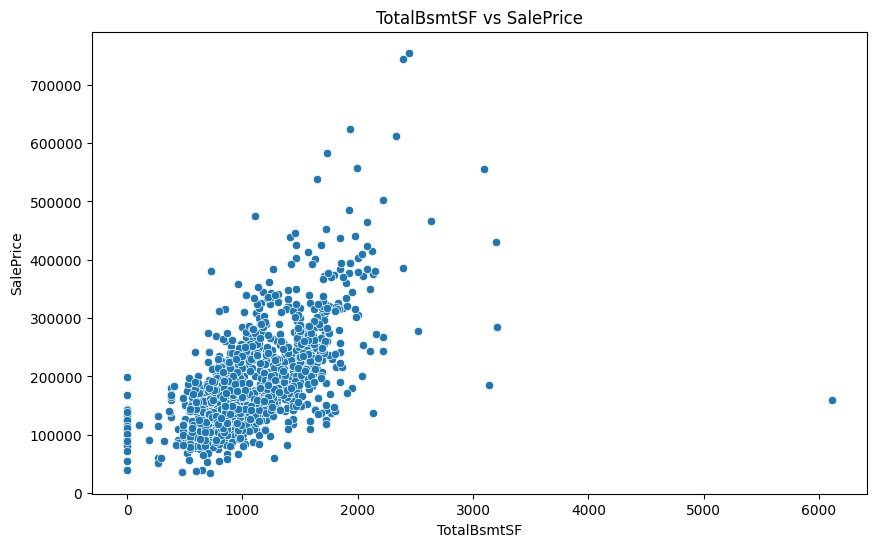

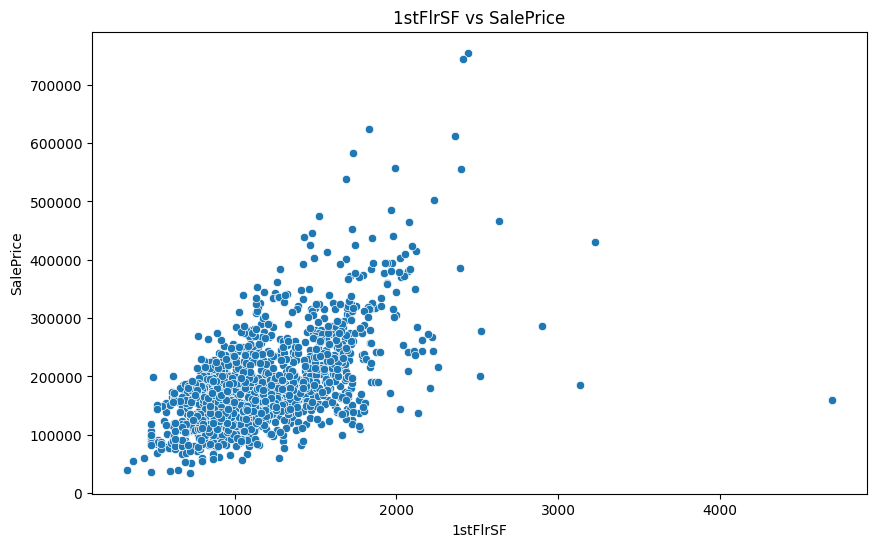

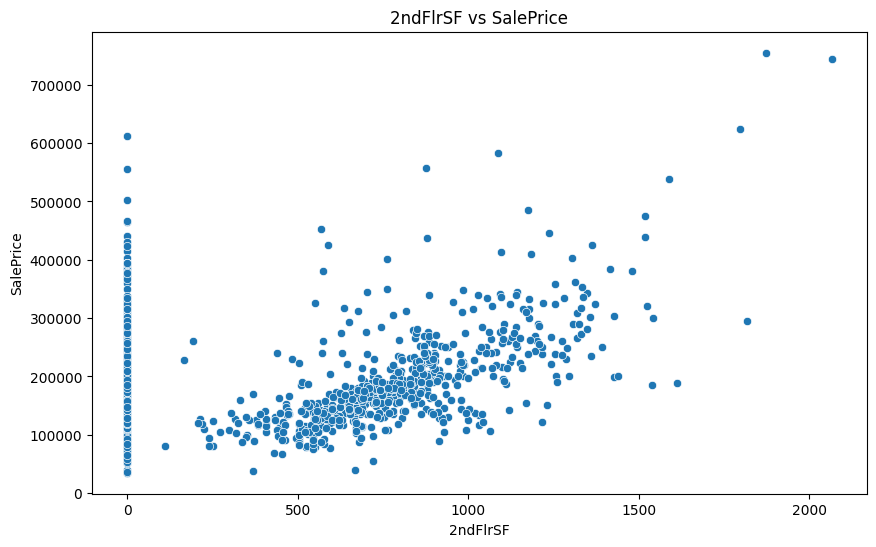

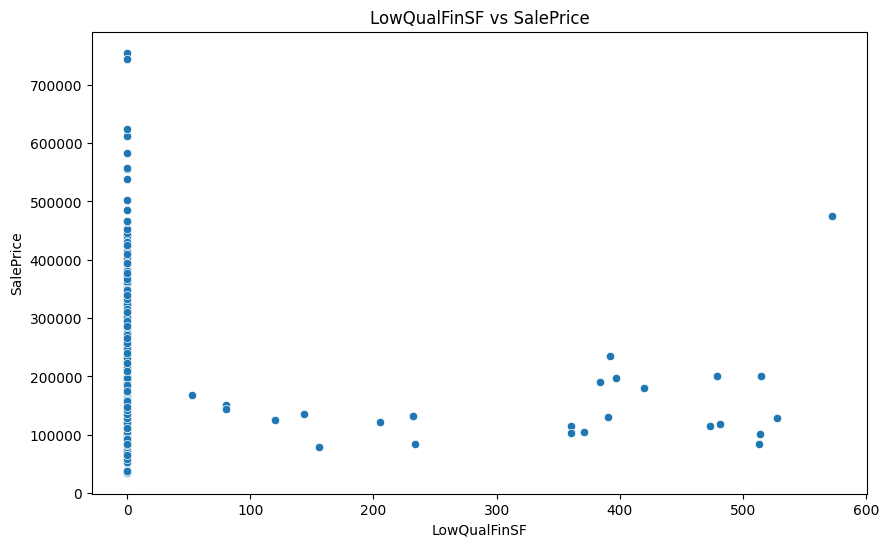

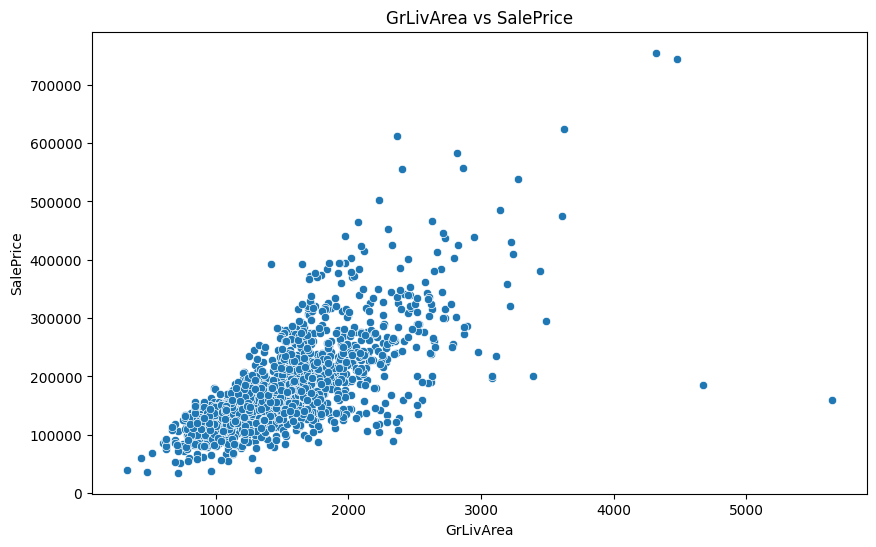

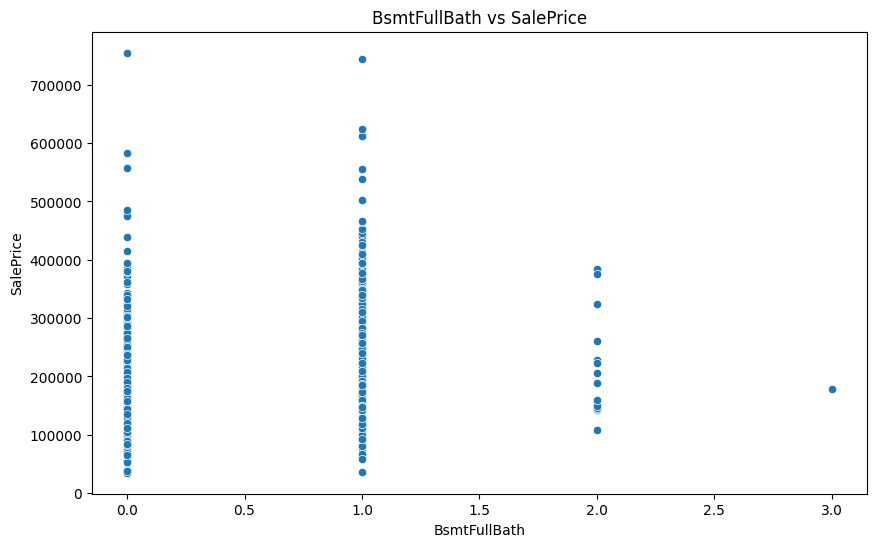

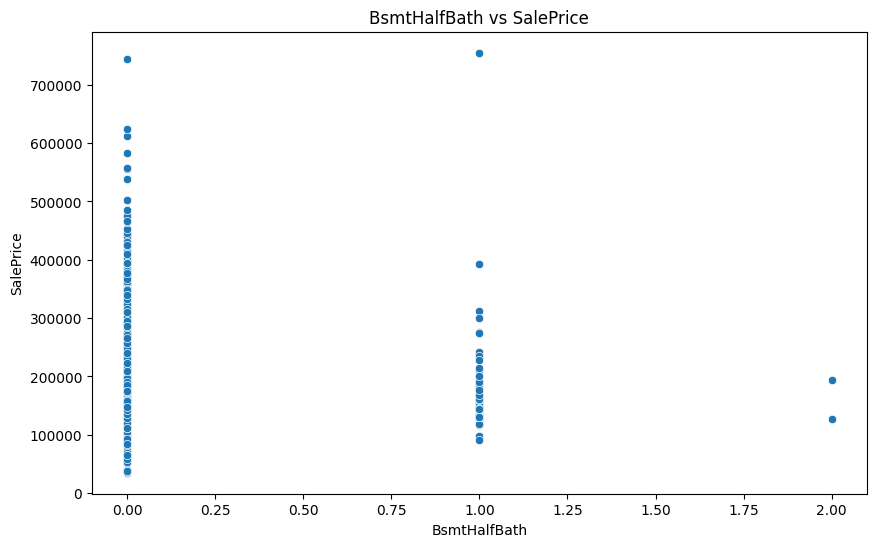

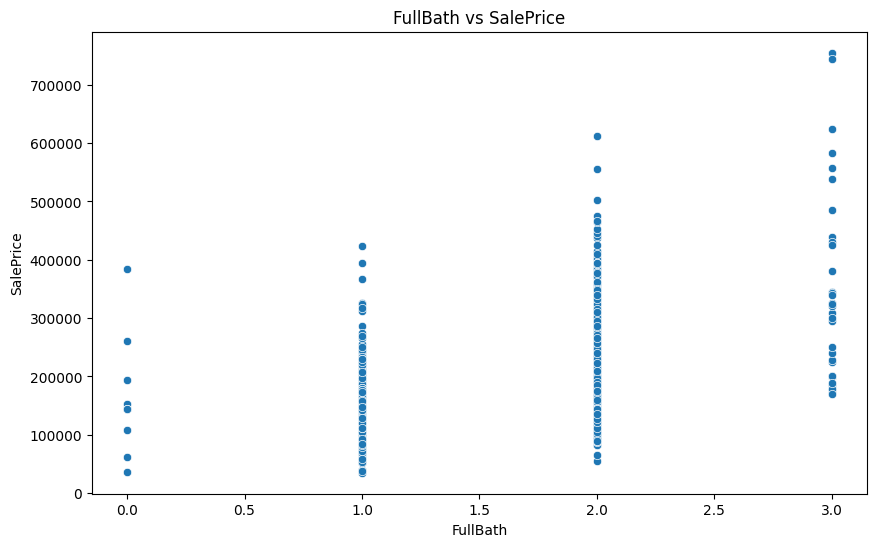

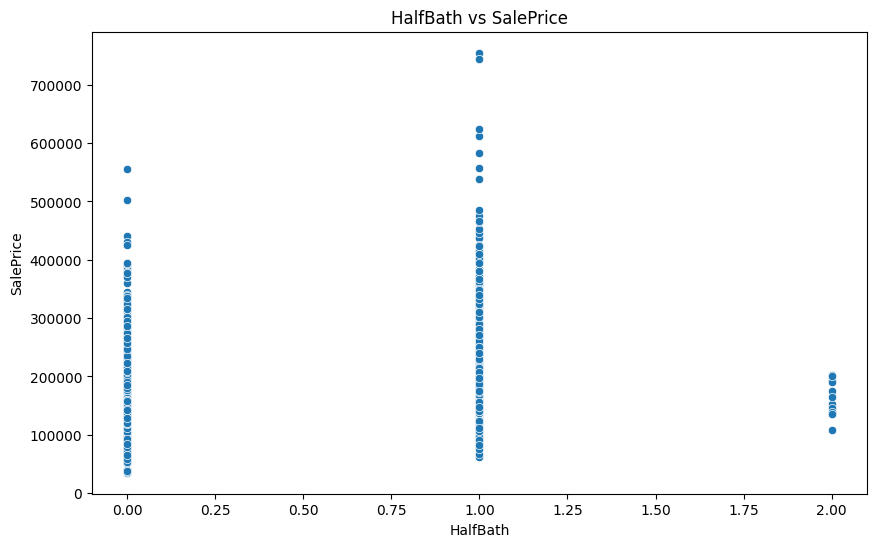

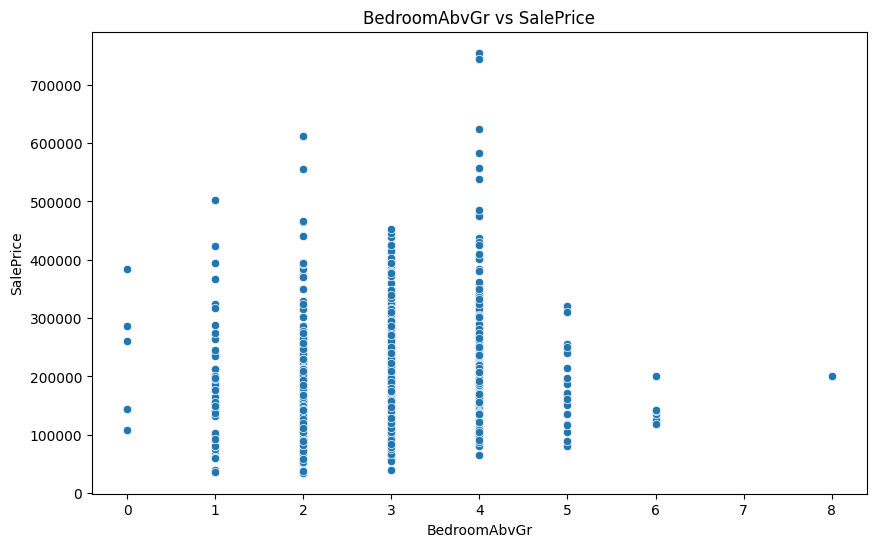

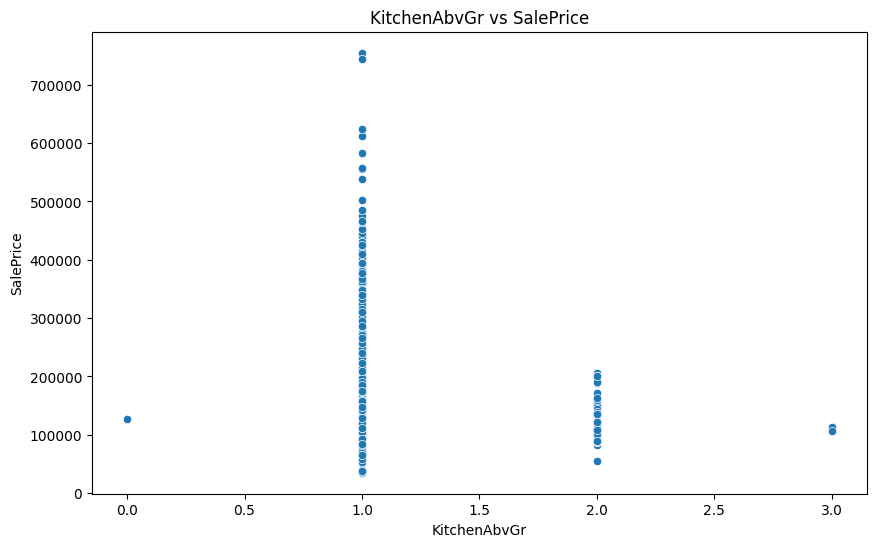

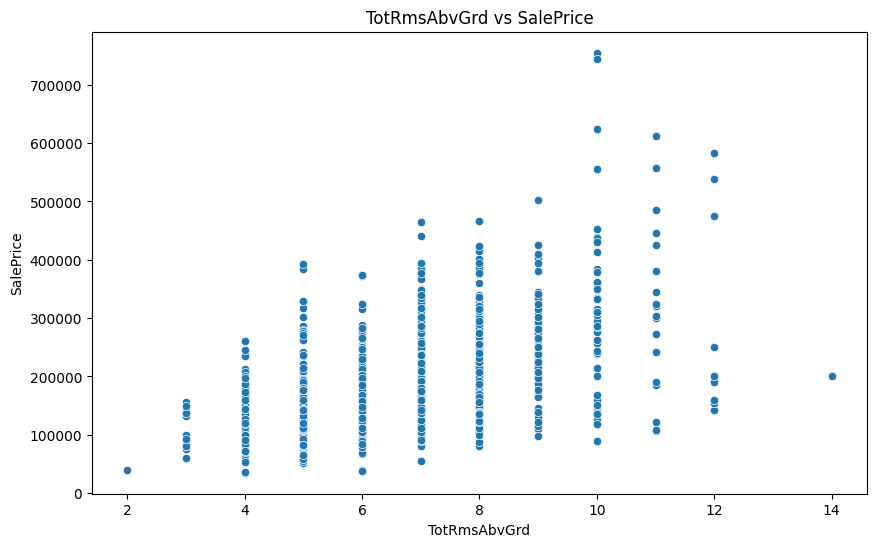

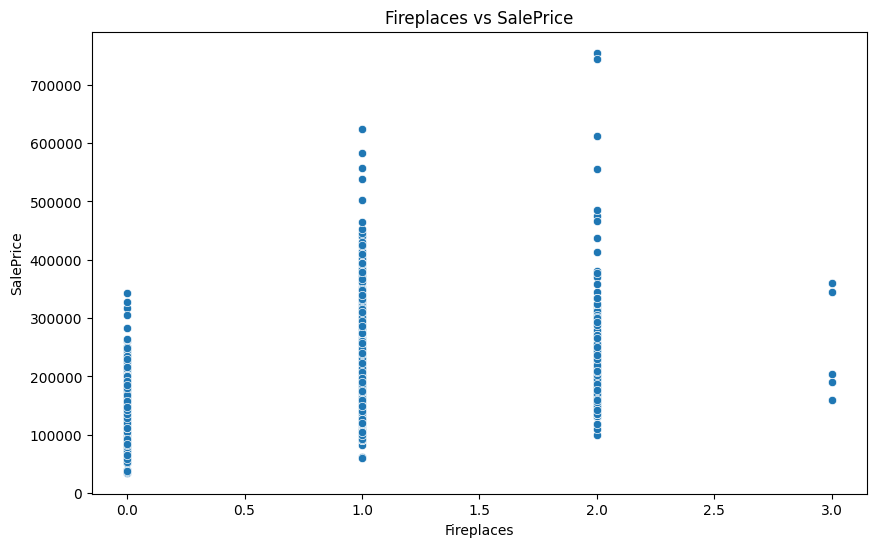

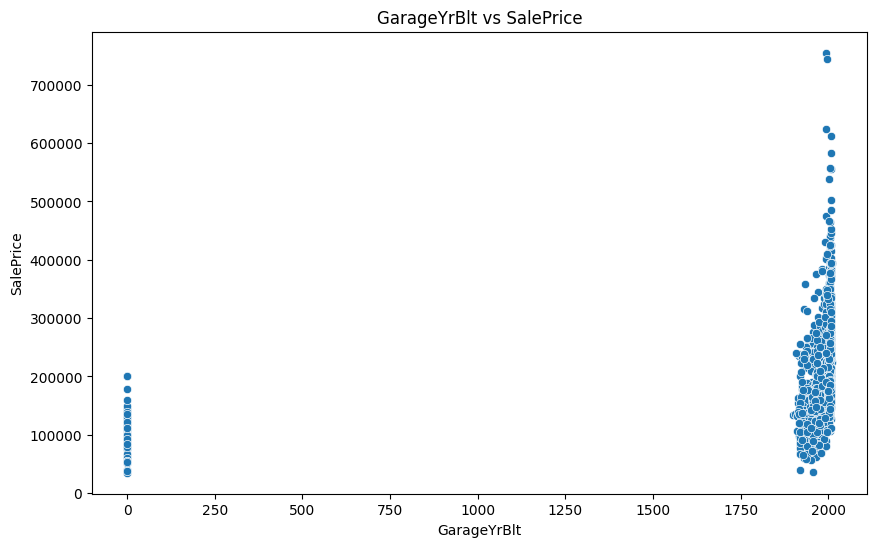

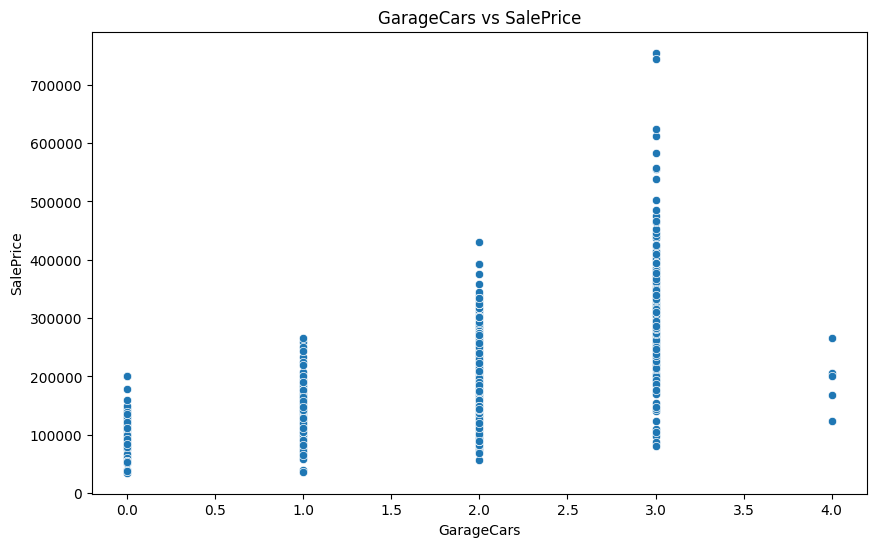

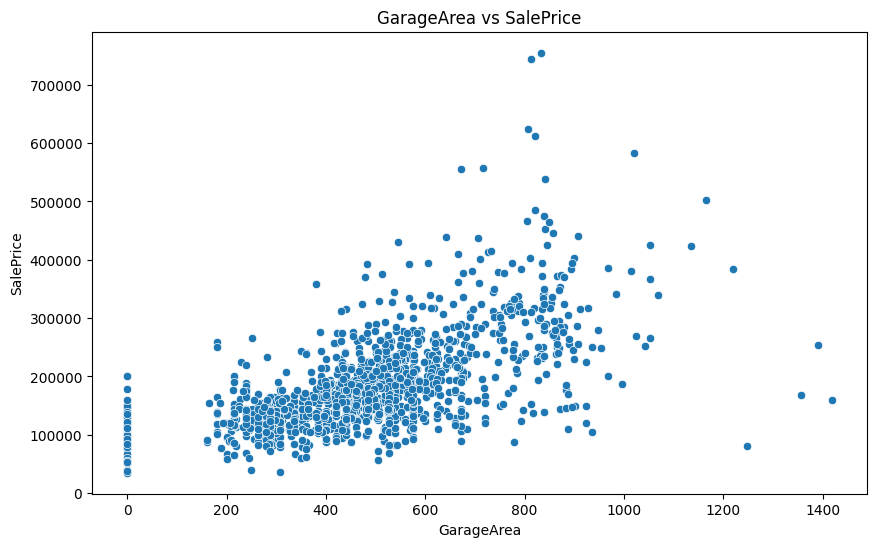

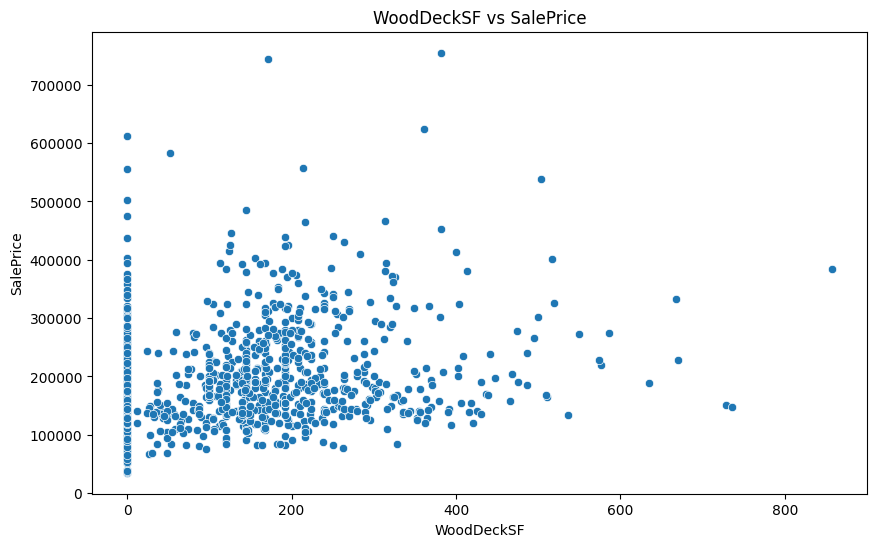

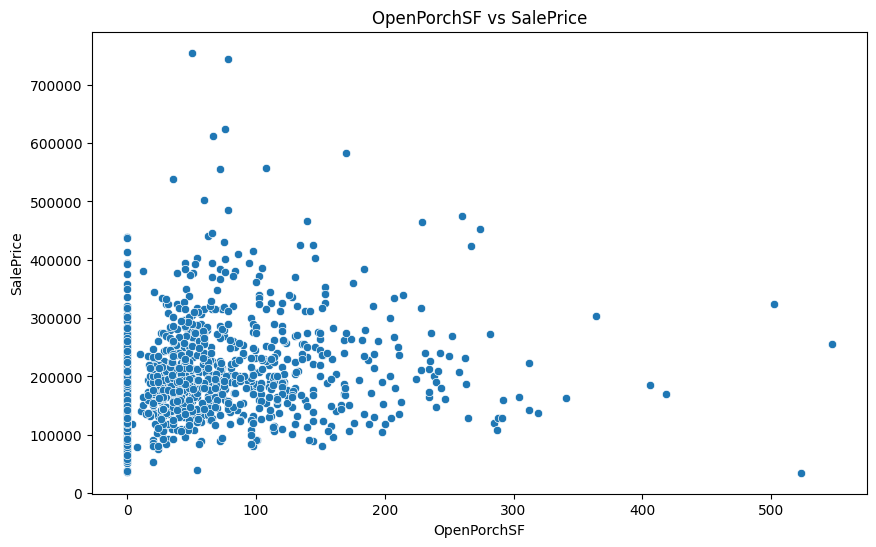

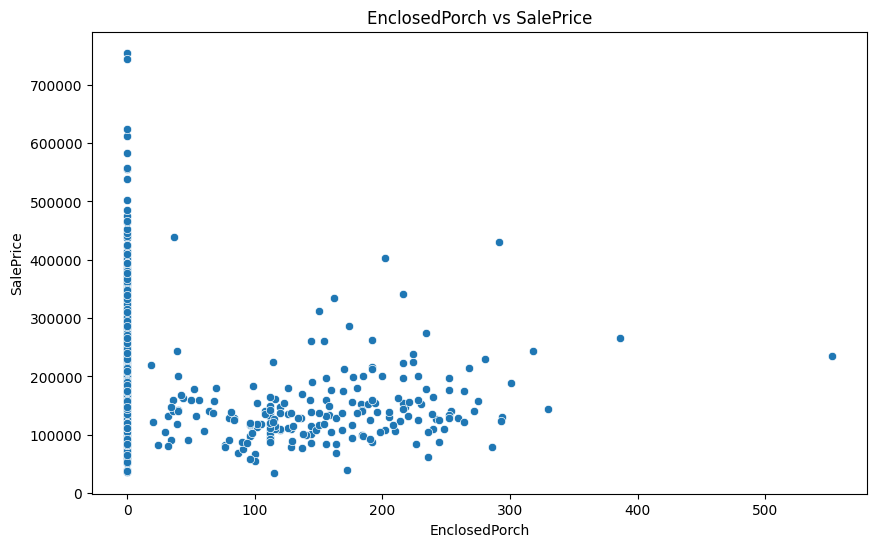

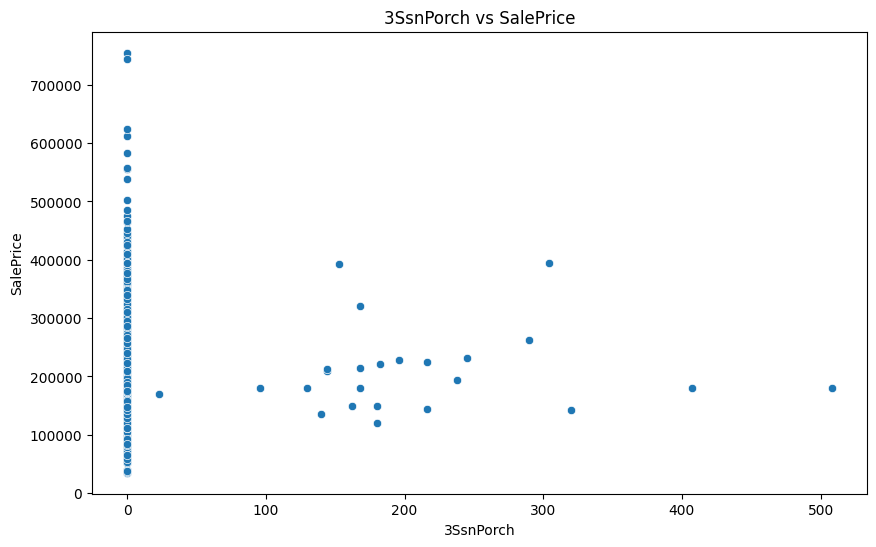

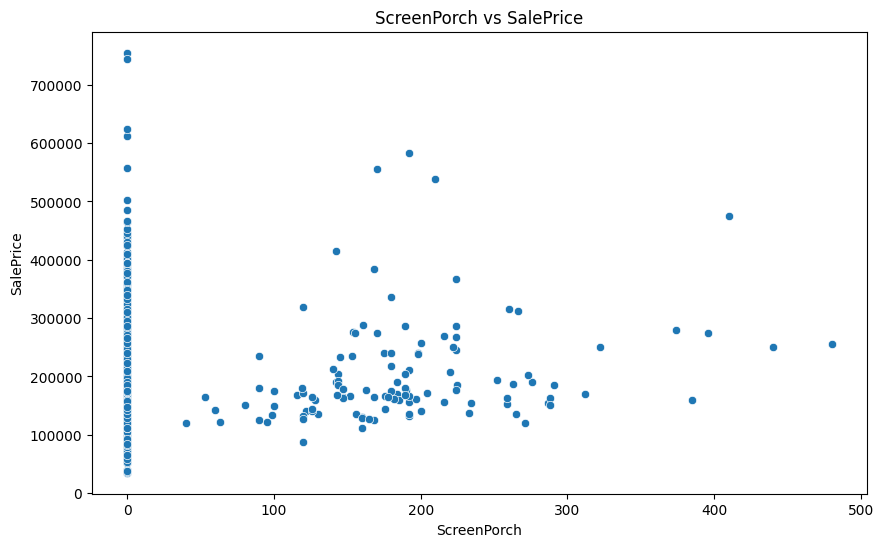

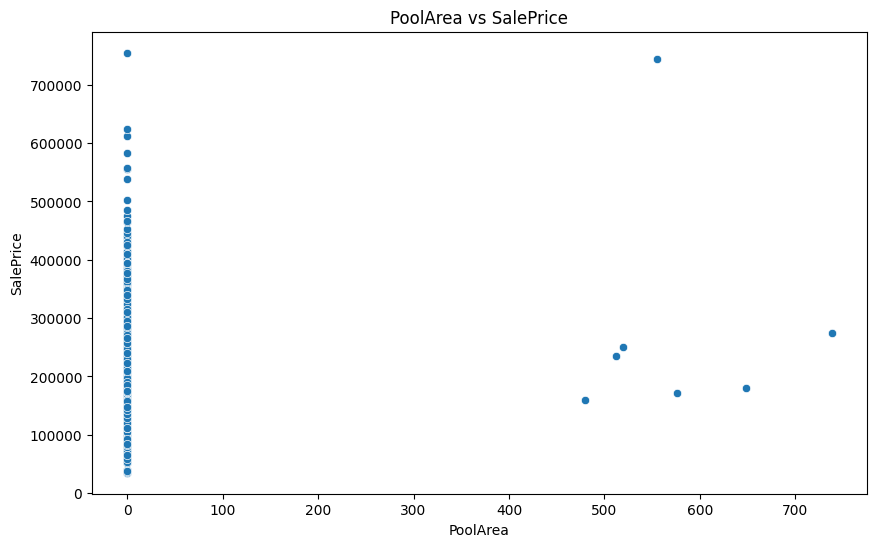

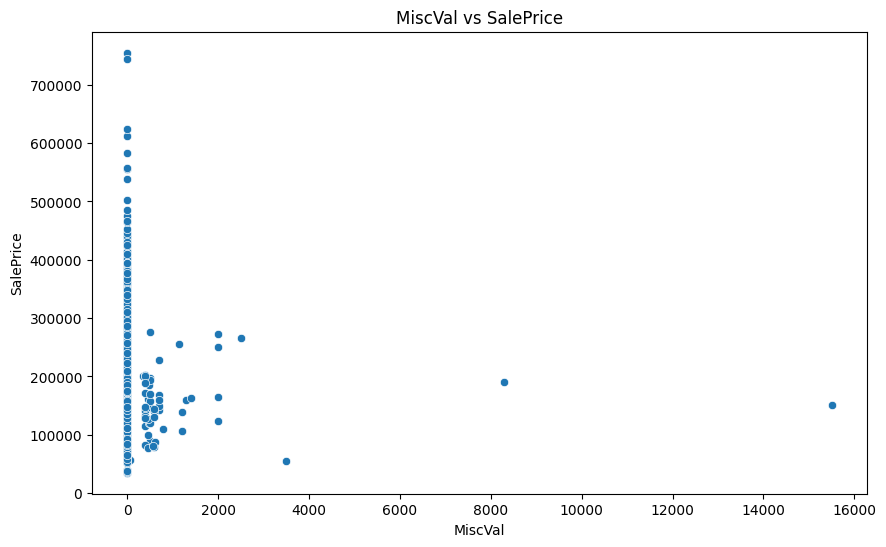

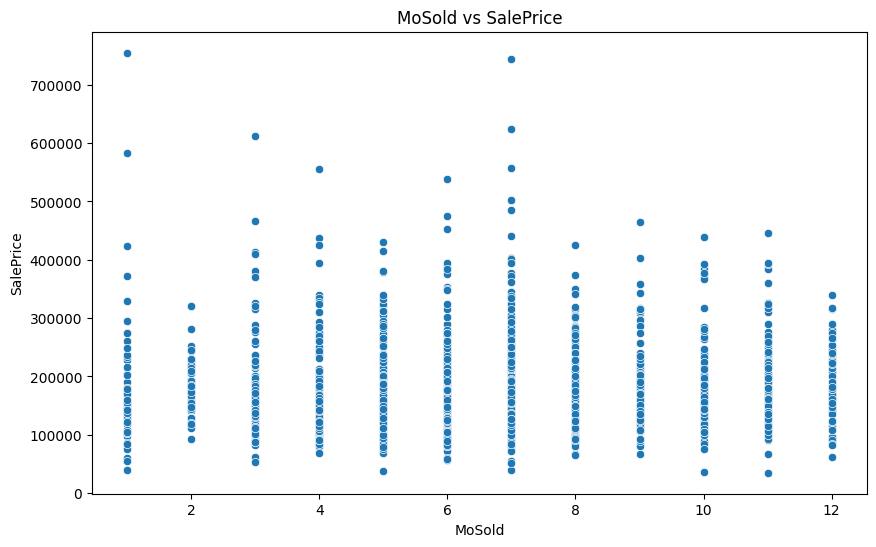

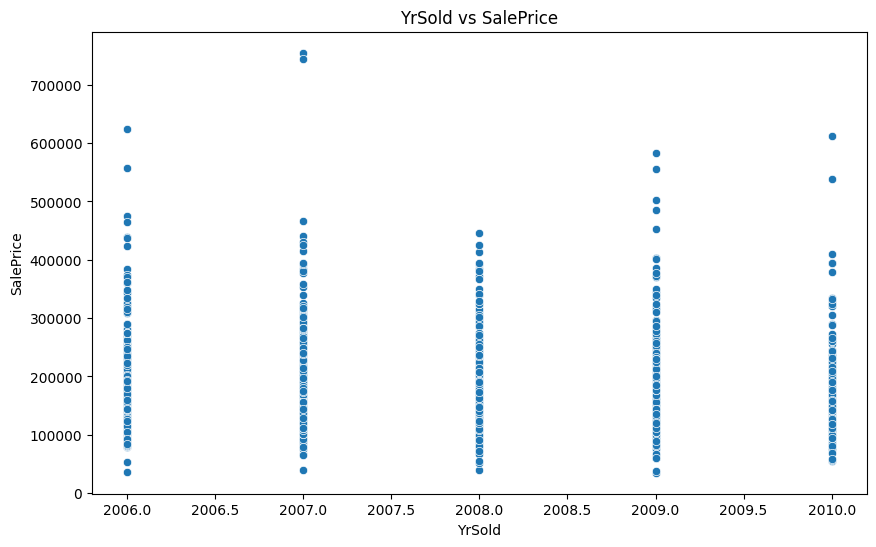

In [ ]:
# Scatter plots for all numerical features
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    if col != 'SalePrice':  # Exclude the target variable
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=train_set[col], y=train_set['SalePrice'])
        plt.title(f'{col} vs SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()


<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


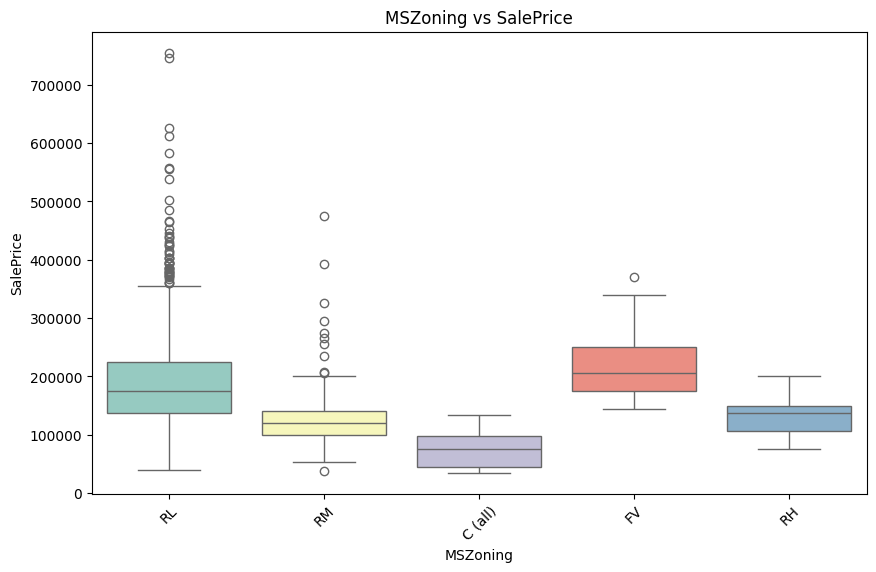

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


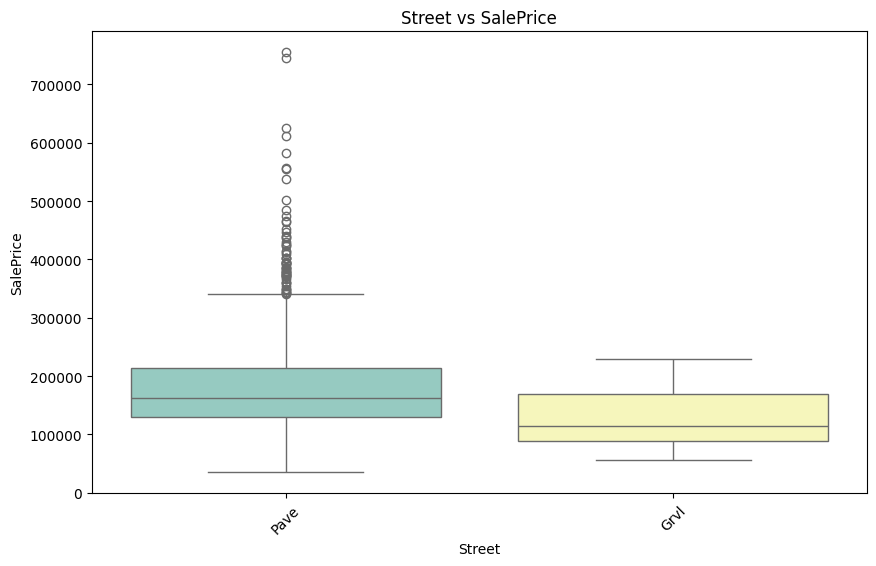

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


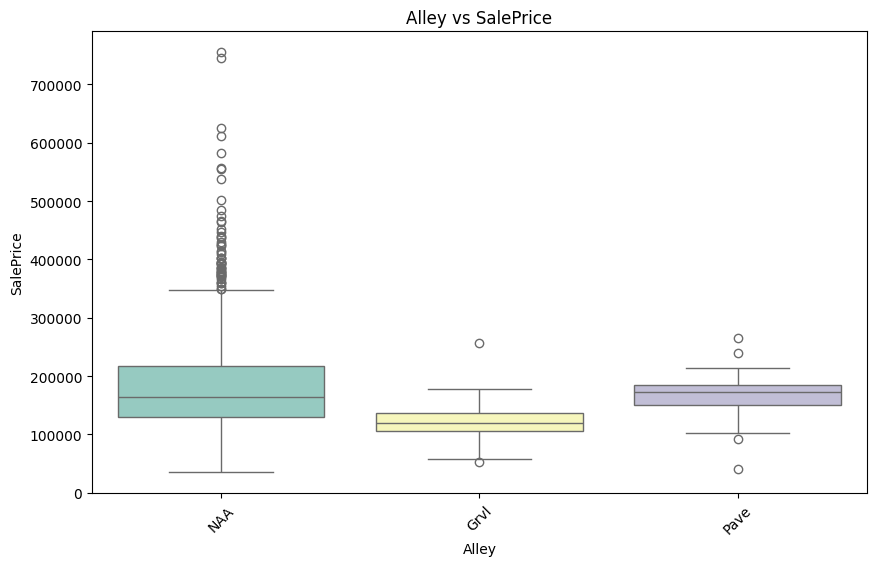

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


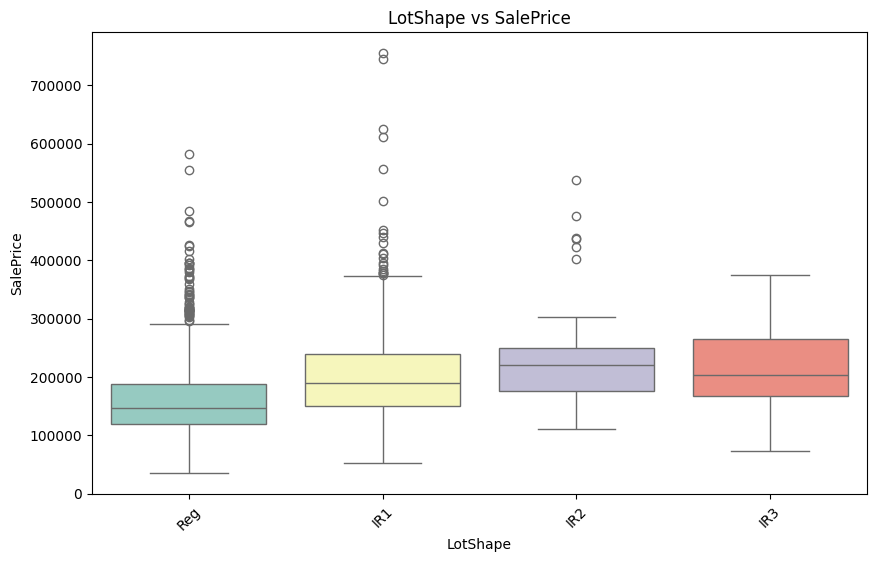

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


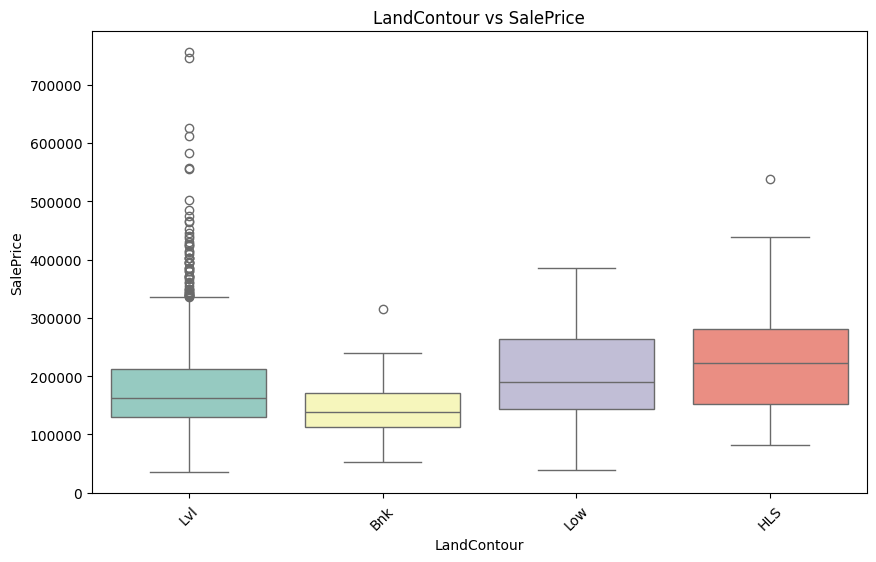

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


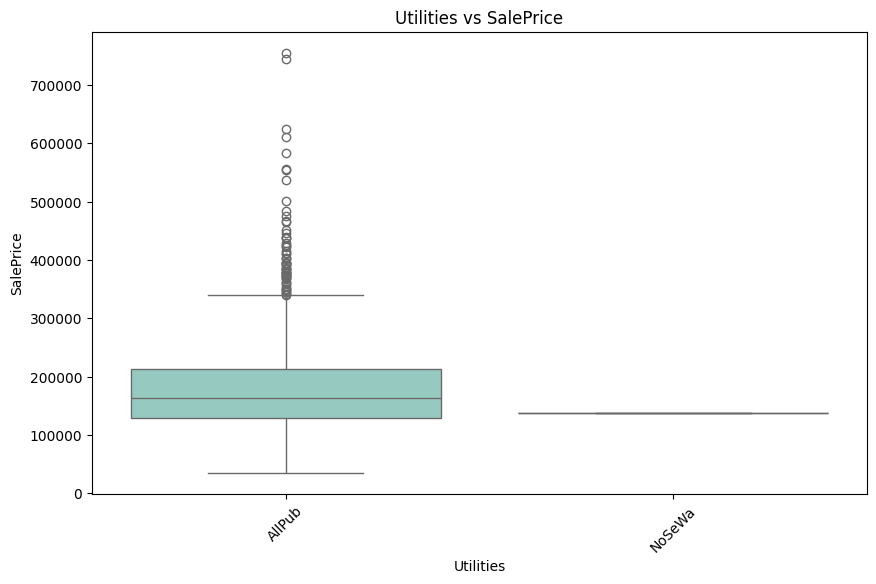

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


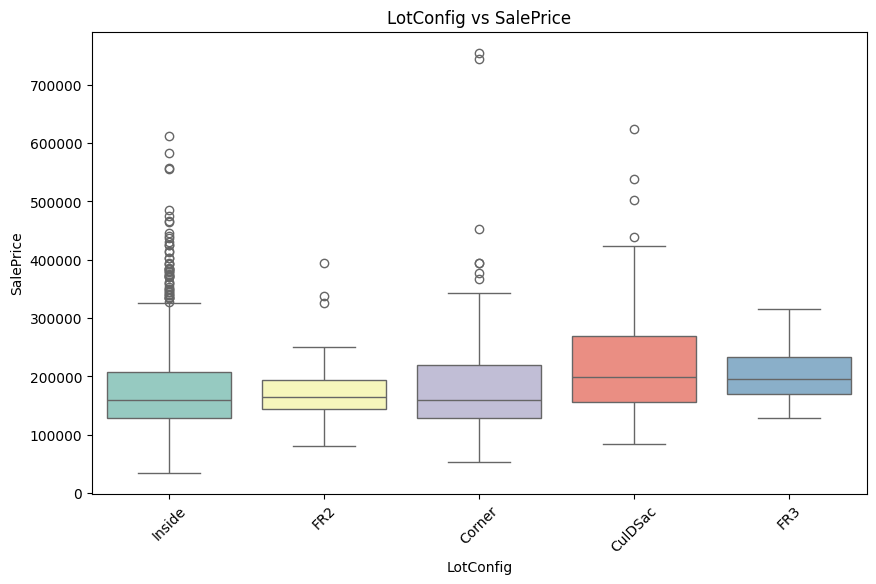

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


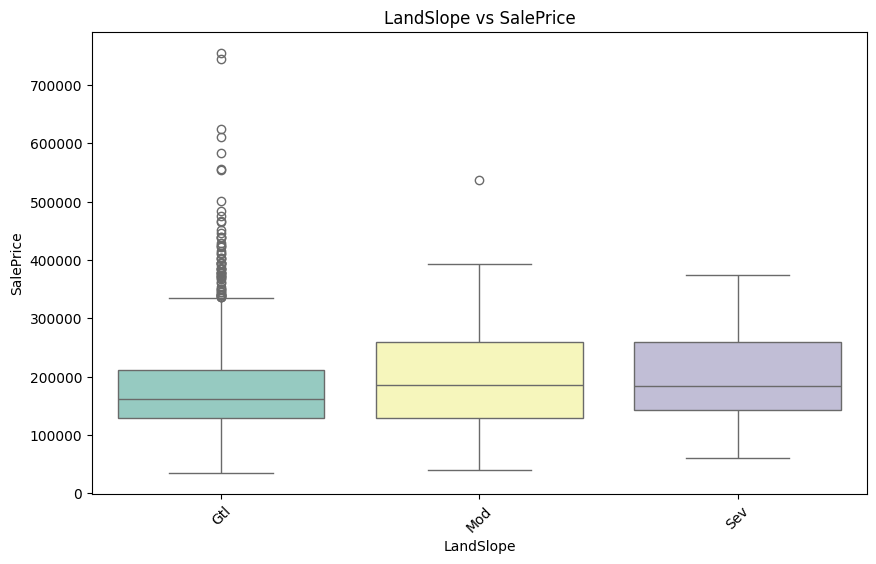

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


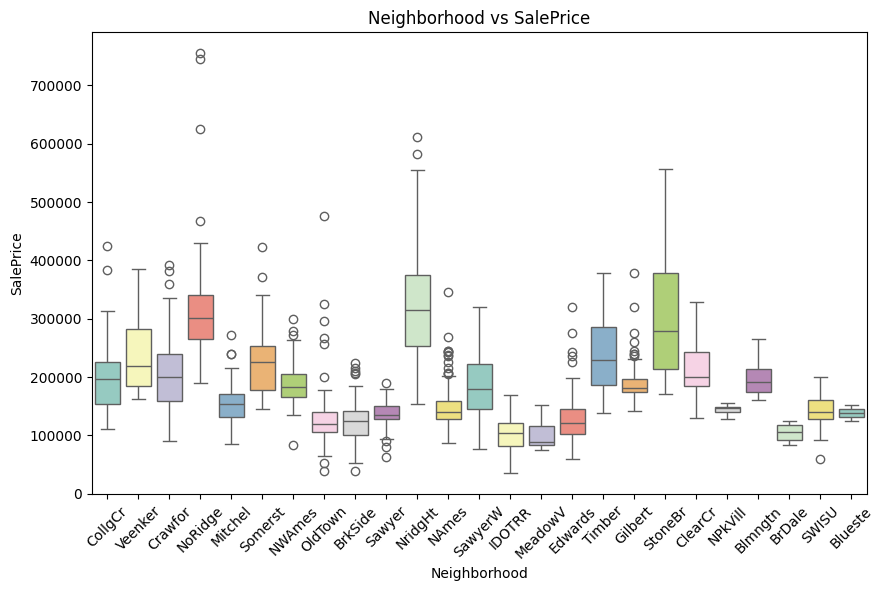

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


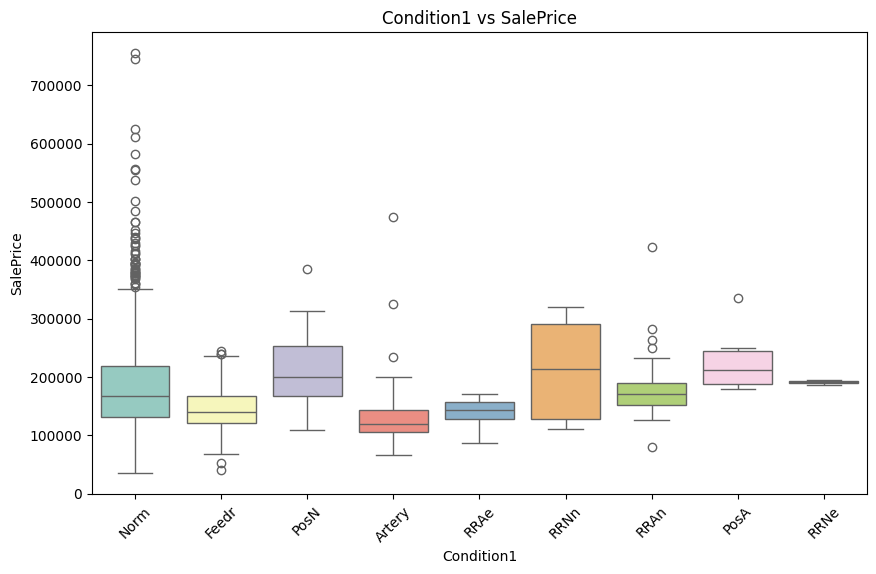

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


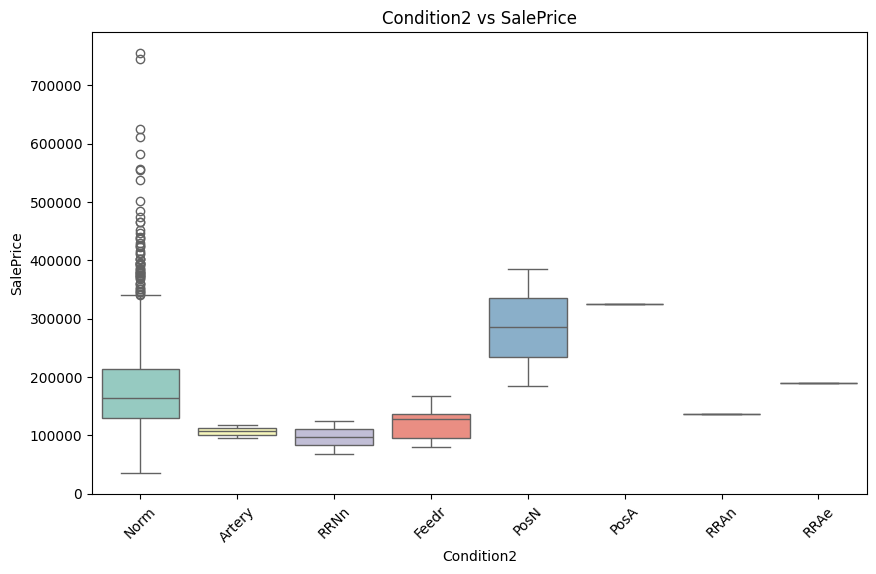

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


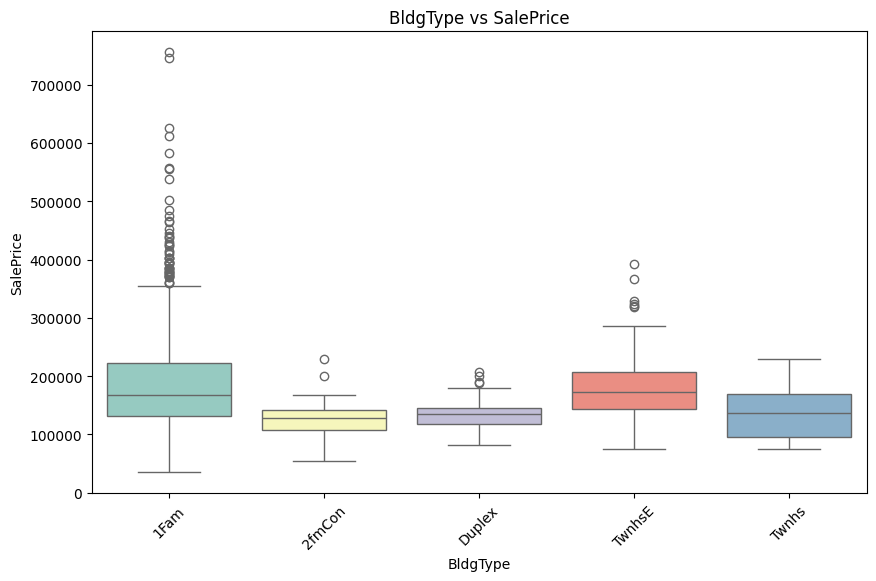

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


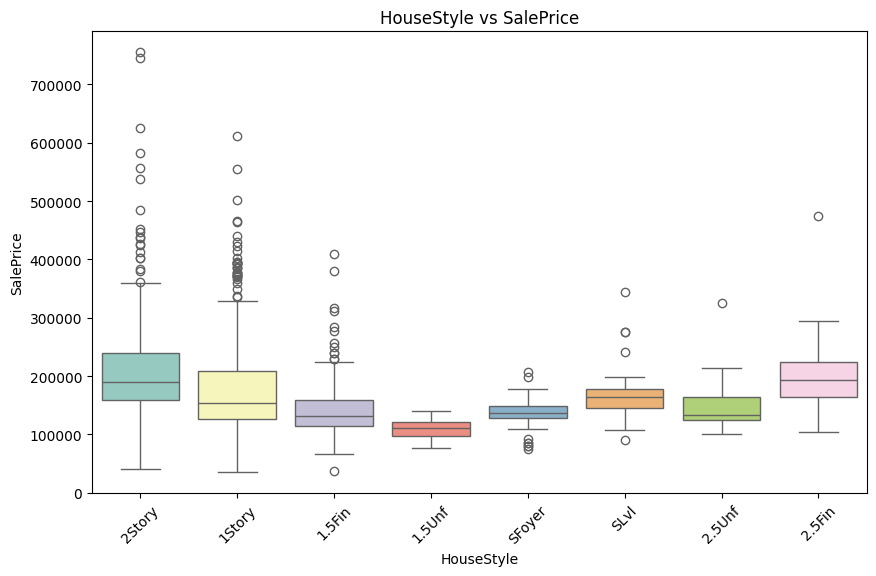

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


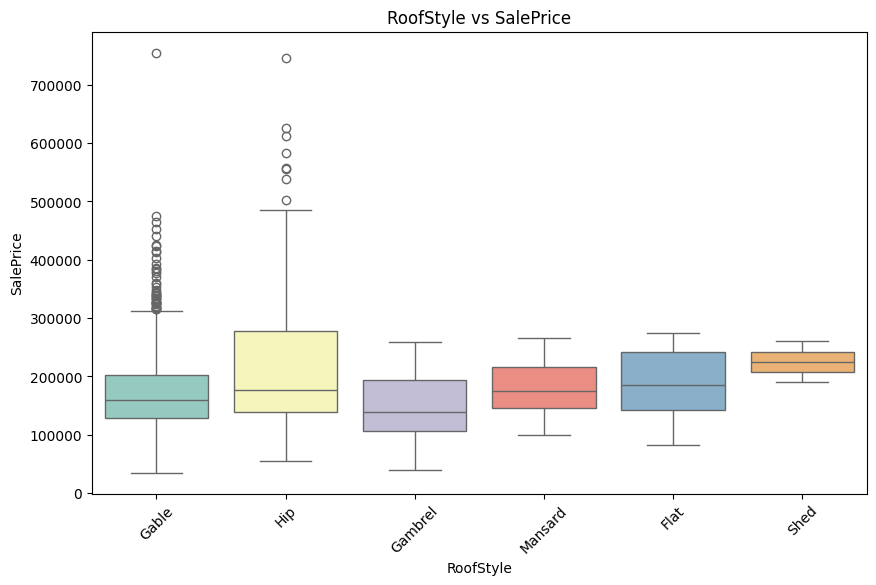

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


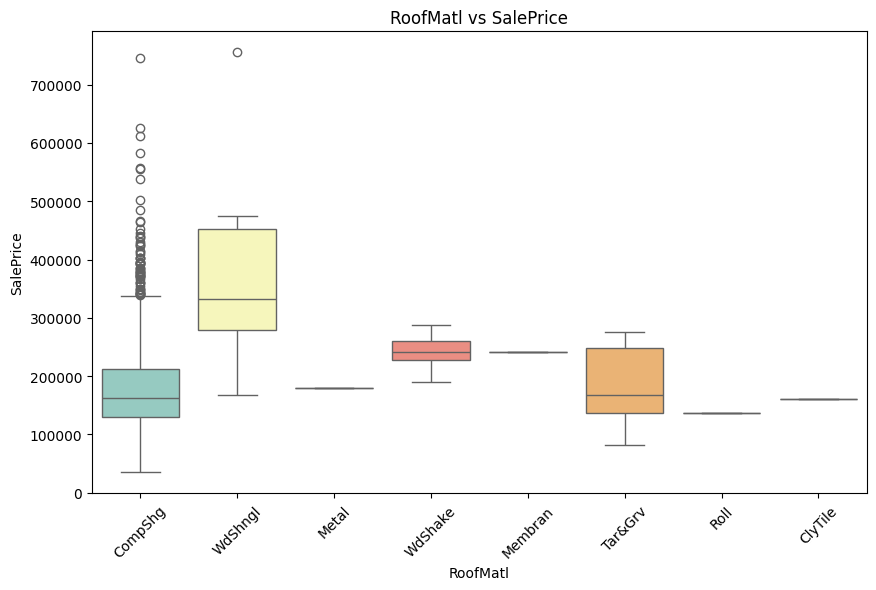

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


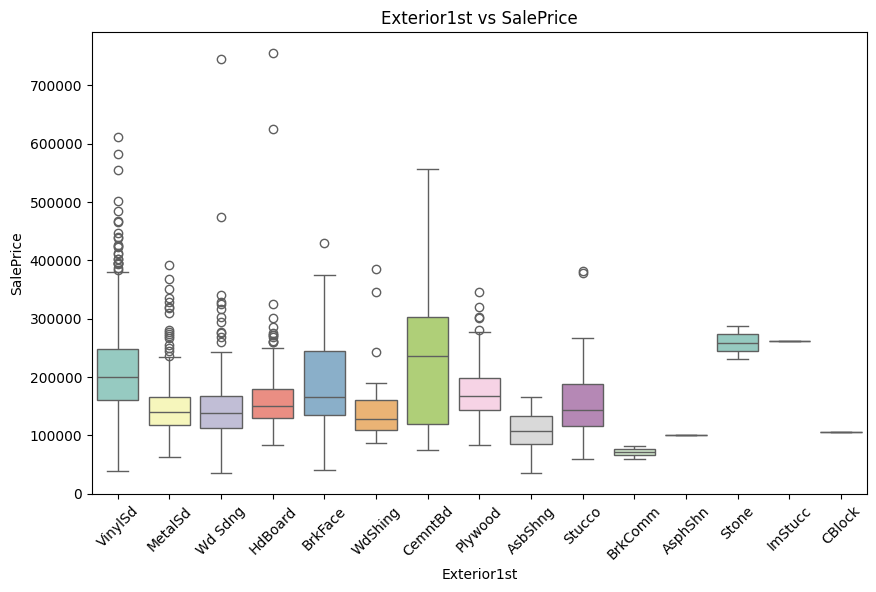

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


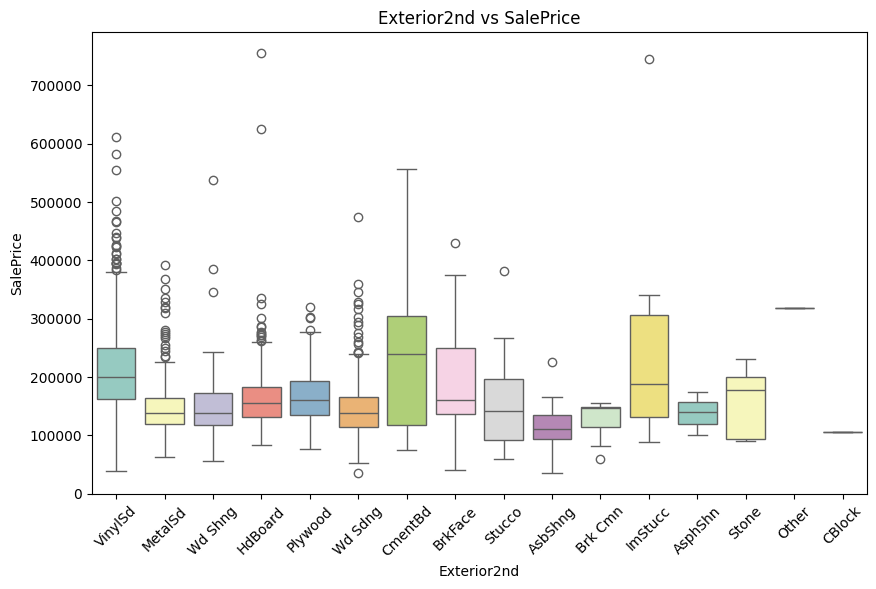

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


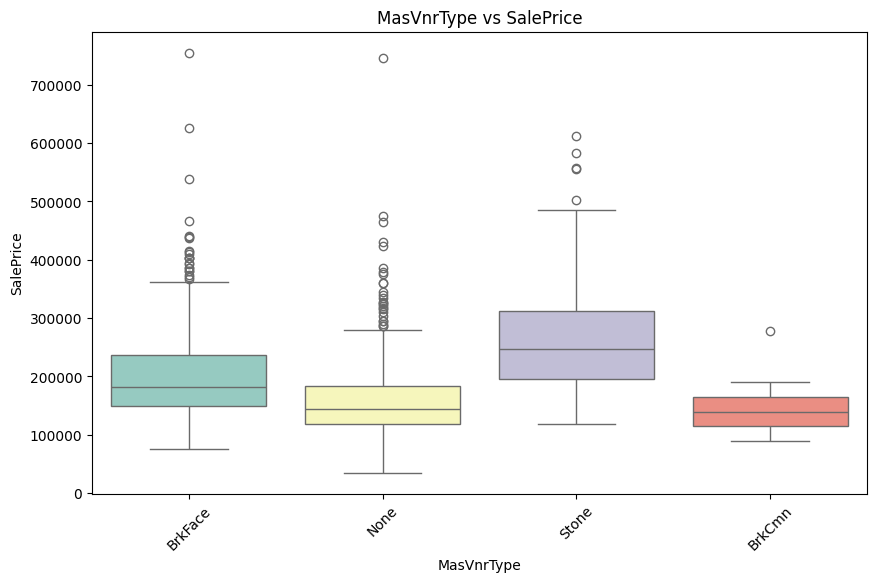

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


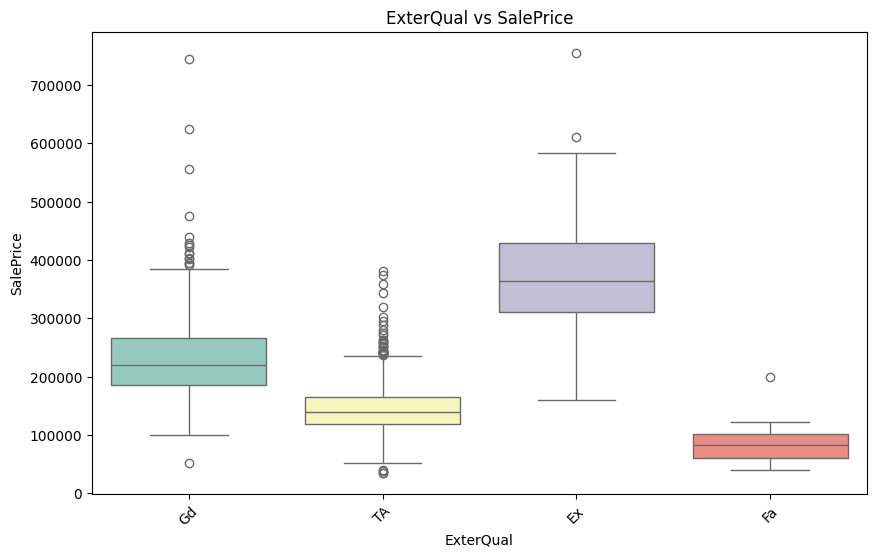

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


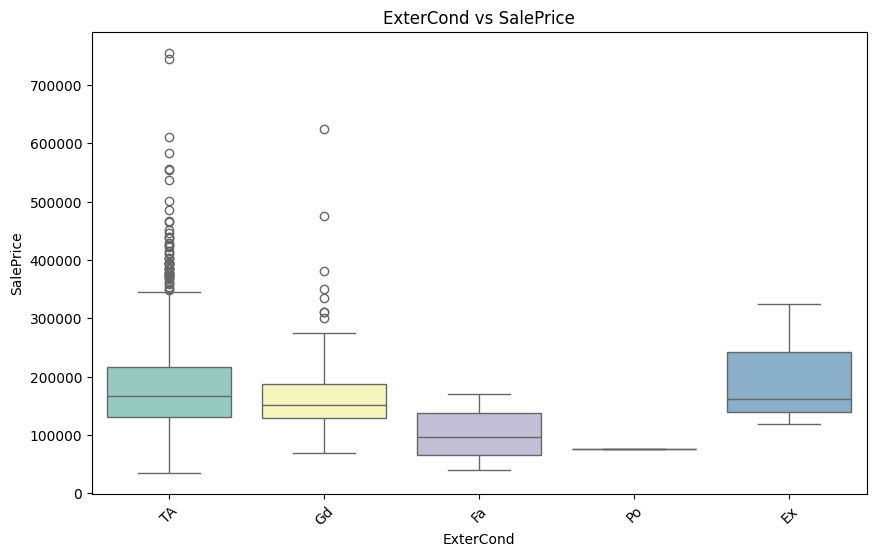

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


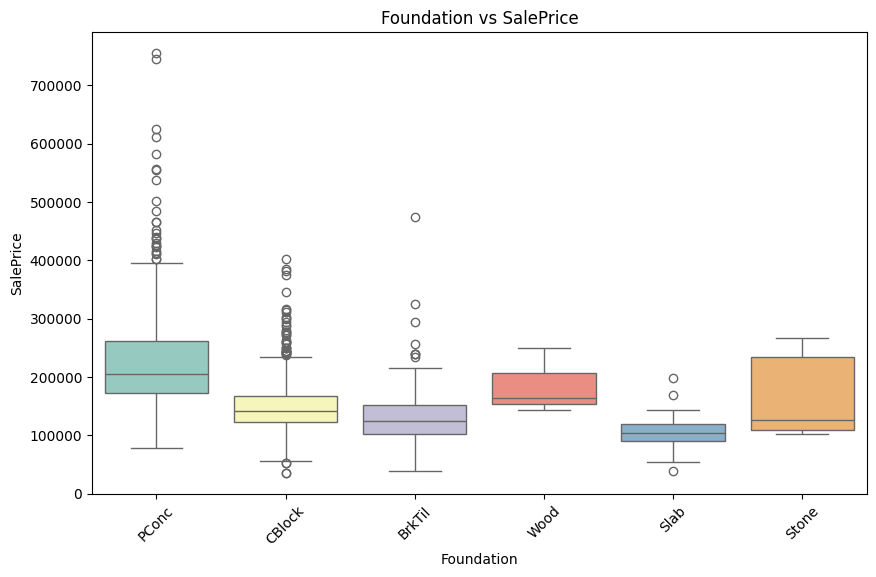

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


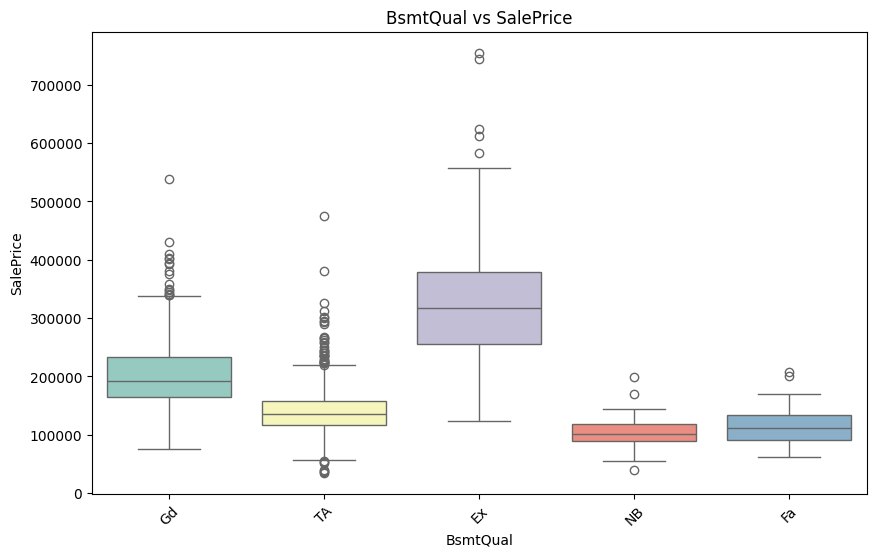

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


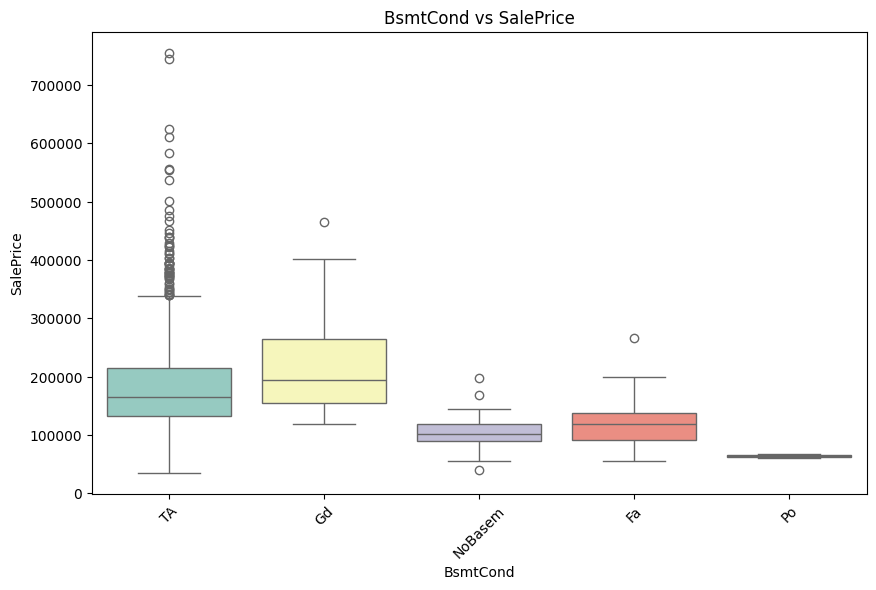

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


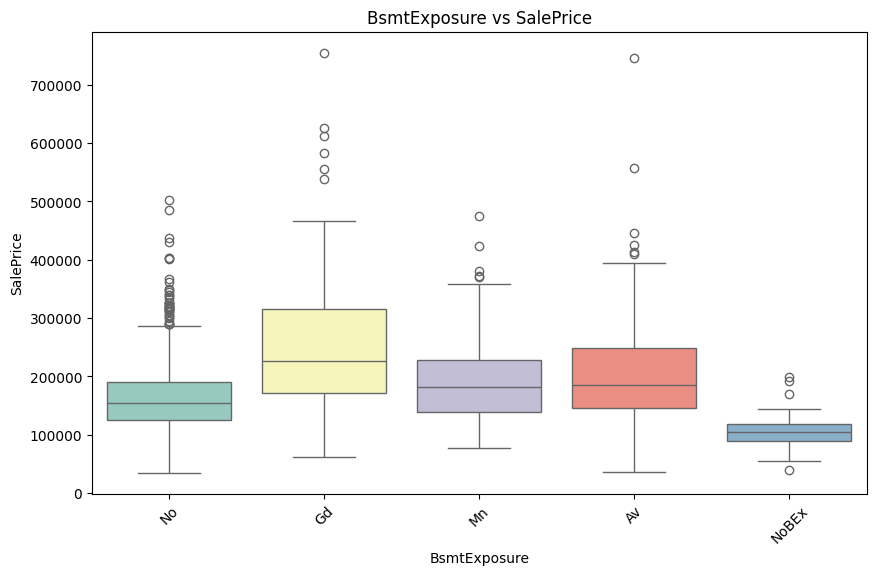

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


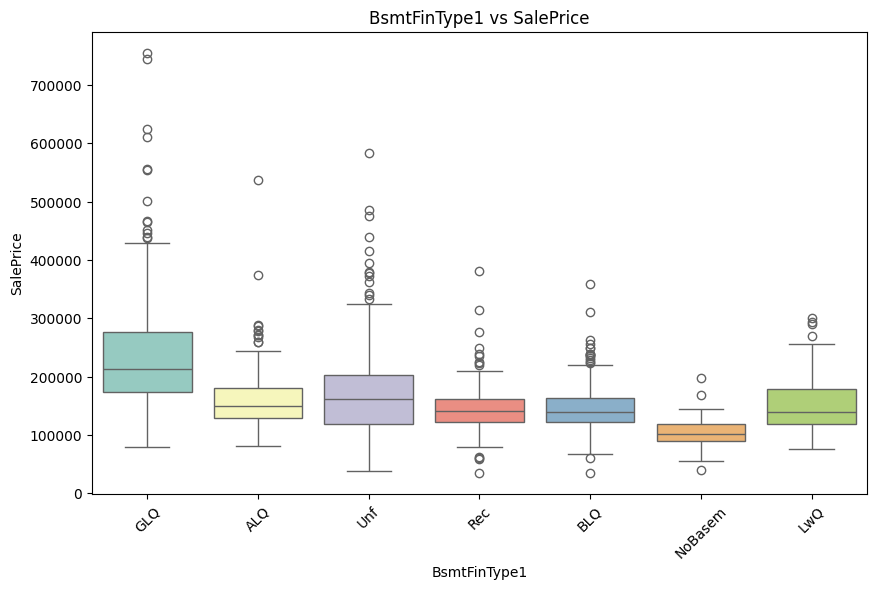

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


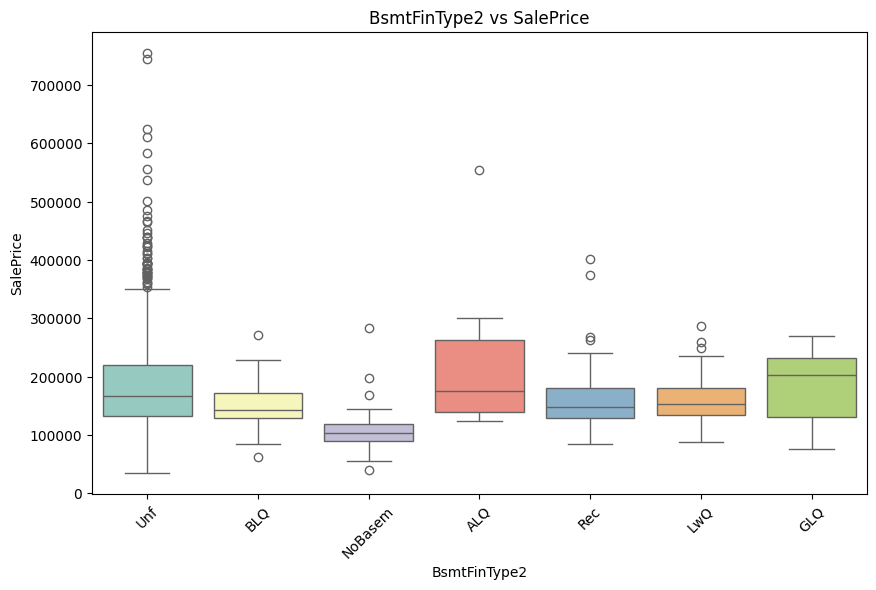

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


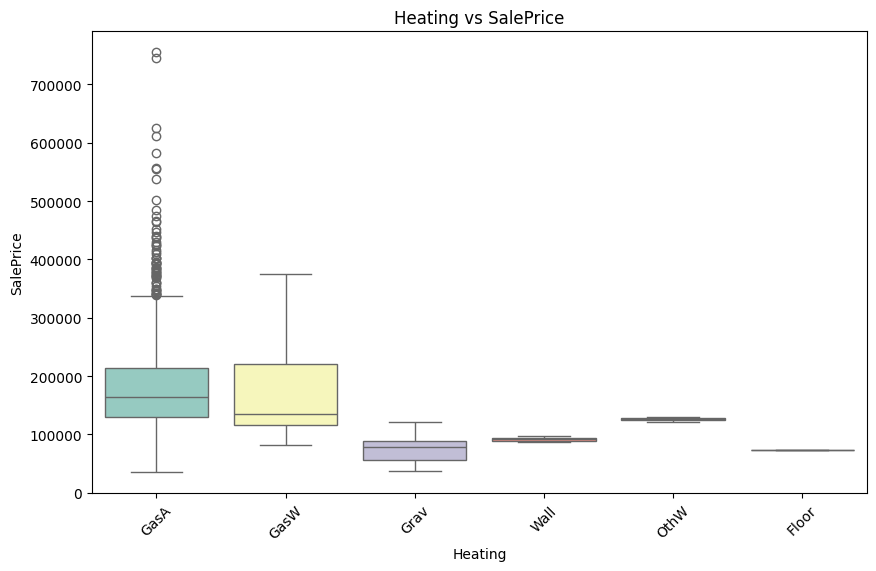

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


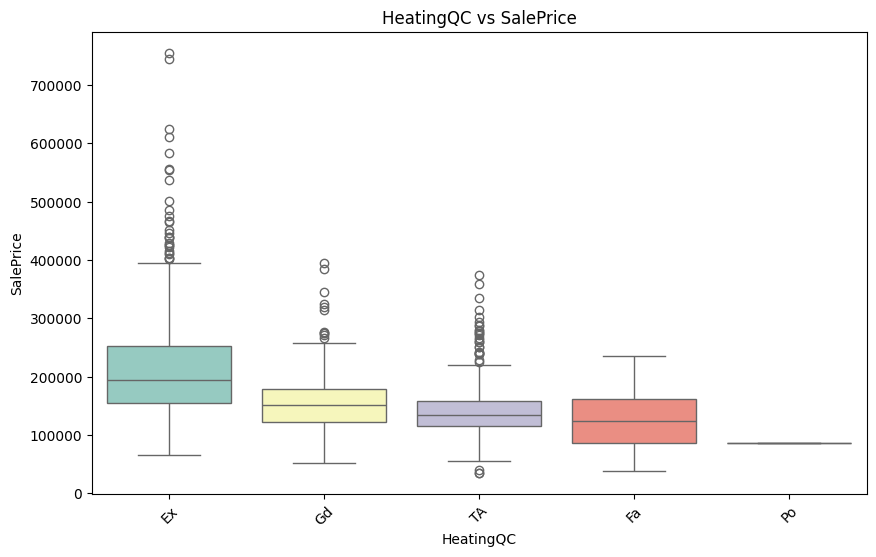

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


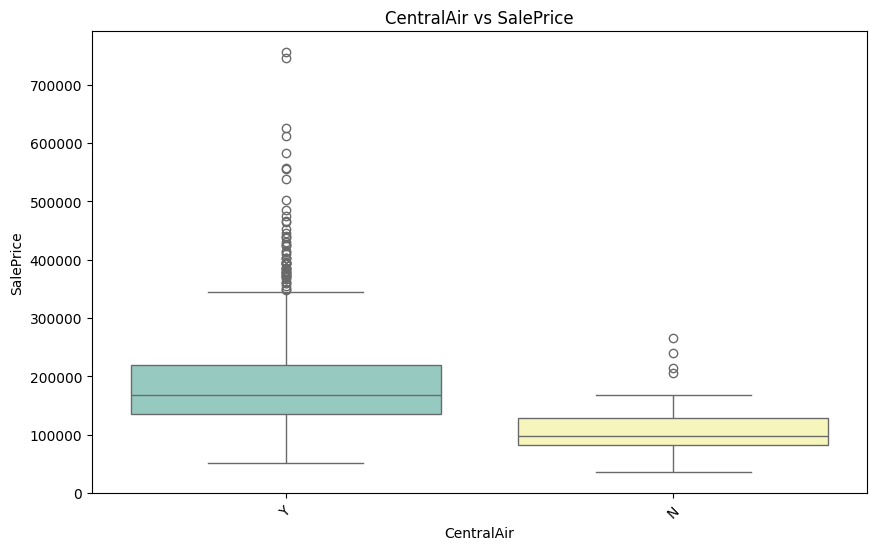

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


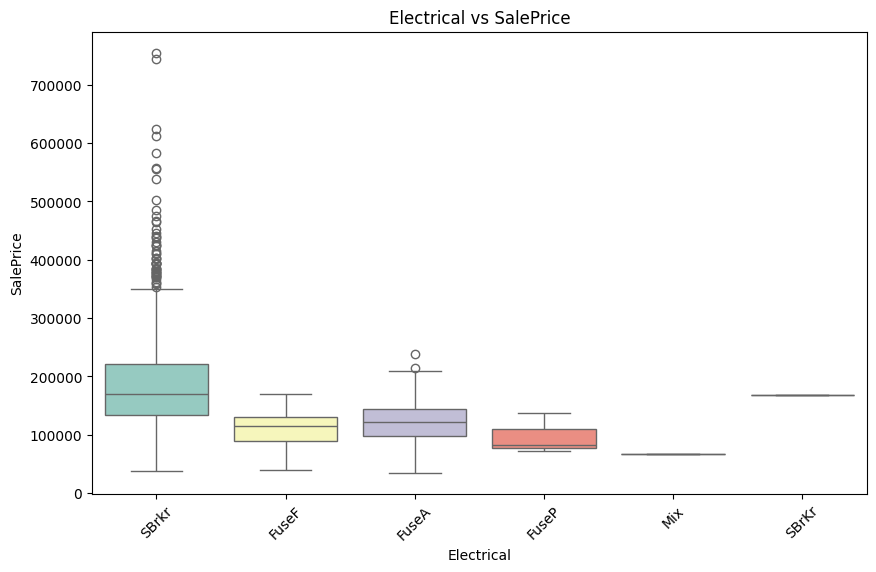

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


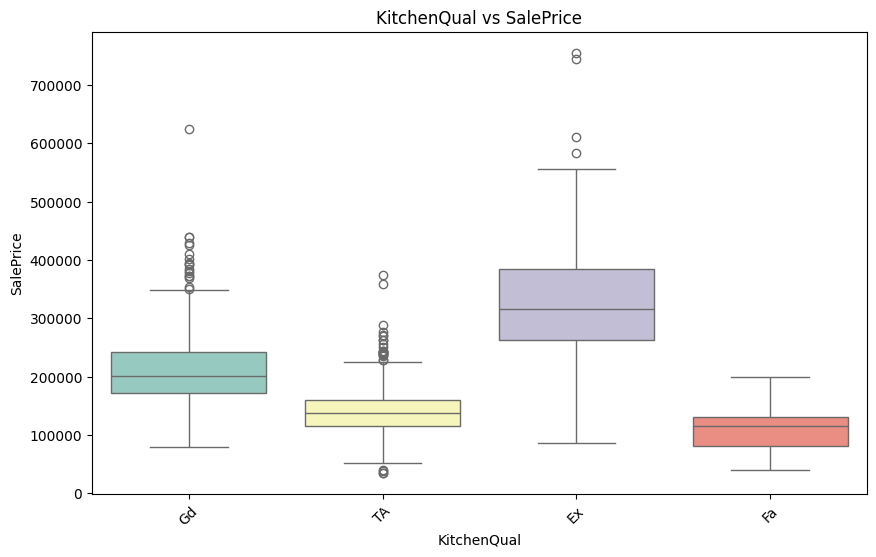

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


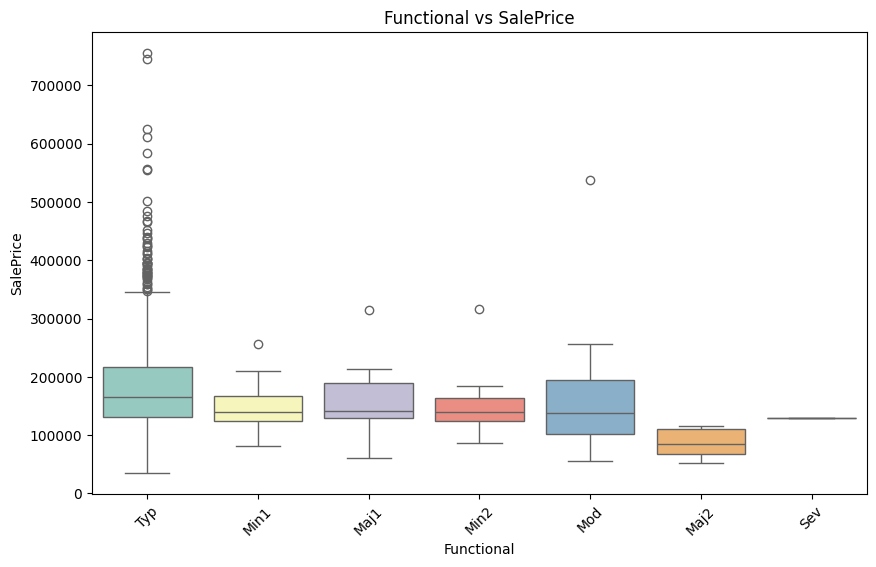

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


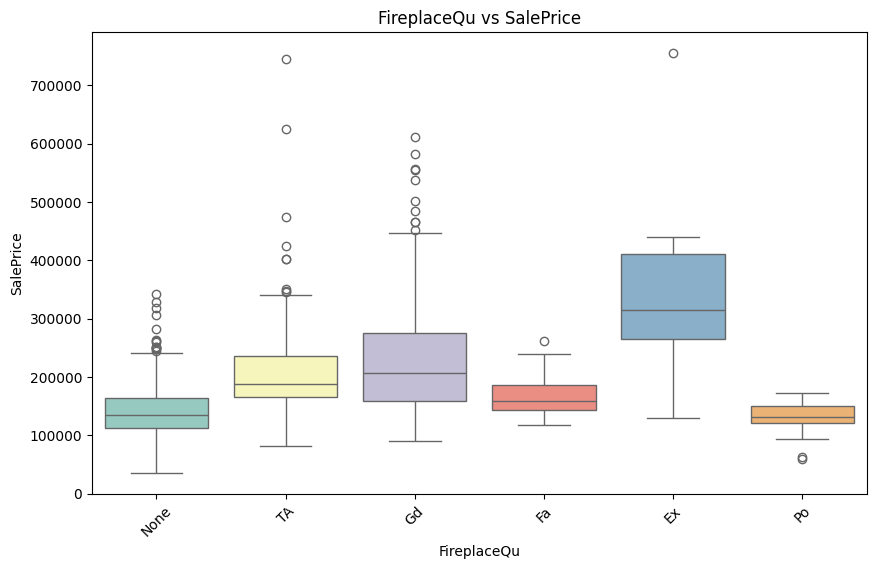

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


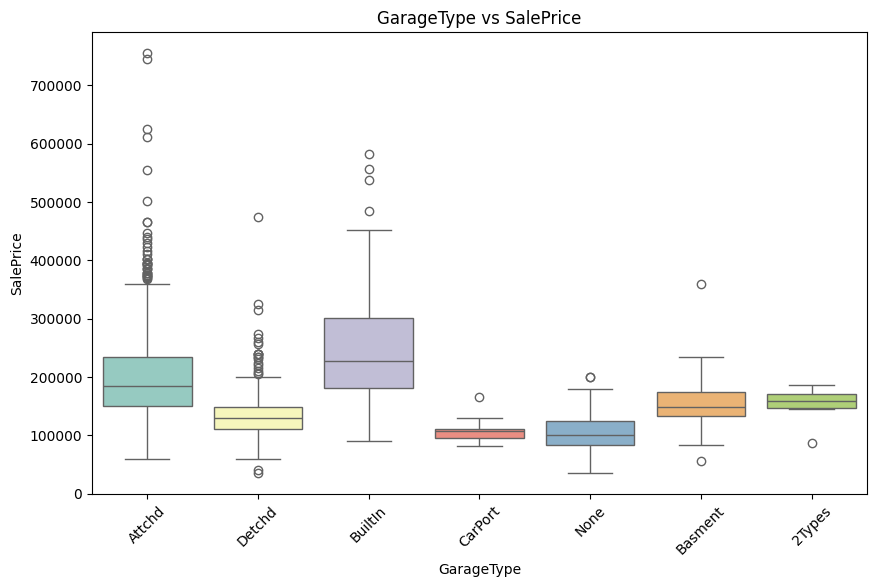

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


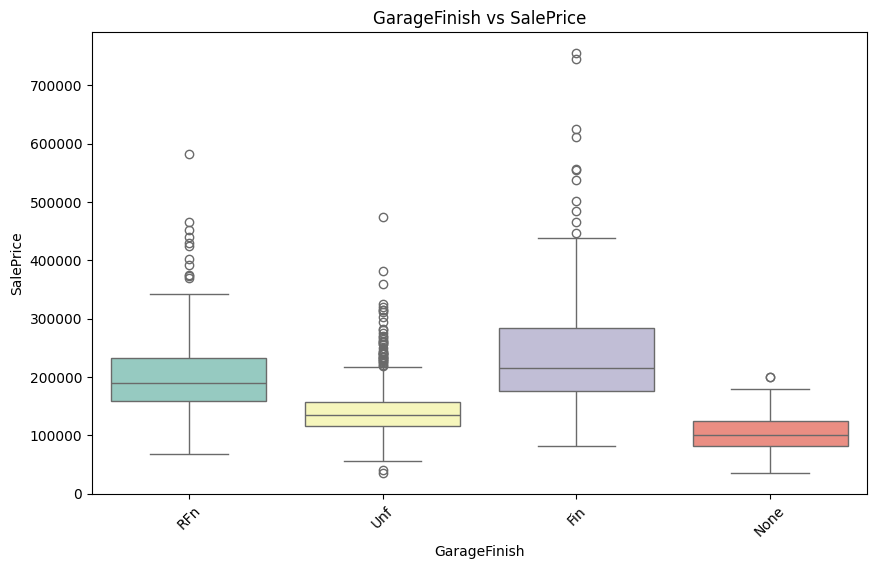

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


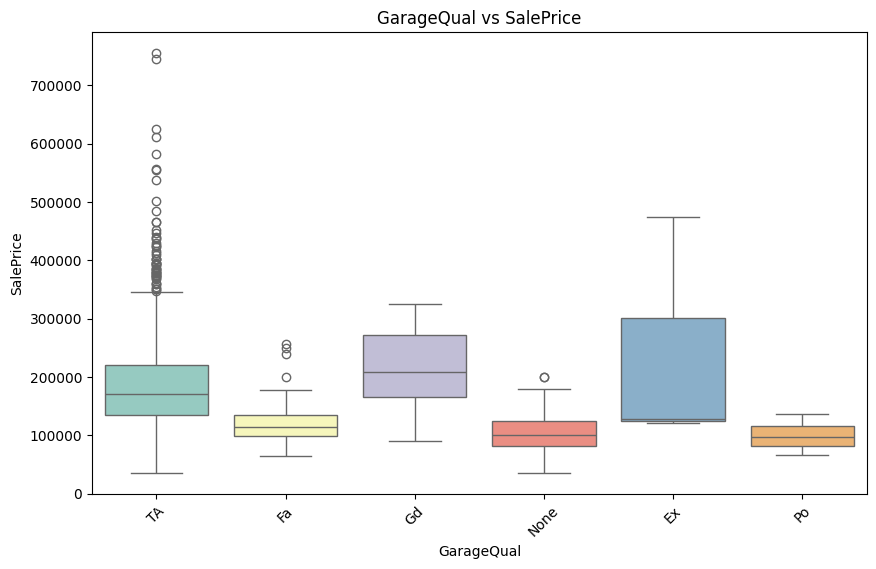

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


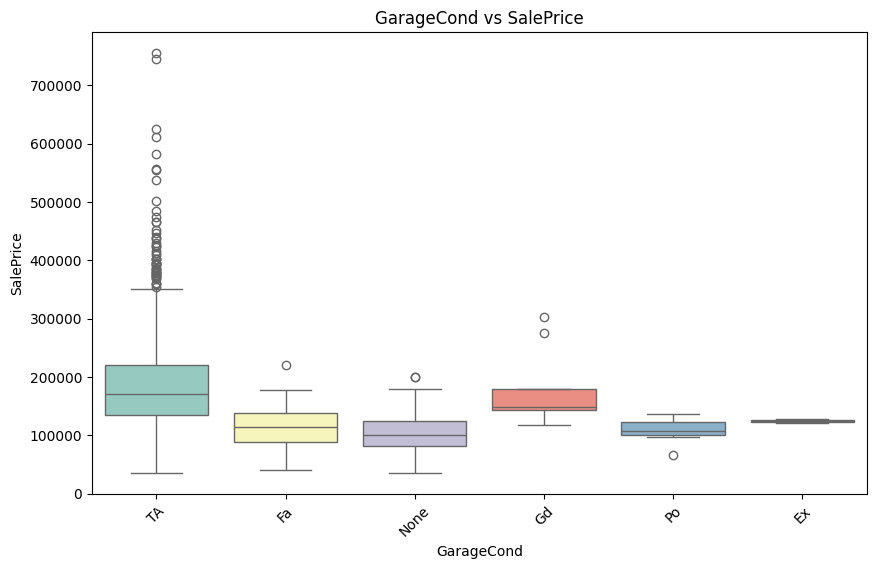

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


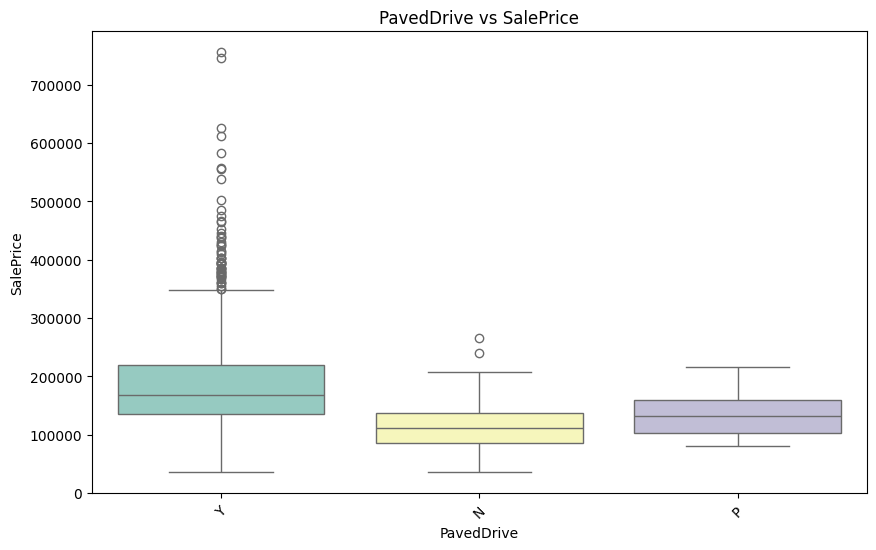

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


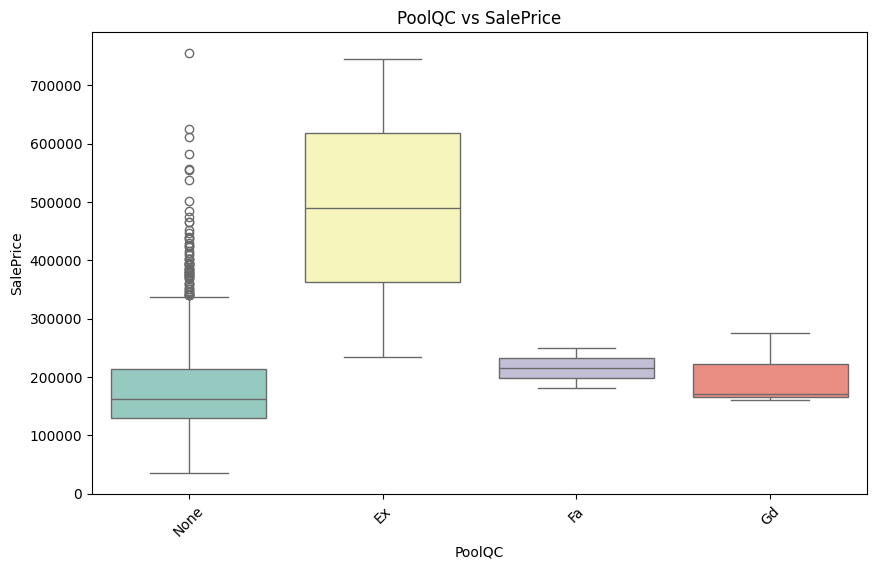

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


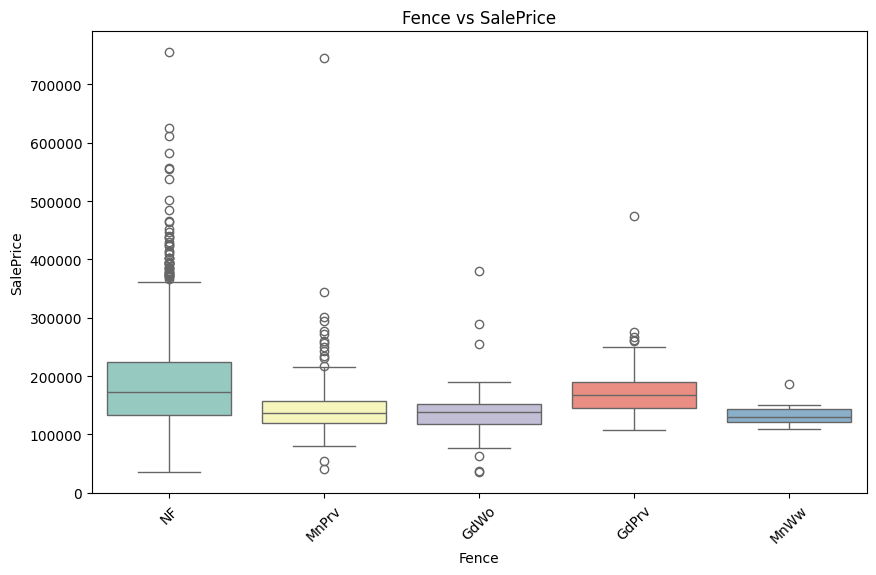

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


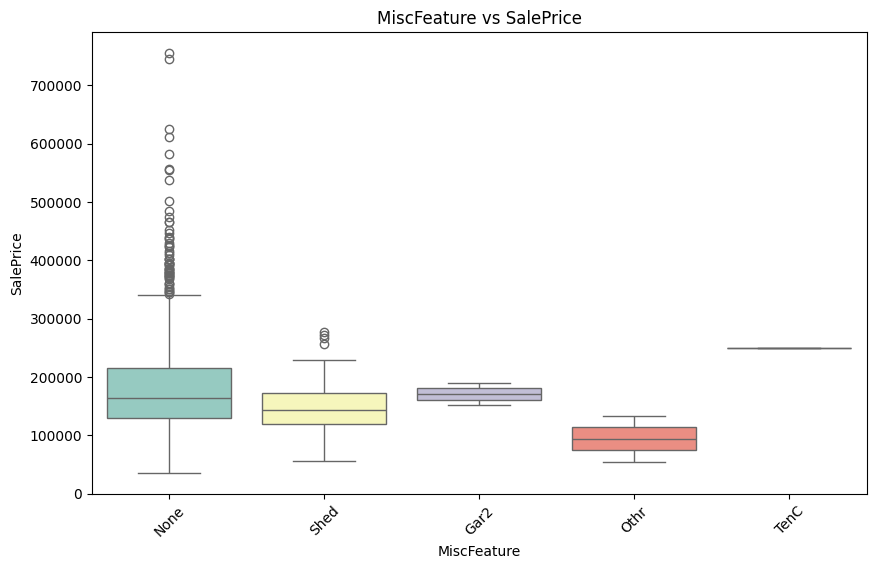

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


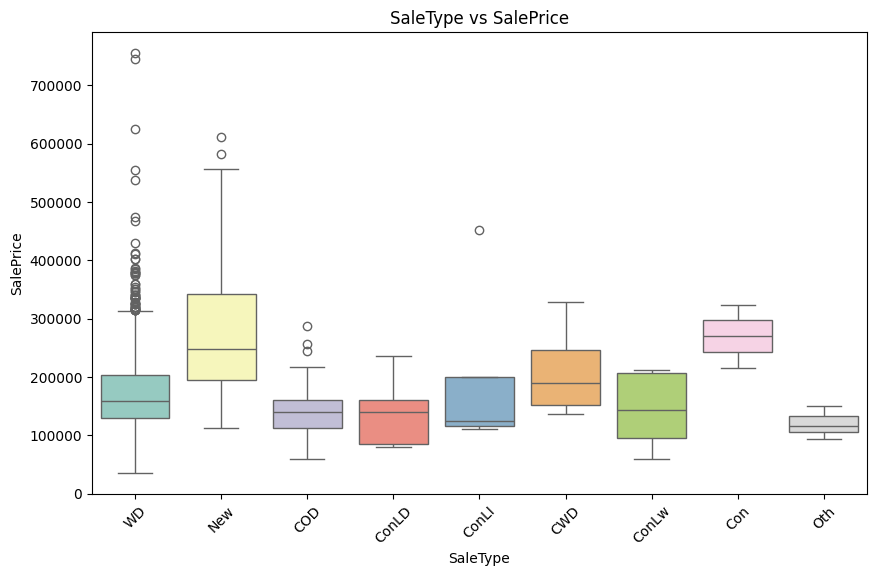

<ipython-input-84-60449f158b29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')


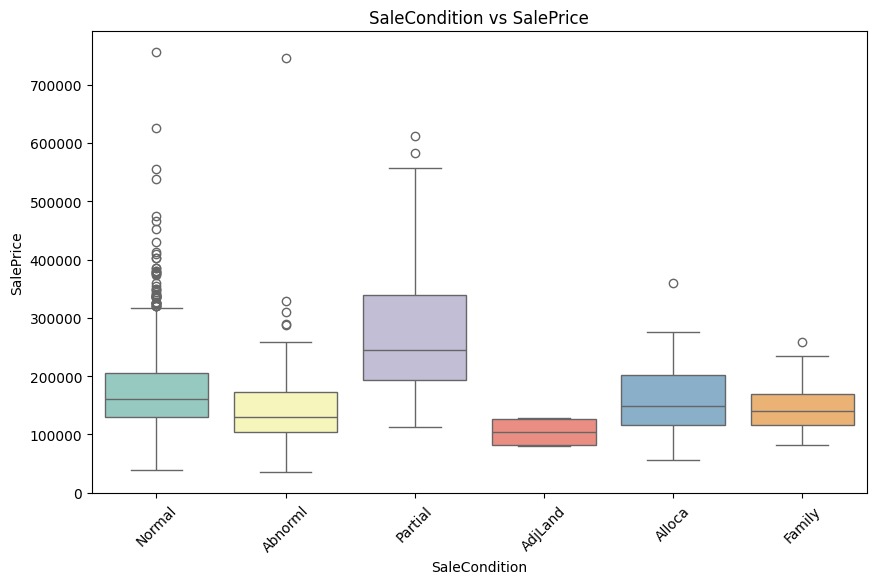

In [ ]:
# Box plots for categorical series
categorical_columns = train_set.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_set[col], y=train_set['SalePrice'], palette='Set3')
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()


# HANDLING OUTLIERS


In [ ]:
#Create a function to detect outlier
def detect_outliers(df, features):
    outliers = {}

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    return outliers


In [ ]:
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns
outliers_dict = detect_outliers(train_set, numerical_columns)

# Display the outliers found for each feature
for feature, outliers in outliers_dict.items():
    print(f"Outliers in {feature}:")
    print(outliers)
    print("\n")


Outliers in Id:
Series([], Name: Id, dtype: int64)


Outliers in MSSubClass:
9       190
48      190
56      160
75      180
87      160
       ... 
1378    160
1393    190
1416    190
1449    180
1452    180
Name: MSSubClass, Length: 103, dtype: int64


Outliers in LotFrontage:
25      110.0
35      108.0
36      112.0
41      115.0
52      110.0
        ...  
1359    129.0
1361    124.0
1364     30.0
1378     21.0
1449     21.0
Name: LotFrontage, Length: 106, dtype: float64


Outliers in LotArea:
53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64


Outliers in OverallQual:
375    1
533    1
Name: OverallQual, dtype: int64


Outliers in OverallCond:
1       8
15      8
24      8
88      2
91      3
       ..
1385    8
1397    8
1411    8
1435    9
1457    9
Name: OverallCond, Length: 125, dtype: int64


Outliers in YearBuilt:
304     1880
630  

# CAPPING OUTLIER TO ENHANCE IMPROVE PERFORMANCE OF MODEL

In [ ]:
def cap_outliers(df, outliers_dict):
    for feature in outliers_dict.keys():
        # Skip the SalePrice column
        if feature == 'SalePrice':
            print(f"Skipping outlier capping for SalePrice column.")
            continue

        # Convert to numeric, forcing errors to NaN
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

        # Only apply to numeric columns
        if pd.api.types.is_numeric_dtype(df[feature]):
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers
            df[feature] = df[feature].clip(lower_bound, upper_bound)
        else:
            print(f"Skipping non-numeric column: {feature}")

    return df

# Cap outliers in the dataset
test_set_cleaned = cap_outliers(test_set.copy(), outliers_dict)
train_set_cleaned = cap_outliers(train_set.copy(), outliers_dict)



Skipping outlier capping for SalePrice column.
Skipping outlier capping for SalePrice column.


In [ ]:
test_set_cleaned.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0  11622.0   Pave   NAA      Reg   
1  1462          20       RL         81.0  14267.0   Pave   NAA      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   None  MnPrv        None   
1         Lvl    AllPub  ...           0        0   None     NF        Gar2   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1       0      6    2010        WD         Normal  

[2 rows x 80 columns]

**Phase 3: Feature Engineering**

In [ ]:

# Convert columns to numeric, forcing errors to NaN
train_set_cleaned['YrSold'] = pd.to_numeric(train_set_cleaned['YrSold'], errors='coerce')
train_set_cleaned['YearBuilt'] = pd.to_numeric(train_set_cleaned['YearBuilt'], errors='coerce')

# Drop rows where 'YrSold' or 'YearBuilt' are NaN
train_set_cleaned = train_set_cleaned.dropna(subset=['YrSold', 'YearBuilt'])

# Calculate the new feature
train_set_cleaned['HouseAge'] = train_set_cleaned['YrSold'] - train_set_cleaned['YearBuilt']

# Display the first few rows of the new feature
print(train_set_cleaned[['YrSold', 'YearBuilt', 'HouseAge']].head())


   YrSold  YearBuilt  HouseAge
0    2008       2003         5
1    2007       1976        31
2    2008       2001         7
3    2006       1915        91
4    2008       2000         8


In [ ]:

# Convert columns to numeric, forcing errors to NaN
test_set_cleaned['YrSold'] = pd.to_numeric(test_set_cleaned['YrSold'], errors='coerce')
test_set_cleaned['YearBuilt'] = pd.to_numeric(test_set_cleaned['YearBuilt'], errors='coerce')

# Drop rows where 'YrSold' or 'YearBuilt' are NaN
test_set_cleaned = test_set_cleaned.dropna(subset=['YrSold', 'YearBuilt'])

# Calculate the new feature
test_set_cleaned['HouseAge'] = test_set_cleaned['YrSold'] - test_set_cleaned['YearBuilt']

# Display the first few rows of the new feature
print(test_set_cleaned[['YrSold', 'YearBuilt', 'HouseAge']].head())


   YrSold  YearBuilt  HouseAge
0    2010       1961        49
1    2010       1958        52
2    2010       1997        13
3    2010       1998        12
4    2010       1992        18


In [ ]:
# Convert columns to numeric, forcing errors to NaN
test_set_cleaned['YrSold'] = pd.to_numeric(test_set_cleaned['YrSold'], errors='coerce')
test_set_cleaned['YearBuilt'] = pd.to_numeric(test_set_cleaned['YearBuilt'], errors='coerce')

# Drop rows where 'YrSold' or 'YearBuilt' are NaN
test_set_cleaned = test_set_cleaned.dropna(subset=['YrSold', 'YearBuilt'])

# Calculate the new feature
test_set_cleaned['HouseAge'] = test_set_cleaned['YrSold'] - test_set_cleaned['YearBuilt']

# Display the first few rows of the new feature
print(test_set_cleaned[['YrSold', 'YearBuilt', 'HouseAge']].head())


   YrSold  YearBuilt  HouseAge
0    2010       1961        49
1    2010       1958        52
2    2010       1997        13
3    2010       1998        12
4    2010       1992        18


In [ ]:
# Convert columns to numeric, forcing errors to NaN
train_set_cleaned['YrSold'] = pd.to_numeric(train_set_cleaned['YrSold'], errors='coerce')
train_set_cleaned['YearBuilt'] = pd.to_numeric(train_set_cleaned['YearBuilt'], errors='coerce')

# Drop rows where 'YrSold' or 'YearBuilt' are NaN
train_set_cleaned = train_set_cleaned.dropna(subset=['YrSold', 'YearBuilt'])

# Calculate the new feature
train_set_cleaned['HouseAge'] = train_set_cleaned['YrSold'] - train_set_cleaned['YearBuilt']

# Display the first few rows of the new feature
print(train_set_cleaned[['YrSold', 'YearBuilt', 'HouseAge']].head())


   YrSold  YearBuilt  HouseAge
0    2008       2003         5
1    2007       1976        31
2    2008       2001         7
3    2006       1915        91
4    2008       2000         8


In [ ]:
train_set_cleaned['TotalLivingArea'] = train_set_cleaned['GrLivArea'] + train_set_cleaned['TotalBsmtSF']
print(train_set_cleaned[['TotalLivingArea']].head())


   TotalLivingArea
0           2566.0
1           2524.0
2           2706.0
3           2473.0
4           3343.0


In [ ]:
test_set_cleaned['TotalLivingArea'] = test_set_cleaned['GrLivArea'] + test_set_cleaned['TotalBsmtSF']
print(test_set_cleaned[['TotalLivingArea']].head())


   TotalLivingArea
0           1778.0
1           2658.0
2           2557.0
3           2530.0
4           2560.0


In [ ]:
train_set_cleaned['HasPool'] = train_set_cleaned['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_set_cleaned['HasPool'] = test_set_cleaned['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:


# Encode categorical features with ordinal encoding for basement quality and condition
quality_mapping = {
    'NB': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}

condition_mapping = {
    'NoBasem': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}

exposure_mapping = {
    'NoBEx': 0, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1
}

# Apply the mappings to encode the categorical features
train_set_cleaned['BsmtQual_Num'] = train_set_cleaned['BsmtQual'].map(quality_mapping)
train_set_cleaned['BsmtCond_Num'] = train_set_cleaned['BsmtCond'].map(condition_mapping)
train_set_cleaned['BsmtExposure_Num'] = train_set_cleaned['BsmtExposure'].map(exposure_mapping)

# Total Finished Basement Area
train_set_cleaned['TotalFinishedBasementArea'] = (
    train_set_cleaned['BsmtFinSF1'] +
    train_set_cleaned['BsmtFinSF2']
)

# Total Basement Area (Finished + Unfinished)
train_set_cleaned['TotalBasementArea'] = (
    train_set_cleaned['TotalFinishedBasementArea'] +
    train_set_cleaned['BsmtUnfSF']
)

# Basement Quality Score: Combine Quality and Condition into a single score
train_set_cleaned['BasementQualityScore'] = (
    train_set_cleaned['BsmtQual_Num'] +
    train_set_cleaned['BsmtCond_Num']
)

# Display the new columns to check
print(train_set_cleaned[['BsmtQual_Num', 'BsmtCond_Num', 'BsmtExposure_Num',
                 'TotalFinishedBasementArea', 'TotalBasementArea',
                 'BasementQualityScore']].head())


   BsmtQual_Num  BsmtCond_Num  BsmtExposure_Num  TotalFinishedBasementArea  \
0             4             3                 1                      706.0   
1             4             3                 4                      978.0   
2             4             3                 2                      486.0   
3             3             4                 1                      216.0   
4             4             3                 3                      655.0   

   TotalBasementArea  BasementQualityScore  
0              856.0                     7  
1             1262.0                     7  
2              920.0                     7  
3              756.0                     7  
4             1145.0                     7  


In [ ]:


# Encode categorical features with ordinal encoding for basement quality and condition
quality_mapping = {
    'NB': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}

condition_mapping = {
    'NoBasem': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}

exposure_mapping = {
    'NoBEx': 0, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1
}

# Apply the mappings to encode the categorical features
test_set_cleaned['BsmtQual_Num'] = test_set_cleaned['BsmtQual'].map(quality_mapping)
test_set_cleaned['BsmtCond_Num'] = test_set_cleaned['BsmtCond'].map(condition_mapping)
test_set_cleaned['BsmtExposure_Num'] = test_set_cleaned['BsmtExposure'].map(exposure_mapping)

# Total Finished Basement Area
test_set_cleaned['TotalFinishedBasementArea'] = (
    test_set_cleaned['BsmtFinSF1'] +
    test_set_cleaned['BsmtFinSF2']
)

# Total Basement Area (Finished + Unfinished)
test_set_cleaned['TotalBasementArea'] = (
    test_set_cleaned['TotalFinishedBasementArea'] +
    test_set_cleaned['BsmtUnfSF']
)

# Basement Quality Score: Combine Quality and Condition into a single score
test_set_cleaned['BasementQualityScore'] = (
    test_set_cleaned['BsmtQual_Num'] +
    test_set_cleaned['BsmtCond_Num']
)

# Display the new columns to check
print(test_set_cleaned[['BsmtQual_Num', 'BsmtCond_Num', 'BsmtExposure_Num',
                 'TotalFinishedBasementArea', 'TotalBasementArea',
                 'BasementQualityScore']].head())


   BsmtQual_Num  BsmtCond_Num  BsmtExposure_Num  TotalFinishedBasementArea  \
0             3             3                 1                      468.0   
1             3             3                 1                      923.0   
2             4             3                 1                      791.0   
3             3             3                 1                      602.0   
4             4             3                 1                      263.0   

   TotalBasementArea  BasementQualityScore  
0              738.0                     6  
1             1329.0                     6  
2              928.0                     7  
3              926.0                     6  
4             1280.0                     7  


In [ ]:
train_set_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Binary features for Basement and Garage
train_set_cleaned['HasBasement'] = train_set_cleaned['BsmtQual'].apply(lambda x: 0 if x == 'NB' else 1)
train_set_cleaned['HasGarage'] = train_set_cleaned['GarageType'].apply(lambda x: 0 if x == 'None' else 1)

# Binary features for Basement and Garage
test_set_cleaned['HasBasement'] = test_set_cleaned['BsmtQual'].apply(lambda x: 0 if x == 'NB' else 1)
test_set_cleaned['HasGarage'] = test_set_cleaned['GarageType'].apply(lambda x: 0 if x == 'None' else 1)


In [ ]:
# Combined Garage Features
train_set_cleaned['GarageSize'] = train_set_cleaned['GarageCars'].astype(str) + "_" + train_set_cleaned['GarageArea'].astype(str)
train_set_cleaned['GarageCondQual'] = train_set_cleaned['GarageCond'] + "_" + train_set_cleaned['GarageQual']


# Combined Garage Features
test_set_cleaned['GarageSize'] = test_set_cleaned['GarageCars'].astype(str) + "_" + test_set_cleaned['GarageArea'].astype(str)
test_set_cleaned['GarageCondQual'] = test_set_cleaned['GarageCond'] + "_" + test_set_cleaned['GarageQual']


In [ ]:
# Handle NaN values by filling them with a default value, e.g., 0 or the median year
train_set_cleaned['GarageYrBlt'].fillna(0, inplace=True)
train_set_cleaned['YrSold'].fillna(0, inplace=True)

# Convert to float first and then to int to avoid issues with decimals
garage_year_built = train_set_cleaned['GarageYrBlt'].astype(float).astype(int)
year_sold = train_set_cleaned['YrSold'].astype(float).astype(int)

# Calculate the garage age
train_set_cleaned['GarageAge'] = year_sold - garage_year_built


# Convert 'GarageYrBlt' and 'YrSold' back to strings
train_set_cleaned['GarageYrBlt'] = train_set_cleaned['GarageYrBlt'].astype(str)
train_set_cleaned['YrSold'] = train_set_cleaned['YrSold'].astype(str)

# Check the result
print(train_set_cleaned[['GarageYrBlt', 'YrSold', 'GarageAge']].head())


  GarageYrBlt YrSold  GarageAge
0      2003.0   2008          5
1      1976.0   2007         31
2      2001.0   2008          7
3      1998.0   2006          8
4      2000.0   2008          8


In [ ]:
# Replace 'None' strings with a default value, such as 0
test_set_cleaned['GarageYrBlt'].replace('None', 0, inplace=True)
test_set_cleaned['YrSold'].replace('None', 0, inplace=True)

# Handle NaN values by filling them with a default value, e.g., 0
test_set_cleaned['GarageYrBlt'].fillna(0, inplace=True)
test_set_cleaned['YrSold'].fillna(0, inplace=True)

# Convert to float first and then to int to avoid issues with decimals
garage_year_built = test_set_cleaned['GarageYrBlt'].astype(float).astype(int)
year_sold = test_set_cleaned['YrSold'].astype(float).astype(int)

# Calculate the garage age
test_set_cleaned['GarageAge'] = year_sold - garage_year_built

# Convert 'GarageYrBlt' and 'YrSold' back to strings
test_set_cleaned['GarageYrBlt'] = test_set['GarageYrBlt'].astype(str)
test_set_cleaned['YrSold'] = test_set['YrSold'].astype(str)

# Check the result
print(test_set_cleaned[['GarageYrBlt', 'YrSold', 'GarageAge']].head())


  GarageYrBlt YrSold  GarageAge
0      1961.0   2010         49
1      1958.0   2010         52
2      1997.0   2010         13
3      1998.0   2010         12
4      1992.0   2010         18


In [ ]:
train_set_cleaned.head(6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave   NAA      Reg   
1   2          20       RL         80.0   9600.0   Pave   NAA      Reg   
2   3          60       RL         68.0  11250.0   Pave   NAA      IR1   
3   4          70       RL         60.0   9550.0   Pave   NAA      IR1   
4   5          60       RL         84.0  14260.0   Pave   NAA      IR1   
5   6          50       RL         85.0  14115.0   Pave   NAA      IR1   

  LandContour Utilities  ... BsmtCond_Num BsmtExposure_Num  \
0         Lvl    AllPub  ...            3                1   
1         Lvl    AllPub  ...            3                4   
2         Lvl    AllPub  ...            3                2   
3         Lvl    AllPub  ...            4                1   
4         Lvl    AllPub  ...            3                3   
5         Lvl    AllPub  ...            3                1   

  TotalFinishedBasementArea TotalBasementArea BasementQualityScore  \
0                     706.0             856.0                    7   
1                     978.0            1262.0                    7   
2                     486.0             920.0                    7   
3                     216.0             756.0                    7   
4                     655.0            1145.0                    7   
5                     732.0             796.0                    7   

  HasBasement HasGarage  GarageSize  GarageCondQual  GarageAge  
0           1         1   2.0_548.0           TA_TA          5  
1           1         1   2.0_460.0           TA_TA         31  
2           1         1   2.0_608.0           TA_TA          7  
3           1         1   3.0_642.0           TA_TA          8  
4           1         1   3.0_836.0           TA_TA          8  
5           1         1   2.0_480.0           TA_TA         16  

[6 rows x 95 columns]

In [ ]:
# Combined Garage Features
train_set_cleaned['GarageCondQual'] = train_set_cleaned['GarageCondQual'].astype(str)
test_set_cleaned['GarageCondQual'] = test_set_cleaned['GarageCondQual'].astype(str)


In [ ]:
# Define a function to create the binary fusion column
def binary_fusion(cond_qual):
    if 'None_None' in cond_qual:
        return 0  # Neutral/No information
    elif 'Ex' in cond_qual or 'Gd' in cond_qual:
        return 1  # Good condition/quality
    else:
        return 0  # Bad condition/quality

# Apply the function to the GarageCondQual column
train_set_cleaned['GarageOverallQuality'] = train_set_cleaned['GarageCondQual'].apply(binary_fusion)

# Display the new binary column
print(train_set_cleaned[['GarageCondQual', 'GarageOverallQuality']].head())


  GarageCondQual  GarageOverallQuality
0          TA_TA                     0
1          TA_TA                     0
2          TA_TA                     0
3          TA_TA                     0
4          TA_TA                     0


In [ ]:
# Define a function to create the binary fusion column
def binary_fusion(cond_qual):
    if 'None_None' in cond_qual:
        return 0  # Neutral/No information
    elif 'Ex' in cond_qual or 'Gd' in cond_qual:
        return 1  # Good condition/quality
    else:
        return 0  # Bad condition/quality

# Apply the function to the GarageCondQual column
test_set_cleaned['GarageOverallQuality'] = test_set_cleaned['GarageCondQual'].apply(binary_fusion)

# Display the new binary column
print(test_set_cleaned[['GarageCondQual', 'GarageOverallQuality']].head())


  GarageCondQual  GarageOverallQuality
0          TA_TA                     0
1          TA_TA                     0
2          TA_TA                     0
3          TA_TA                     0
4          TA_TA                     0


In [ ]:
train_set_cleaned.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave   NAA      Reg   
1   2          20       RL         80.0   9600.0   Pave   NAA      Reg   
2   3          60       RL         68.0  11250.0   Pave   NAA      IR1   
3   4          70       RL         60.0   9550.0   Pave   NAA      IR1   
4   5          60       RL         84.0  14260.0   Pave   NAA      IR1   

  LandContour Utilities  ... BsmtExposure_Num TotalFinishedBasementArea  \
0         Lvl    AllPub  ...                1                     706.0   
1         Lvl    AllPub  ...                4                     978.0   
2         Lvl    AllPub  ...                2                     486.0   
3         Lvl    AllPub  ...                1                     216.0   
4         Lvl    AllPub  ...                3                     655.0   

  TotalBasementArea BasementQualityScore HasBasement HasGarage GarageSize  \
0             856.0                    7           1         1  2.0_548.0   
1            1262.0                    7           1         1  2.0_460.0   
2             920.0                    7           1         1  2.0_608.0   
3             756.0                    7           1         1  3.0_642.0   
4            1145.0                    7           1         1  3.0_836.0   

   GarageCondQual  GarageAge  GarageOverallQuality  
0           TA_TA          5                     0  
1           TA_TA         31                     0  
2           TA_TA          7                     0  
3           TA_TA          8                     0  
4           TA_TA          8                     0  

[5 rows x 96 columns]

In [ ]:
test_set_cleaned.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0  11622.0   Pave   NAA      Reg   
1  1462          20       RL         81.0  14267.0   Pave   NAA      IR1   
2  1463          60       RL         74.0  13830.0   Pave   NAA      IR1   
3  1464          60       RL         78.0   9978.0   Pave   NAA      IR1   
4  1465         120       RL         43.0   5005.0   Pave   NAA      IR1   

  LandContour Utilities  ... BsmtExposure_Num TotalFinishedBasementArea  \
0         Lvl    AllPub  ...                1                     468.0   
1         Lvl    AllPub  ...                1                     923.0   
2         Lvl    AllPub  ...                1                     791.0   
3         Lvl    AllPub  ...                1                     602.0   
4         HLS    AllPub  ...                1                     263.0   

  TotalBasementArea BasementQualityScore HasBasement HasGarage GarageSize  \
0             738.0                    6           1         1  1.0_730.0   
1            1329.0                    6           1         1  1.0_312.0   
2             928.0                    7           1         1  2.0_482.0   
3             926.0                    6           1         1  2.0_470.0   
4            1280.0                    7           1         1  2.0_506.0   

   GarageCondQual  GarageAge  GarageOverallQuality  
0           TA_TA         49                     0  
1           TA_TA         52                     0  
2           TA_TA         13                     0  
3           TA_TA         12                     0  
4           TA_TA         18                     0  

[5 rows x 95 columns]

In [ ]:
train_set_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_set_cleaned.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave   NAA      Reg   
1   2          20       RL         80.0   9600.0   Pave   NAA      Reg   
2   3          60       RL         68.0  11250.0   Pave   NAA      IR1   
3   4          70       RL         60.0   9550.0   Pave   NAA      IR1   
4   5          60       RL         84.0  14260.0   Pave   NAA      IR1   

  LandContour Utilities  ... BsmtExposure_Num TotalFinishedBasementArea  \
0         Lvl    AllPub  ...                1                     706.0   
1         Lvl    AllPub  ...                4                     978.0   
2         Lvl    AllPub  ...                2                     486.0   
3         Lvl    AllPub  ...                1                     216.0   
4         Lvl    AllPub  ...                3                     655.0   

  TotalBasementArea BasementQualityScore HasBasement HasGarage GarageSize  \
0             856.0                    7           1         1  2.0_548.0   
1            1262.0                    7           1         1  2.0_460.0   
2             920.0                    7           1         1  2.0_608.0   
3             756.0                    7           1         1  3.0_642.0   
4            1145.0                    7           1         1  3.0_836.0   

   GarageCondQual  GarageAge  GarageOverallQuality  
0           TA_TA          5                     0  
1           TA_TA         31                     0  
2           TA_TA          7                     0  
3           TA_TA          8                     0  
4           TA_TA          8                     0  

[5 rows x 96 columns]


# Phase 4: Model Training and Evaluation


In [ ]:
# Scale the label.
train_set_cleaned["SalePrice"] /= 1000.0

In [ ]:
train_set_cleaned.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.090411   9647.388014     6.100685   
std     421.610009    37.508183    17.231909   3594.356399     1.378430   
min       1.000000    20.000000    31.500000   1481.500000     2.000000   
25%     365.750000    20.000000    60.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000  11601.500000     7.000000   
max    1460.000000   145.000000   107.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.607534   439.997517  ...   
std       0.963696    30.108397     20.645407   134.671235   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

       BsmtQual_Num  BsmtCond_Num  BsmtExposure_Num  \
count   1460.000000   1460.000000       1460.000000   
mean       3.489041      2.934932          1.630137   
std        0.876478      0.552159          1.067391   
min        0.000000      0.000000          0.000000   
25%        3.000000      3.000000          1.000000   
50%        4.000000      3.000000          1.000000   
75%        4.000000      3.000000          2.000000   
max        5.000000      4.000000          4.000000   

       TotalFinishedBasementArea  TotalBasementArea  BasementQualityScore  \
count                1460.000000        1460.000000           1460.000000   
mean                  439.997517        1003.775257              6.423973   
std                   433.219435         421.545440              1.298642   
min                     0.000000           0.000000              0.000000   
25%                     0.000000         742.000000              6.000000   
50%                   383.500000         949.000000              7.000000   
75%                   712.250000        1260.250000              7.000000   
max                  1780.625000        2916.500000              9.000000   

       HasBasement    HasGarage    GarageAge  GarageOverallQuality  
count  1460.000000  1460.000000  1460.000000           1460.000000  
mean      0.974658     0.944521    34.053425              0.015068  
std       0.157217     0.228992    31.008542              0.121867  
min       0.000000     0.000000     0.000000              0.000000  
25%       1.000000     1.000000     7.000000              0.000000  
50%       1.000000     1.000000    30.000000              0.000000  
75%       1.000000     1.000000    50.000000              0.000000  
max       1.000000     1.000000   117.000000              1.000000  

[8 rows x 49 columns]

In [ ]:

def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_set_cleaned.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:


def build_model(learning_rate):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


In [ ]:

def build_model(learning_rate):
    model = Sequential([
        Input(shape=(input_dim,)),  # Specify the input shape here
        Dense(64, activation='relu'),
        Dense(1)  # Output layer
    ])

    # Compile the model with RMSprop optimizer
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


In [ ]:

def build_model(learning_rate):
    input_dim = 1  # Since you have only one feature

    model = Sequential([
        Input(shape=(input_dim,)),  # Specify the input shape here
        Dense(64, activation='relu'),
        Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

# Define your training function
def train_model(model, df, feature, label, epochs, batch_size):
    X = df[[feature]].values
    y = df[[label]].values

    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

    # Extract weight and bias
    weight = model.layers[0].get_weights()[0][0][0]
    bias = model.layers[0].get_weights()[1][0]

    # Extract RMSE from history
    rmse = history.history['root_mean_squared_error']

    return weight, bias, epochs, rmse

# Define plotting functions (ensure these functions are correctly implemented)
def plot_the_model(weight, bias, feature, label):
    # Implement your plotting function here
    pass

def plot_the_loss_curve(epochs, rmse):
    # Implement your plotting function here
    pass

# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 1000
batch_size = 40

# Specify the feature and the label.
my_feature = "TotalBsmtSF"
my_label = "SalePrice"

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_set,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


The learned weight for your model is -0.0058
The learned bias for your model is 0.0000



In [ ]:
def build_model(learning_rate):
    # Number of features in the dataset
    num_features = 94 # Example: OverallQual, YearBuilt, TotalBsmtSF

    model = Sequential([
        Input(shape=(num_features,)),  # Specify the number of features
        Dense(64, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Assuming you have a DataFrame with the following columns: OverallQual, YearBuilt, TotalBsmtSF
my_features = ["OverallQual", "GrLivArea", "YearBuilt", "TotalBsmtSF", "HasPool", 'HasBasement', 'HasGarage', 'TotalBsmtSF', '2ndFlrSF']
my_label = "SalePrice"

# Prepare your data
X = train_set_cleaned[my_features]
y = train_set_cleaned[my_label]

# Instantiate and train the model
my_model = build_model(learning_rate)
history = my_model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, rmse = my_model.evaluate(X, y)
print(f"RMSE: {rmse}")

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 87650.5859 - root_mean_squared_error: 288.8320 - val_loss: 5944.0601 - val_root_mean_squared_error: 77.0977
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4838.5215 - root_mean_squared_error: 69.2823 - val_loss: 3571.1235 - val_root_mean_squared_error: 59.7589
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2179.0073 - root_mean_squared_error: 46.6369 - val_loss: 3412.9226 - val_root_mean_squared_error: 58.4202
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2439.6978 - root_mean_squared_error: 49.3587 - val_loss: 3195.8325 - val_root_mean_squared_error: 56.5317
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2156.0911 - root_mean_squared_error: 46.4201 - val_loss: 3071.0845 - val_root_mean_squared_error: 55.4174
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1928.7007 - root_mean_squared_error: 43.8642 - val_loss: 3235.5234 - val_root_mean_squared_error: 56.8817
Ep

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


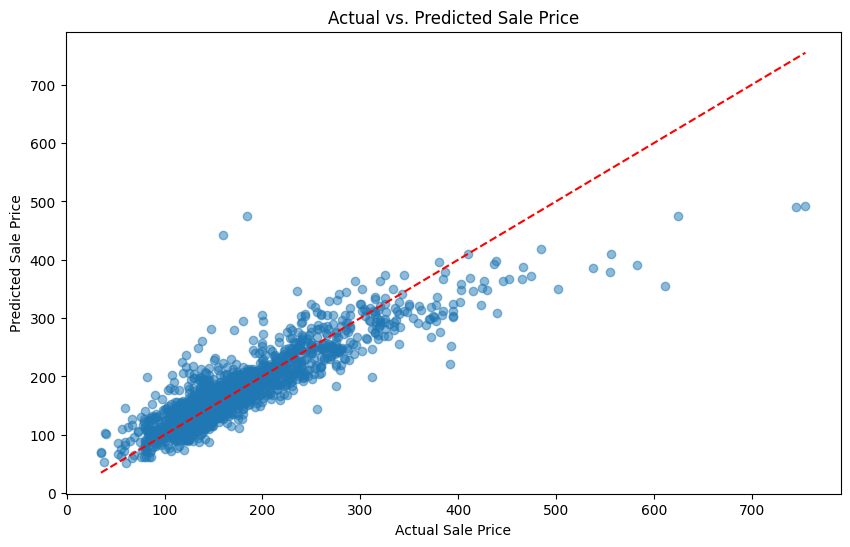

In [ ]:
# Assume you have predictions from your model
predictions = my_model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

In [ ]:
# Select the features used in the model
test_features = test_set_cleaned[["OverallQual", "GrLivArea", "YearBuilt", "TotalBsmtSF", "HasPool", 'HasBasement', 'HasGarage', 'TotalBsmtSF', '2ndFlrSF']]


In [ ]:
# Assuming `my_model` is your trained model
predictions = my_model.predict(test_features)
print(predictions)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[115.82149]
 [172.30379]
 [144.57887]
 ...
 [142.06474]
 [107.51149]
 [226.29543]]


In [ ]:
# Unscaling the predicted values
unscaled_predictions = predictions * 1000


In [ ]:
print(unscaled_predictions)

[[115821.484]
 [172303.78 ]
 [144578.88 ]
 ...
 [142064.75 ]
 [107511.49 ]
 [226295.42 ]]


# EVALUATION OF THE PREDICTED SALEPRICE

Mean Prediction: 177447.59375
Median Prediction: 160055.0625
Minimum Prediction: 52215.96484375
Maximum Prediction: 416672.21875


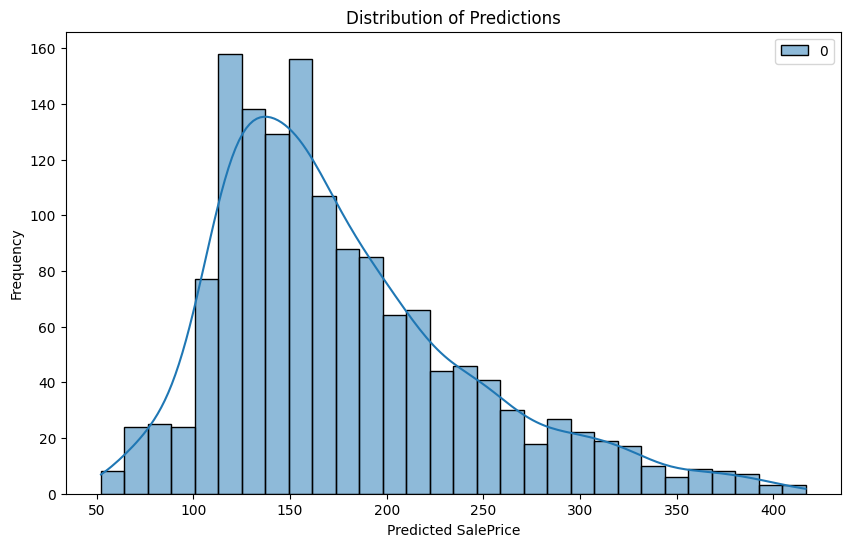

In [ ]:

# Basic statistics of predictions
mean_pred = np.mean(unscaled_predictions)
median_pred = np.median(unscaled_predictions)
min_pred = np.min(unscaled_predictions)
max_pred = np.max(unscaled_predictions)

print(f"Mean Prediction: {mean_pred}")
print(f"Median Prediction: {median_pred}")
print(f"Minimum Prediction: {min_pred}")
print(f"Maximum Prediction: {max_pred}")

# Plotting the distribution of predictions
plt.figure(figsize=(10, 6))
sns.histplot(predictions, kde=True, bins=30, color='red')
plt.title('Distribution of Predictions')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Frequency')
plt.show()


# COMPARED THE PREDICTED SALES WITH THE KNOWN SALESPRICE

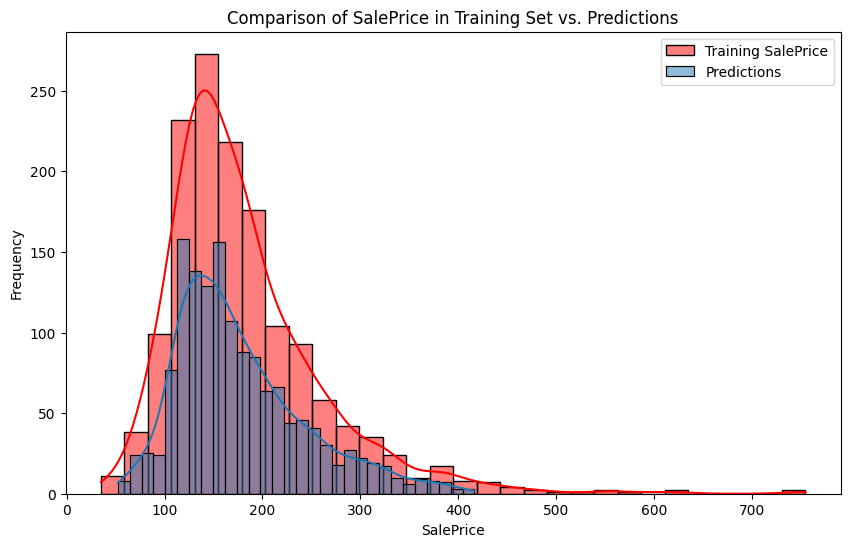

In [ ]:
# Plotting the distribution of SalePrice in the training set vs. predictions
plt.figure(figsize=(10, 6))

# Distribution of SalePrice in training data
sns.histplot(train_set_cleaned['SalePrice'], kde=True, bins=30, color='red', label='Training SalePrice')

# Distribution of Predictions
sns.histplot(predictions, kde=True, bins=30, color='blue', label='Predictions')

plt.title('Comparison of SalePrice in Training Set vs. Predictions')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
train_set_cleaned.to_csv('/content/train_set_cleaned_capped.csv', index=False)

In [ ]:
test_set_cleaned.to_csv('/content/test_set_cleaned_capped.csv', index=False)